# Modeling

## Indroduction

___

## Imports

In [1]:
# Imported Libraries 
import pandas as pd # pandas library 
import numpy as np # numpy library
import matplotlib.pyplot as plt # Import the pyplot (pythonplot) part of the matlotlib library
import seaborn as sns # seaborn library

from sklearn.model_selection import train_test_split # Train, Validation, Test Split
from sklearn.preprocessing import StandardScaler # Standard Scaling
from sklearn.linear_model import LogisticRegression # Logistic Regression Imports
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import plot_roc_curve

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from imblearn.over_sampling import SMOTE


#from mlxtend.plotting import plot_decision_regions # for visualising classification decision boundaries in 2D


___

## Helper Functions

High Correlation Pairs

In [35]:
def show_high_corr_pairs(corr_matrix, threshold=0.5):
    '''
    Input Correlation Matrix and a threshold amount from 0 - 1

    Outputs High Correlation Pairs based on the threshold input
    '''
    high_corr_pairs = corr_matrix[(corr_matrix.abs() >= 0.5) & (corr_matrix != 1.0)]
    high_corr_pairs = high_corr_pairs.dropna(how='all').dropna(axis=1, how='all')

    return high_corr_pairs

___

## Data Loading

In [2]:
## Data Loading
# Data loading for github only

CLN_DATA_PATH='../data/heart_attack_enc_m.csv'

try:
    heart_attack_enc_m = pd.read_csv(CLN_DATA_PATH, index_col= 0)
    print("Data loaded successfully.")
except FileNotFoundError:
    print("ERROR: The data file does not exist.")

Data loaded successfully.


___

Checking the dataframe has loaded correctly:

In [23]:
heart_attack_enc_m.head()

PhysicalHealthDays  MentalHealthDays  SleepHours  HeightInMeters  \
0                 4.0               0.0         9.0            1.60   
1                 0.0               0.0         6.0            1.78   
2                 0.0               0.0         8.0            1.85   
3                 5.0               0.0         9.0            1.70   
4                 3.0              15.0         5.0            1.55   

   WeightInKilograms    BMI  LastCheckupTime_enc  Gender_enc  \
0              71.67  27.99                  0.0         0.0   
1              95.25  30.13                  0.0         1.0   
2             108.86  31.66                  0.0         1.0   
3              90.72  31.32                  0.0         0.0   
4              79.38  33.07                  0.0         0.0   

   GeneralHealth_enc  PhysicalActivities_enc  ...  \
0                3.0                     1.0  ...   
1                3.0                     1.0  ...   
2                3.0                     0.0  ...   
3                1.0                     1.0  ...   
4                2.0                     1.0  ...   

   BlindOrVisionDifficulty_enc  DifficultyWalking_enc  \
0                          0.0                    0.0   
1                          0.0                    0.0   
2                          1.0                    1.0   
3                          0.0                    1.0   
4                          0.0                    0.0   

   DifficultyDressingBathing_enc  DifficultyErrands_enc  ChestScan_enc  \
0                            0.0                    0.0            0.0   
1                            0.0                    0.0            0.0   
2                            0.0                    0.0            1.0   
3                            0.0                    0.0            0.0   
4                            0.0                    0.0            0.0   

   AlcoholDrinkers_enc  HIVTesting_enc  FluVaxLast12_enc  PneumoVaxEver_enc  \
0                  0.0             0.0               1.0                1.0   
1                  0.0             0.0               1.0                1.0   
2                  1.0             0.0               0.0                1.0   
3                  0.0             0.0               1.0                1.0   
4                  0.0             0.0               1.0                1.0   

   HighRiskLastYear_enc  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0  

[5 rows x 36 columns]

Making sure all the datatypes are of the right type:

In [24]:
heart_attack_enc_m.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246004 entries, 0 to 246012
Data columns (total 36 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   PhysicalHealthDays             246004 non-null  float64
 1   MentalHealthDays               246004 non-null  float64
 2   SleepHours                     246004 non-null  float64
 3   HeightInMeters                 246004 non-null  float64
 4   WeightInKilograms              246004 non-null  float64
 5   BMI                            246004 non-null  float64
 6   LastCheckupTime_enc            246004 non-null  float64
 7   Gender_enc                     246004 non-null  float64
 8   GeneralHealth_enc              246004 non-null  float64
 9   PhysicalActivities_enc         246004 non-null  float64
 10  SmokerStatus_enc               246004 non-null  float64
 11  ECigaretteUsage_enc            246004 non-null  float64
 12  AgeCategory_enc                2460

## Correlation Heatmap

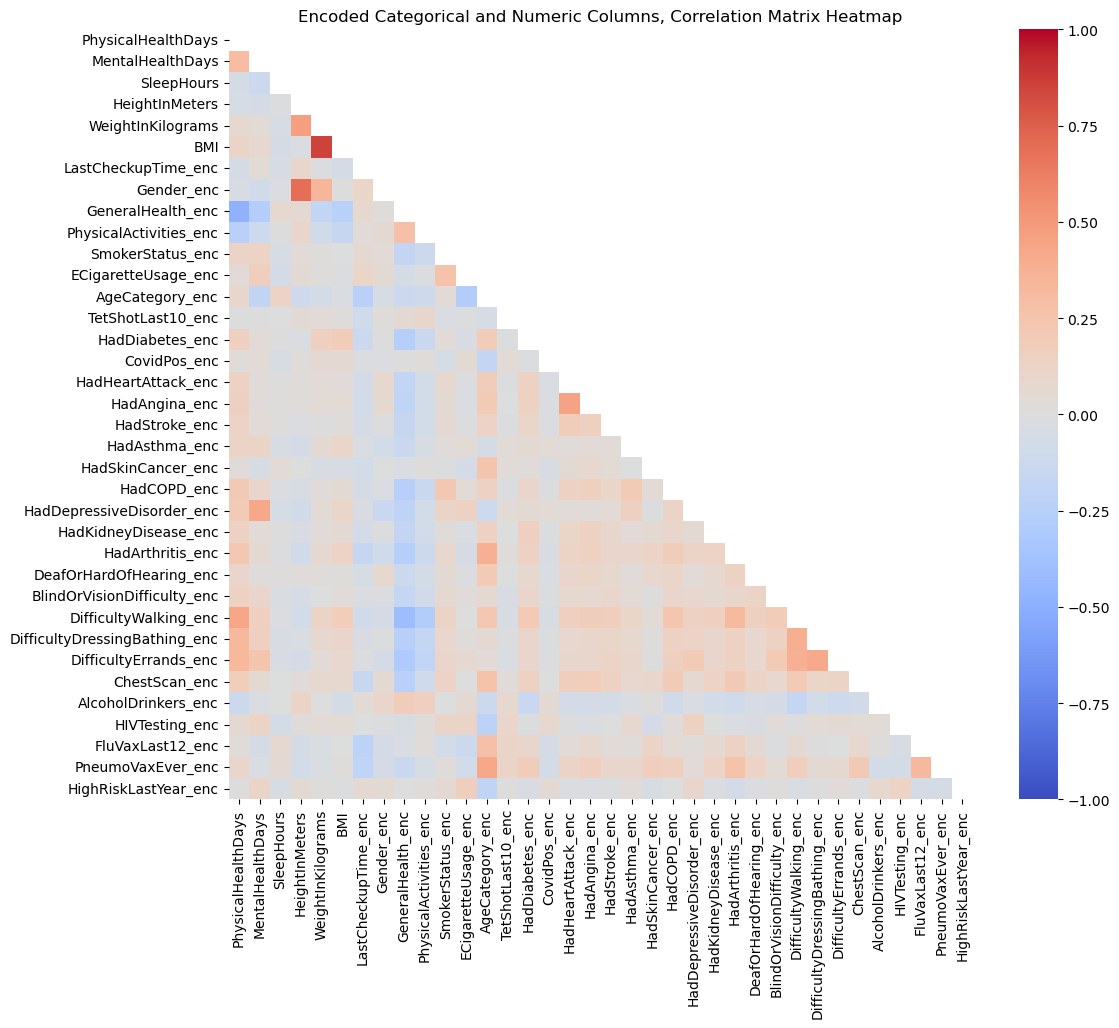

In [25]:
# Select only numerical columns
numeric_columns = heart_attack_enc_m

# Compute the correlation matrix
corr_matrix = numeric_columns.corr()

# Mask
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix,  cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, mask=mask)
plt.title('Encoded Categorical and Numeric Columns, Correlation Matrix Heatmap')
plt.show()

In [36]:
# Printing all the values of the correlation matrix that are above 0.05

high_corr_cols = show_high_corr_pairs(corr_matrix)

print(high_corr_cols)

                   HeightInMeters  WeightInKilograms       BMI  Gender_enc
HeightInMeters                NaN                NaN       NaN    0.693434
WeightInKilograms             NaN                NaN  0.859296         NaN
BMI                           NaN           0.859296       NaN         NaN
Gender_enc               0.693434                NaN       NaN         NaN


From the correlation heatmap I can see there is a significant correlation between HeightInMeters and Gender, which is understandable men are in general taller than women. There is also a significant correlation between WeightInKilograms and BMI. Which is also understandable, weight and body mass index are directly correlated as weight is one of the determining factors in BMI.

___

## Machine learning Models

Machine learning models can be broadly categorized into supervised, unsupervised, and reinforcement learning. Supervised learning involves training models on labeled data, where the outcome is known. Key models include linear regression, logistic regression, decision trees, random forests, KNN and XGBoost. These models are used for tasks such as classification and regression. Supervised learning for tasks with known outcomes. The choice of model depends on the specific problem, data characteristics, and desired outcomes, making machine learning a versatile toolset for a wide range of applications. Within this section I will be using different machine learning models to identify the highest feature coefficient's and see if the model can identify the if someone based on these specific questions is at a higher risk of having a heart attack. 

___

### Project Key Metric

**Recall**

Recall in machine learning is a metric that measures the proportion of actual positive instances correctly identified by the model, calculated as the number of true positives divided by the sum of true positives and false negatives. It is crucial for evaluating model performance in situations where identifying all positive instances is important, such as in medical diagnoses. This is because in the medical space precision is good and needed to pick out the patients in most need of help but recall is a great metric for early detection system such as this. With recall many people ca be brought in just to be safe that way minimal heart anomalies are missed.

___

**Train-Test-Split**

Splitting the data into the data and the target:

In [3]:
#Split into X and y

#Data
X = heart_attack_enc_m.drop(columns='HadHeartAttack_enc', axis=1)

# Target
y = heart_attack_enc_m['HadHeartAttack_enc']


Splitting into the train and test sets to be used in the machine learning models:

In [4]:
# Spliting into train and Test (80% : 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=12, stratify= y)

Splitting the data further to a train and validation set to also be used in models:

In [5]:
# Splitting the remainder in two, train and validation sets (Of the 80% = 80% : 20%)
X_train_subset, X_val, y_train_subset, y_val = train_test_split(X_train, y_train, test_size = 0.2,random_state=12, stratify= y_train) # Always use the same random states.

___

## Logistic Regression

Logistic regression is a widely utilized method in data science for binary classification problems due to its simplicity and interpretability. This model handles large datasets and provides  outputs, offering confidence levels for predictions and feature importances. It does not always require feature scaling and performs well when the relationship between input features and the outcome is linear. However, logistic regression assumes linearity and feature independence, which limits its ability to capture complex, non-linear relationships. It is also sensitive to outliers and may require large sample sizes for reliable estimates. Despite these limitations, with proper regularization techniques, logistic regression remains a robust choice for scenarios where interpretability and efficiency are crucial.

### Model - Logistic Regression

#### Logistic Regression Model 1 (logreg_model1)

Logreg_model1 is the baseline logistic regression that all other models will be compared against before comparing them to each other.

In [125]:
# Instantiate Model
logreg_model1 = LogisticRegression(max_iter=10000)

# Fit
logreg_model1.fit(X_train_subset, y_train_subset)

LogisticRegression(max_iter=10000)

In [68]:
# Creating the train and test predictions

y_train_pred = logreg_model1.predict(X_train_subset)
y_val_pred = logreg_model1.predict(X_val)
y_test_pred = logreg_model1.predict(X_test)


In [69]:
print(f'Logistic Regression Train Score: {logreg_model1.score(X_train, y_train).round(2)}\n')
print(f'Logistic Regression Test Score:{logreg_model1.score(X_test, y_test).round(2)}')

Logistic Regression Train Score: 0.95

Logistic Regression Test Score:0.95


In [70]:
# Classification Report (accuracy, precision, recall, f1)
report_val = classification_report(y_val, y_val_pred)
print(report_val)

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97     37211
         1.0       0.55      0.25      0.34      2150

    accuracy                           0.95     39361
   macro avg       0.75      0.62      0.66     39361
weighted avg       0.94      0.95      0.94     39361



In [71]:
# Classification Report (accuracy, precision, recall, f1)
report_test = classification_report(y_test, y_test_pred)
print(report_test)

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97     46514
         1.0       0.55      0.24      0.34      2687

    accuracy                           0.95     49201
   macro avg       0.76      0.62      0.66     49201
weighted avg       0.94      0.95      0.94     49201



The recall metric for the test set for the baseline model is at a good start. 24% on the Yes (1.0) is low but I have room to grow the model into a better one as the precision is high enough for subseuent models to be optimized.

Confusion Matrix - Train:
[[147182   1662]
 [  6464   2134]]


<Figure size 800x600 with 0 Axes>

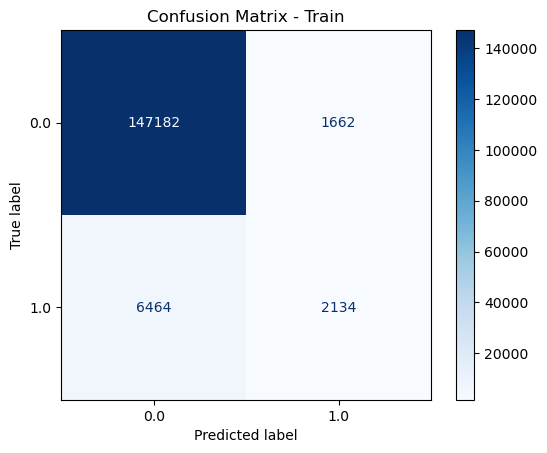

In [73]:
# Generate confusion matrix
cm_lr_train = confusion_matrix(y_train_subset, y_train_pred)
print("Confusion Matrix - Train:")
print(cm_lr_train)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr_train, display_labels=logreg_model1.classes_)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix - Train')
plt.show()


Confusion Matrix - Train:
[[45991   523]
 [ 2035   652]]


<Figure size 800x600 with 0 Axes>

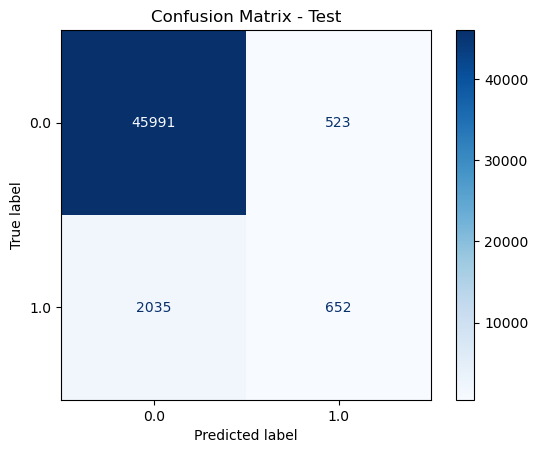

In [75]:
# Generate confusion matrix
cm_lr_train = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix - Train:")
print(cm_lr_train)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr_train, display_labels=logreg_model1.classes_)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix - Test')
plt.show()

The test confusion matrixes show that the baseline logistic regression model can classify if someone is not at a higher risk of heart attacks but strugles to to classify if someone will have a heart attack.

In [76]:
logreg_coeff = pd.DataFrame(logreg_model1.coef_, columns= X_train.columns, index= ["Coeff"]).T
logreg_coeff.sort_values(by= "Coeff", ascending= False)

Coeff
HadAngina_enc                  2.432695
HadStroke_enc                  0.879605
Gender_enc                     0.686212
ChestScan_enc                  0.575729
HadDiabetes_enc                0.328889
SmokerStatus_enc               0.198884
AgeCategory_enc                0.179019
BlindOrVisionDifficulty_enc    0.138785
DifficultyWalking_enc          0.094504
HIVTesting_enc                 0.092302
DifficultyErrands_enc          0.088228
HadCOPD_enc                    0.067619
HadDepressiveDisorder_enc      0.064190
HighRiskLastYear_enc           0.062838
PneumoVaxEver_enc              0.056274
HeightInMeters                 0.049357
HadArthritis_enc               0.037998
HadAsthma_enc                  0.029926
DeafOrHardOfHearing_enc        0.028031
ECigaretteUsage_enc            0.024101
HadKidneyDisease_enc           0.021320
BMI                            0.011930
CovidPos_enc                   0.003542
MentalHealthDays               0.002027
PhysicalHealthDays            -0.002131
WeightInKilograms             -0.004126
SleepHours                    -0.033146
TetShotLast10_enc             -0.036487
PhysicalActivities_enc        -0.036973
DifficultyDressingBathing_enc -0.075511
HadSkinCancer_enc             -0.092580
LastCheckupTime_enc           -0.126283
FluVaxLast12_enc              -0.186040
AlcoholDrinkers_enc           -0.216630
GeneralHealth_enc             -0.288395

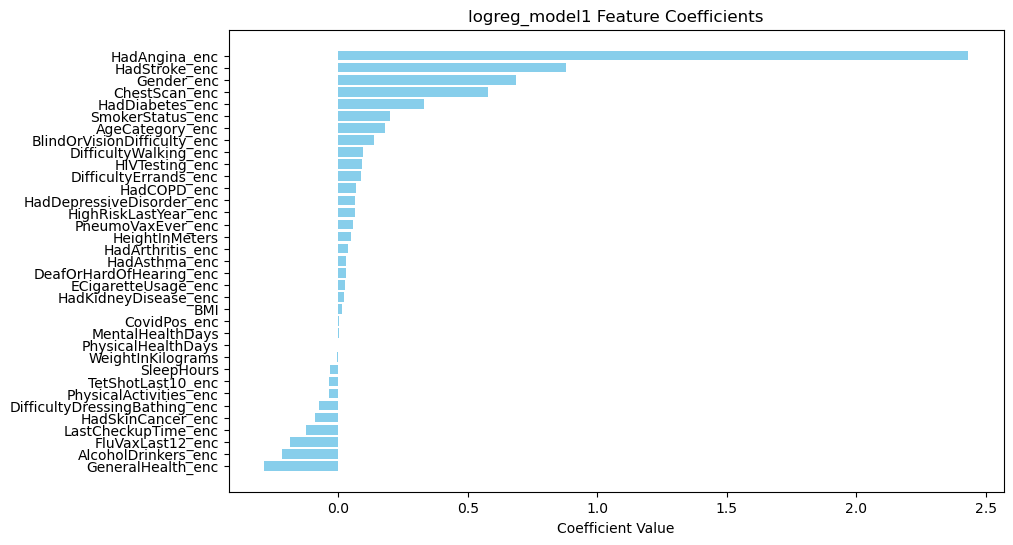

In [83]:
# Combine coefficients and feature names
coef_names = list(zip(coefficients, feature_names))

# Sort coefficients and feature names in descending order
coef_names.sort(reverse=False)

# Separate sorted coefficients and feature names
sorted_coefficients = [coef for coef, name in coef_names]
sorted_feature_names = [name for coef, name in coef_names]

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names, sorted_coefficients, color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('logreg_model1 Feature Coefficients')
plt.show()

The baseline model shows that angina, stroke and gender are the 3 top most important features when determining if someone will have a heart atttack. On the other hand general health score (0-4), alcohol and having a flu vaccine in the last 12 months can decrease you risk of experiencing a heart attack.

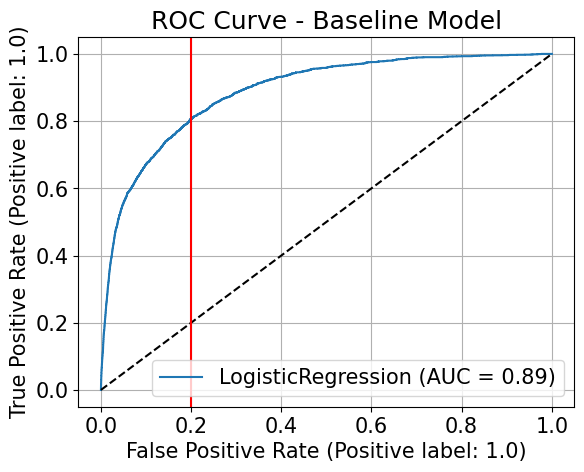

In [402]:
plot_roc_curve(logreg_model1, X_test, y_test)
plt.plot([0,1], [0,1], color='black', linestyle='--')
plt.axvline(x=0.2, color='r', linestyle='-')
plt.title("ROC Curve - Baseline Model")
plt.grid()
plt.show()

#### Logistic Regression Model 2

Scaled - Logistic Regression Model

In [193]:
# Pre-processing - scale the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [194]:
validation_scores = []
train_scores = []

C_range = np.array([.00000001,.0000001,.000001,.00001,.0001,.001,0.1,\
                1,10,100,1000,10000,100000,1000000,10000000, 100000000, 1000000000])

for c in C_range:
    logreg_model2 = LogisticRegression(max_iter=10000, C = c, random_state= 12, n_jobs= 4)
    logreg_model2.fit(X_train_scaled,y_train)
    
    # train on traning set
    train_scores.append(logreg_model2.score(X_train_scaled,y_train))
    # score on validation set
    validation_scores.append(logreg_model2.score(X_val_scaled,y_val))

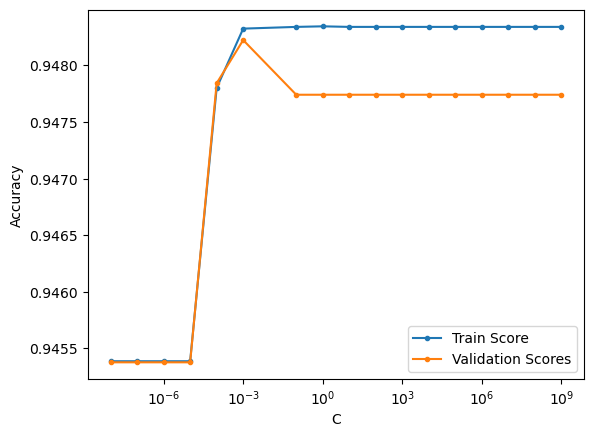

In [98]:
plt.figure()
plt.plot(C_range, train_scores,label="Train Score",marker='.')
plt.plot(C_range, validation_scores,label="Validation Scores",marker='.')
plt.xscale('log') # logarithmic scale needed on this example
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Scaled - Logistic Reggression Model - Accuracy VS C finding the best C range")
plt.legend()
plt.show();

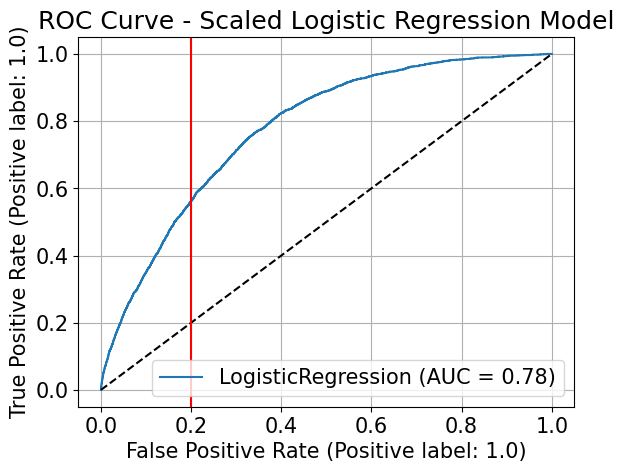

In [404]:
plot_roc_curve(logreg_model2, X_test, y_test)
plt.plot([0,1], [0,1], color='black', linestyle='--')
plt.axvline(x=0.2, color='r', linestyle='-')
plt.title("ROC Curve - Scaled Logistic Regression Model")
plt.grid()
plt.show()

**Optimised logreg_model2**

This model is an optimized logistic regression version based on the parameters found in model 2.

In [196]:
# Optimized C value
opt_C = .001 

# Instantiate Model
opt_logreg_model2 = LogisticRegression(max_iter=10000, C= opt_C, random_state=12)

# Fit
opt_logreg_model2.fit(X_train_scaled, y_train)

LogisticRegression(C=0.001, max_iter=10000, random_state=12)

In [406]:
# Creating the train and test predictions

y_train_pred = opt_logreg_model2.predict(X_train_scaled)
y_val_pred = opt_logreg_model2.predict(X_val_scaled)
y_test_pred = opt_logreg_model2.predict(X_test_scaled)

In [102]:
print(f'Optimized Logistic Regression Train Score: {logreg_model2.score(X_train_scaled, y_train).round(2)}\n')
print(f'Optimized Logistic Regression Validation Score: {logreg_model2.score(X_val_scaled, y_val).round(2)}\n')
print(f'Optimized Logistic Regression Test Score:{logreg_model2.score(X_test_scaled, y_test).round(2)}')

Optimized Logistic Regression Train Score: 0.95

Optimized Logistic Regression Validation Score: 0.95

Optimized Logistic Regression Test Score:0.95


In [407]:
# Classification Report (accuracy, precision, recall, f1)
report_train_opt = classification_report(y_train, y_train_pred)
print(report_train_opt)

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97    186055
         1.0       0.57      0.23      0.33     10748

    accuracy                           0.95    196803
   macro avg       0.76      0.61      0.65    196803
weighted avg       0.94      0.95      0.94    196803



In [104]:
# Classification Report (accuracy, precision, recall, f1)
report_test = classification_report(y_test, y_test_pred)
print(report_test)

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97     46514
         1.0       0.56      0.22      0.32      2687

    accuracy                           0.95     49201
   macro avg       0.76      0.61      0.65     49201
weighted avg       0.93      0.95      0.94     49201



Based on the hyperparameters set the the test score raises slightly in precision but decreases in the key metric recall.

Confusion Matrix - Train:
[[184175   1880]
 [  8290   2458]]


<Figure size 800x600 with 0 Axes>

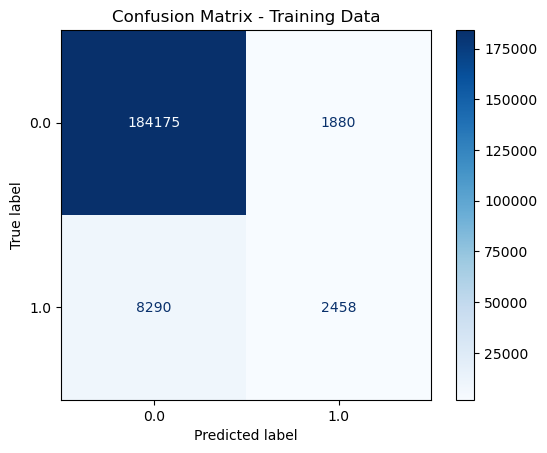

In [114]:
# Confusion Matrix Train Variable
cm_opt_lr_train = confusion_matrix(y_train, y_train_pred)

# Prints Train Confusion Matrix
print("Confusion Matrix - Train:")
print(cm_opt_lr_train)

# Display confusion matrix for training data
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_opt_lr_train, display_labels=opt_logreg_model2.classes_)
plt.figure(figsize=(8, 6))
disp_train.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Training Data')
plt.show()

Confusion Matrix - Train:
[[46040   474]
 [ 2090   597]]


<Figure size 800x600 with 0 Axes>

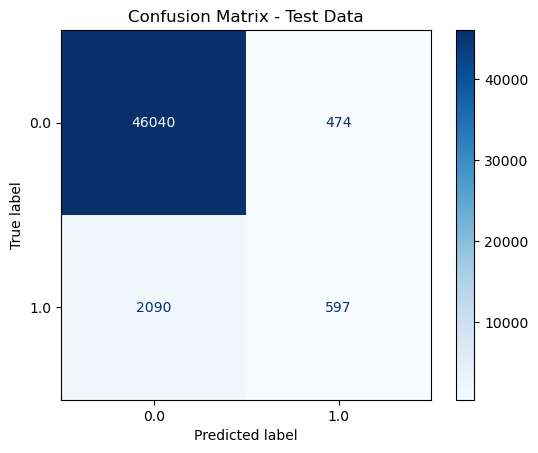

In [115]:
# Confusion Matrix Test Variable
cm_opt_lr_test = confusion_matrix(y_test, y_test_pred)

# Prints Test Confusion Matrix
print("Confusion Matrix - Train:")
print(cm_opt_lr_test)

# Test Confusion Matrix
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_opt_lr_test, display_labels=opt_logreg_model2.classes_)
plt.figure(figsize=(8, 6))
disp_test.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Test Data')
plt.show()

The test confusion matrix for the optimized logistic regression model is not disimilar to the baseline model. It may be because they both have similar metrics.

In [107]:
opt_logreg_coeff2 = pd.DataFrame(opt_logreg_model2.coef_, columns= X_train.columns, index= ["Coeff"]).T
opt_logreg_coeff2.sort_values(by= "Coeff", ascending= False)

Coeff
HadAngina_enc                  0.571664
AgeCategory_enc                0.457068
Gender_enc                     0.290550
ChestScan_enc                  0.259435
HadStroke_enc                  0.170823
SmokerStatus_enc               0.157425
HadDiabetes_enc                0.116574
PneumoVaxEver_enc              0.049604
DifficultyWalking_enc          0.039285
BlindOrVisionDifficulty_enc    0.031337
HadCOPD_enc                    0.029802
HadArthritis_enc               0.028532
DifficultyErrands_enc          0.022470
DeafOrHardOfHearing_enc        0.021078
HIVTesting_enc                 0.016874
HadKidneyDisease_enc           0.014540
MentalHealthDays               0.005214
BMI                            0.003805
HadDepressiveDisorder_enc      0.003187
PhysicalHealthDays             0.003108
HadAsthma_enc                  0.000814
ECigaretteUsage_enc           -0.003526
HighRiskLastYear_enc          -0.004225
CovidPos_enc                  -0.008651
WeightInKilograms             -0.010530
HeightInMeters                -0.012704
DifficultyDressingBathing_enc -0.015277
HadSkinCancer_enc             -0.016614
PhysicalActivities_enc        -0.024071
TetShotLast10_enc             -0.025142
SleepHours                    -0.035110
FluVaxLast12_enc              -0.058981
AlcoholDrinkers_enc           -0.094732
LastCheckupTime_enc           -0.098304
GeneralHealth_enc             -0.257144

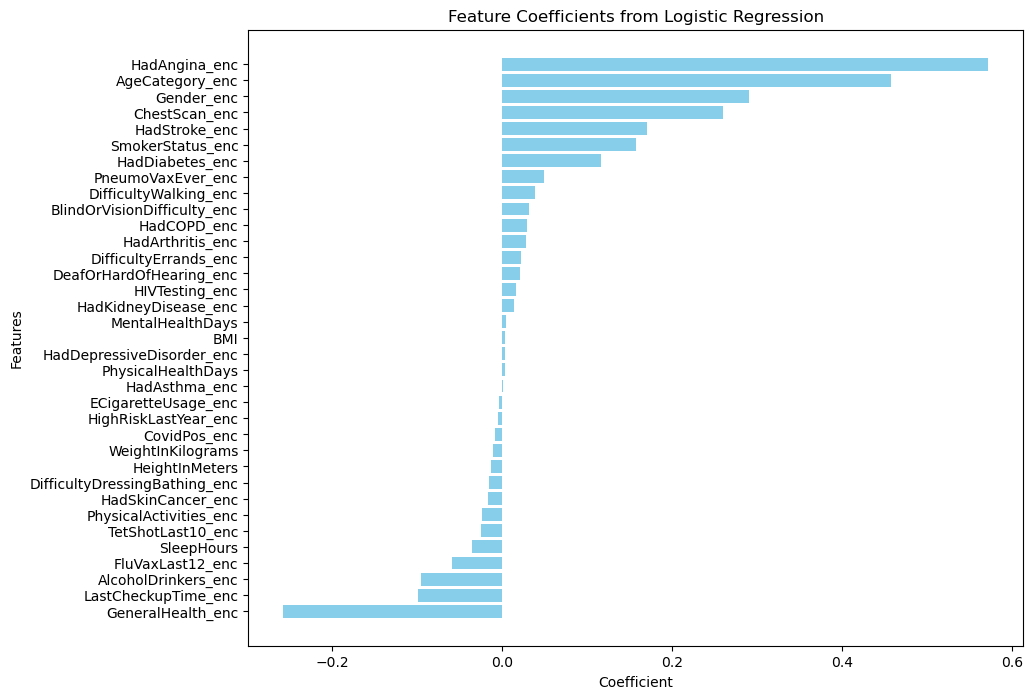

In [109]:
# Sort the DataFrame by coefficient values
opt_logreg_coeff2_sorted = opt_logreg_coeff2.sort_values(by="Coeff", ascending=False)

# Plot coefficients
plt.figure(figsize=(10, 8))
plt.barh(opt_logreg_coeff2_sorted.index, opt_logreg_coeff2_sorted['Coeff'], color='skyblue')
plt.xlabel('Coefficient')
plt.ylabel('Features')
plt.title('Feature Coefficients from Logistic Regression')
plt.gca().invert_yaxis()  # To display the highest coefficients on top
plt.show()

Just like the baseline model the coefficients order has not changed.

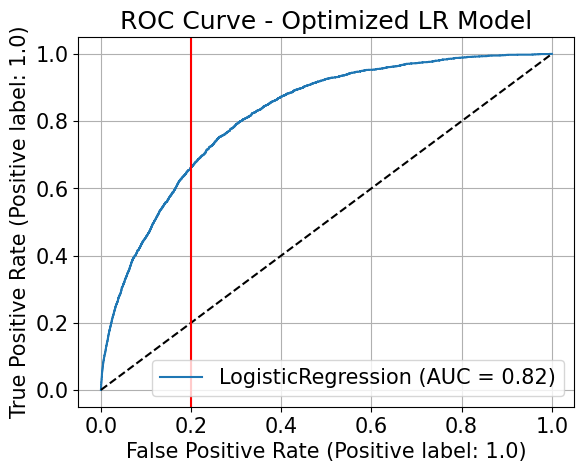

In [410]:
plot_roc_curve(opt_logreg_model2, X_test, y_test)
plt.plot([0,1], [0,1], color='black', linestyle='--')
plt.axvline(x=0.2, color='r', linestyle='-')
plt.title("ROC Curve - Optimized LR Model")
plt.grid()
plt.show()

**Pipeline Gridsearch - logreg_model3**

Pipelines in grid searches allow for multiple hyperparameters to be set on a single model. Grid search allows the model to iterate through each preset hyperparameter, fitting multiple models and finding the best preforming model based on a prese metric (accuracy is nothis is set).

Here I am fitting a logistic regression model to a grid search to find the best performing model.

In [203]:
# Making a pipeline esimator list 
lr_estimators = [('scaler', StandardScaler()),
                    ('lr', LogisticRegression(max_iter=1000, random_state=12))
]

pipe = Pipeline(lr_estimators)
print(pipe) # Checking the pipe has been correctly made

Pipeline(steps=[('scaler', StandardScaler()),
                ('lr', LogisticRegression(max_iter=1000, random_state=12))])


Defining the hyperparameters in the grid search, currently a wide net as to capture a wide range of parameters to then zero in on the best combination.

In [204]:
# Logistic Regression3 - Defining V1 grid search

C = ([.00000001, .0000001, .000001, .00001, .0001, .001, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000, 1000000000])

penalty = ['l1', 'l2']

solver = ['saga', 'liblinear']

params = [dict(
    lr = [LogisticRegression()],
    lr__C = C,
    lr__penalty = penalty,
    lr__solver = solver
)]
display(params)

[{'lr': [LogisticRegression()],
  'lr__C': [1e-08,
   1e-07,
   1e-06,
   1e-05,
   0.0001,
   0.001,
   0.1,
   1,
   10,
   100,
   1000,
   10000,
   100000,
   1000000,
   10000000,
   100000000,
   1000000000],
  'lr__penalty': ['l1', 'l2'],
  'lr__solver': ['saga', 'liblinear']}]

In [205]:
# Logistic Regression Grid Search V1
grid_search_model_V1 = GridSearchCV(estimator= pipe, param_grid=params,cv=5, n_jobs= 4, verbose= 2)
grid_search_model_V1.fit(X_train, y_train)

Fitting 5 folds for each of 68 candidates, totalling 340 fits
[CV] END lr=LogisticRegression(), lr__C=1e-08, lr__penalty=l1, lr__solver=saga; total time=   0.2s
[CV] END lr=LogisticRegression(), lr__C=1e-08, lr__penalty=l1, lr__solver=saga; total time=   0.2s
[CV] END lr=LogisticRegression(), lr__C=1e-08, lr__penalty=l1, lr__solver=saga; total time=   0.2s
[CV] END lr=LogisticRegression(), lr__C=1e-08, lr__penalty=l1, lr__solver=saga; total time=   0.2s
[CV] END lr=LogisticRegression(), lr__C=1e-08, lr__penalty=l1, lr__solver=saga; total time=   0.2s
[CV] END lr=LogisticRegression(), lr__C=1e-08, lr__penalty=l1, lr__solver=liblinear; total time=   0.2s
[CV] END lr=LogisticRegression(), lr__C=1e-08, lr__penalty=l1, lr__solver=liblinear; total time=   0.2s
[CV] END lr=LogisticRegression(), lr__C=1e-08, lr__penalty=l1, lr__solver=liblinear; total time=   0.3s
[CV] END lr=LogisticRegression(), lr__C=1e-08, lr__penalty=l1, lr__solver=liblinear; total time=   0.2s
[CV] END lr=LogisticRegress

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('lr',
                                        LogisticRegression(max_iter=1000,
                                                           random_state=12))]),
             n_jobs=4,
             param_grid=[{'lr': [LogisticRegression(C=0.001,
                                                    solver='liblinear')],
                          'lr__C': [1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001,
                                    0.1, 1, 10, 100, 1000, 10000, 100000,
                                    1000000, 10000000, 100000000, 1000000000],
                          'lr__penalty': ['l1', 'l2'],
                          'lr__solver': ['saga', 'liblinear']}],
             verbose=2)

In [206]:
# Extracting the essential information 

# Result of the grid search optimisation process - best hyperparameter and best model
print('Best Score:', grid_search_model_V1.best_score_); 
print('Best C Value:', grid_search_model_V1.best_estimator_.get_params()['lr__C'])
print('Best lr Model:', grid_search_model_V1.best_estimator_.get_params()['lr'])
print('Best penalty:', grid_search_model_V1.best_estimator_.get_params()['lr__penalty'])
print('Best solver:', grid_search_model_V1.best_estimator_.get_params()['lr__solver'])


Best Score: 0.948334122619001
Best C Value: 0.001
Best lr Model: LogisticRegression(C=0.001, solver='liblinear')
Best penalty: l2
Best solver: liblinear


Seeing the best models parameters I can now extract that specific model from the grid search to then run metric tests on the data.

In [207]:
# Obtaining the best performing model from the grid search
best_lr_pipe_V1 = grid_search_model_V1.best_estimator_

In [121]:
best_lr_pipe_V1.predict(X_test)

array([0., 0., 0., ..., 0., 0., 0.])

In [122]:
# Making the train and test predictions for the pipeed decision tree model
y_train_blrpipe_pred = best_lr_pipe_V1.predict(X_train)
y_test_blrpipe_pred = best_lr_pipe_V1.predict(X_test)

In [123]:
# Obtaining the best score on the train and test data for the best pipe model
print(f'Score on train: {best_lr_pipe_V1.score(X_train, y_train)}')
print(f'Score on test: {best_lr_pipe_V1.score(X_test, y_test)}')

Score on train: 0.948298552359466
Score on test: 0.9479888620149997


Train Metrics

In [124]:
# Classification Report (accuracy, precision, recall, f1)
report_blrpipe_train = classification_report(y_train, y_train_blrpipe_pred)
print(report_blrpipe_train)

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97    186055
         1.0       0.57      0.23      0.33     10748

    accuracy                           0.95    196803
   macro avg       0.76      0.61      0.65    196803
weighted avg       0.94      0.95      0.94    196803



[[184144   1911]
 [  8264   2484]]


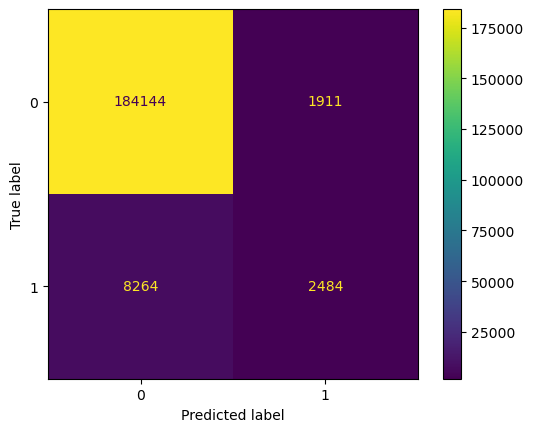

In [125]:
# Confusion Matrix (table + plot)
cm_blrpipe_train = confusion_matrix(y_train, y_train_blrpipe_pred)
print(cm_blrpipe_train)
ConfusionMatrixDisplay(confusion_matrix=cm_blrpipe_train).plot();

Test Metrics

In [128]:
# Obtaining the best score from the V1 model
grid_search_model_V1.best_score_

0.948334122619001

In [129]:
# Classification Report (accuracy, precision, recall, f1)
report_blrpipe_test = classification_report(y_test, y_test_blrpipe_pred)
print(report_blrpipe_test)

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97     46514
         1.0       0.56      0.22      0.32      2687

    accuracy                           0.95     49201
   macro avg       0.76      0.61      0.65     49201
weighted avg       0.93      0.95      0.94     49201



[[46042   472]
 [ 2087   600]]


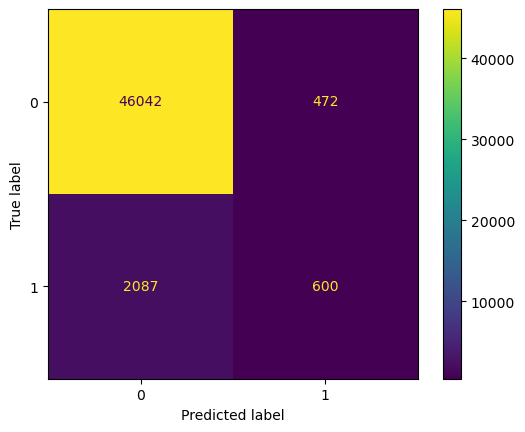

In [130]:
# Confusion Matrix (table + plot)
cm_blrpipe_test = confusion_matrix(y_test, y_test_blrpipe_pred)
print(cm_blrpipe_test)
ConfusionMatrixDisplay(confusion_matrix=cm_blrpipe_test).plot();

As seen again the test matrix is not any different from the baseline model. Even though the hyperparameters have been optimized and put into a grid search. This may be because there is a class imbalence in the dataset that may have to be addressed.

In [131]:
print(best_lr_pipe_V1.named_steps)

{'scaler': StandardScaler(), 'lr': LogisticRegression(C=0.001, solver='liblinear')}


                                  Coeff
HadAngina_enc                  0.520527
AgeCategory_enc                0.296907
Gender_enc                     0.221744
ChestScan_enc                  0.178080
HadStroke_enc                  0.151315
SmokerStatus_enc               0.109685
HadDiabetes_enc                0.095197
DifficultyWalking_enc          0.037202
HadCOPD_enc                    0.032197
PneumoVaxEver_enc              0.031883
BlindOrVisionDifficulty_enc    0.025094
DeafOrHardOfHearing_enc        0.020305
DifficultyErrands_enc          0.018635
HadKidneyDisease_enc           0.015840
HIVTesting_enc                 0.011388
HadArthritis_enc               0.010507
PhysicalHealthDays             0.008064
MentalHealthDays               0.003266
HadDepressiveDisorder_enc     -0.000538
HighRiskLastYear_enc          -0.001123
ECigaretteUsage_enc           -0.001740
HadAsthma_enc                 -0.001765
BMI                           -0.003814
CovidPos_enc                  -0.004282


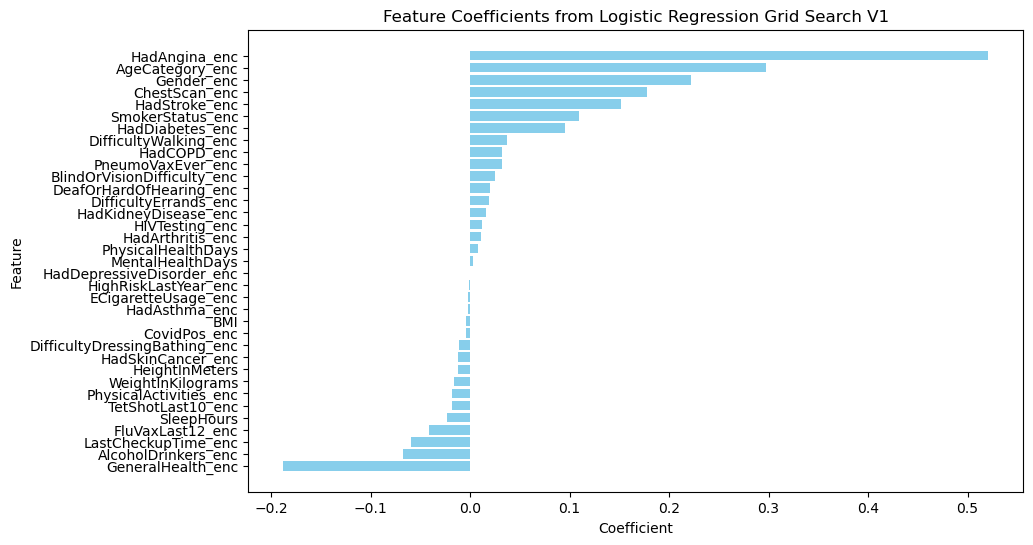

In [152]:
# Extract the logistic regression model from the pipeline
best_lr_logreg_model3 = best_lr_pipe_V1.named_steps['lr']

# Get the coefficients
coeff = best_lr_logreg_model3.coef_[0]

# Create a DataFrame for the coefficients
logreg_coeff3 = pd.DataFrame(coeff, index=X_train.columns, columns=['Coeff'])

# Sort the DataFrame by coefficient values
logreg_coeff3_sorted = logreg_coeff3.sort_values(by='Coeff', ascending=False)
print(logreg_coeff3_sorted)

# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.barh(logreg_coeff3_sorted.index, logreg_coeff3_sorted['Coeff'], color='skyblue')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Feature Coefficients from Logistic Regression Grid Search V1')
plt.gca().invert_yaxis()  # To display the highest coefficients on top
plt.show()


Lookig at the feature coefficients for the gridsearch V1 model there are now differences in the top and bottom 3 factors to having a heart attack. The top 3 have changed from all previous models stating, angina, age and gender are now the top 3 contributing factors to having a heart attack.

While the bottom 3 change slightly with general health, alcohol and now last check up time. This model suggests that having an excellent self proclaimed health rating, having alcohol minimal within reason and going to the doctor reguarly can decrease the risk of someone having a heart attack.

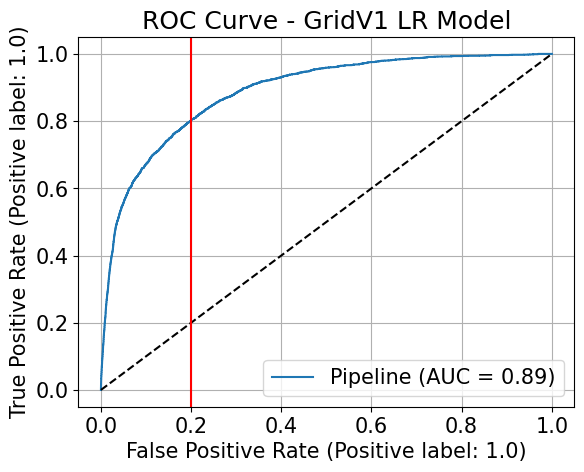

In [411]:
# # ROC Curve
plot_roc_curve(best_lr_pipe_V1, X_test, y_test)
plt.plot([0,1], [0,1], color='black', linestyle='--')
plt.axvline(x=0.2, color='r', linestyle='-')
plt.title("ROC Curve - GridV1 LR Model")
plt.grid()
plt.show()

**Pipeline GridsearchV2 - logreg_model4 (L1 Penalty)**

Using the optimised parameter ranges previously found in the last grid search I am using this grid search to hone in on the best hyperparameters for a logistic regression for the specific project problem. Using only the l1 penalty, which is supposed to encourage sparsity in the model, effectively setting some coefficients to zero, which can result in feature selection by excluding irrelevant features and reducing model complexity, thereby potentially improving model interpretability and generalization.

In [209]:
# Making a pipeline esimator list 
lr_estimators = [('scaler', StandardScaler()),
                    ('lr', LogisticRegression(max_iter=1000, random_state=12))
]

pipe = Pipeline(lr_estimators)
print(pipe) # Checking the pipe has been correctly made

Pipeline(steps=[('scaler', StandardScaler()),
                ('lr', LogisticRegression(max_iter=1000, random_state=12))])


In [210]:
# Defining V3 grid search

C = ([.00000001, .0000001, .000001, .00001, .0001, .001, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000, 1000000000])

penalty = ['l1']

solver = ['saga', 'liblinear']

params = [dict(
    lr = [LogisticRegression()],
    lr__C = C,
    lr__penalty = penalty,
    lr__solver = solver
)]
display(params)

[{'lr': [LogisticRegression()],
  'lr__C': [1e-08,
   1e-07,
   1e-06,
   1e-05,
   0.0001,
   0.001,
   0.1,
   1,
   10,
   100,
   1000,
   10000,
   100000,
   1000000,
   10000000,
   100000000,
   1000000000],
  'lr__penalty': ['l1'],
  'lr__solver': ['saga', 'liblinear']}]

In [211]:
grid_search_model_V2 = GridSearchCV(estimator= pipe, param_grid=params,cv=5, n_jobs= 4, verbose= 2)
grid_search_model_V2.fit(X_train, y_train)

Fitting 5 folds for each of 34 candidates, totalling 170 fits
[CV] END lr=LogisticRegression(), lr__C=1e-08, lr__penalty=l1, lr__solver=saga; total time=   0.2s
[CV] END lr=LogisticRegression(), lr__C=1e-08, lr__penalty=l1, lr__solver=saga; total time=   0.3s
[CV] END lr=LogisticRegression(), lr__C=1e-08, lr__penalty=l1, lr__solver=saga; total time=   0.2s
[CV] END lr=LogisticRegression(), lr__C=1e-08, lr__penalty=l1, lr__solver=saga; total time=   0.2s
[CV] END lr=LogisticRegression(), lr__C=1e-08, lr__penalty=l1, lr__solver=liblinear; total time=   0.2s
[CV] END lr=LogisticRegression(), lr__C=1e-08, lr__penalty=l1, lr__solver=saga; total time=   0.2s
[CV] END lr=LogisticRegression(), lr__C=1e-08, lr__penalty=l1, lr__solver=liblinear; total time=   0.2s
[CV] END lr=LogisticRegression(), lr__C=1e-08, lr__penalty=l1, lr__solver=liblinear; total time=   0.2s
[CV] END lr=LogisticRegression(), lr__C=1e-08, lr__penalty=l1, lr__solver=liblinear; total time=   0.2s
[CV] END lr=LogisticRegress

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('lr',
                                        LogisticRegression(max_iter=1000,
                                                           random_state=12))]),
             n_jobs=4,
             param_grid=[{'lr': [LogisticRegression(C=0.1, penalty='l1',
                                                    solver='saga')],
                          'lr__C': [1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001,
                                    0.1, 1, 10, 100, 1000, 10000, 100000,
                                    1000000, 10000000, 100000000, 1000000000],
                          'lr__penalty': ['l1'],
                          'lr__solver': ['saga', 'liblinear']}],
             verbose=2)

In [212]:
# Extracting the essential information 

# Result of the grid search optimisation process - best hyperparameter and best model
print('Best Score:', grid_search_model_V2.best_score_); 
print('Best C Value:', grid_search_model_V2.best_estimator_.get_params()['lr__C'])
print('Best lr Model:', grid_search_model_V2.best_estimator_.get_params()['lr'])
print('Best penalty:', grid_search_model_V2.best_estimator_.get_params()['lr__penalty'])
print('Best solver:', grid_search_model_V2.best_estimator_.get_params()['lr__solver'])

Best Score: 0.9482985532551205
Best C Value: 0.1
Best lr Model: LogisticRegression(C=0.1, penalty='l1', solver='saga')
Best penalty: l1
Best solver: saga


Getting the best model from the gridsearch version 2 to further analyse it:

In [213]:
best_lr_pipe_V2 = grid_search_model_V2.best_estimator_

In [142]:
best_lr_pipe_V2.predict(X_test)

array([0., 0., 0., ..., 0., 0., 0.])

In [143]:
# Making the train and test predictions for the pipeed decision tree model
y_train_blrpipe_pred_V2 = best_lr_pipe_V2.predict(X_train)
y_test_blrpipe_pred_V2 = best_lr_pipe_V2.predict(X_test)

In [144]:
# Obtaining the best score on the train and test data for the best pipe model
print(f'Score on train: {best_lr_pipe_V2.score(X_train, y_train)}')
print(f'Score on test: {best_lr_pipe_V2.score(X_test, y_test)}')

Score on train: 0.9483239584762427
Score on test: 0.9480701611755858


V2 Train Metrics

In [146]:
# Classification Report (accuracy, precision, recall, f1)
report_blrpipe_train_V2 = classification_report(y_train, y_train_blrpipe_pred_V2)
print(report_blrpipe_train_V2)

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97    186055
         1.0       0.56      0.25      0.34     10748

    accuracy                           0.95    196803
   macro avg       0.76      0.62      0.66    196803
weighted avg       0.94      0.95      0.94    196803



[[183964   2091]
 [  8079   2669]]


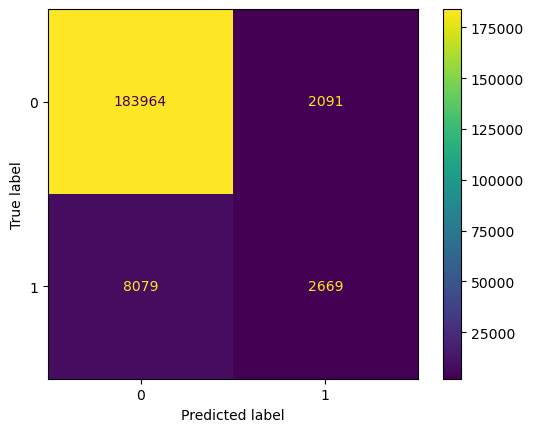

In [147]:
# Confusion Matrix (table + plot)
cm_blrpipe_train_V2 = confusion_matrix(y_train, y_train_blrpipe_pred_V2)
print(cm_blrpipe_train_V2)
ConfusionMatrixDisplay(confusion_matrix=cm_blrpipe_train_V2).plot();

V2 Test Metrics

In [148]:
# Classification Report (accuracy, precision, recall, f1)
report_blrpipe_test_V2 = classification_report(y_test, y_test_blrpipe_pred_V2)
print(report_blrpipe_test_V2)

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97     46514
         1.0       0.56      0.24      0.34      2687

    accuracy                           0.95     49201
   macro avg       0.76      0.62      0.66     49201
weighted avg       0.94      0.95      0.94     49201



[[45993   521]
 [ 2034   653]]


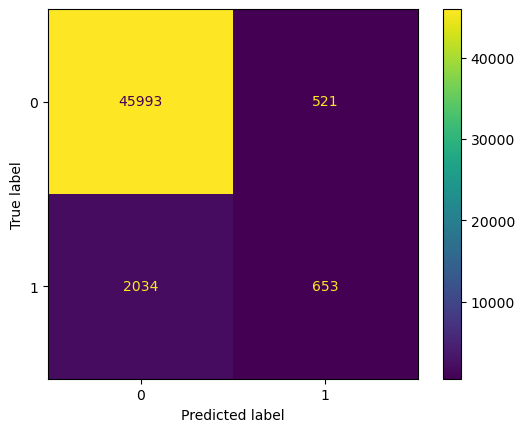

In [149]:
# Confusion Matrix (table + plot)
cm_blrpipe_test_V2 = confusion_matrix(y_test, y_test_blrpipe_pred_V2)
print(cm_blrpipe_test_V2)
ConfusionMatrixDisplay(confusion_matrix=cm_blrpipe_test_V2).plot();

The test confusion matrix is slightly better by about 53 more people in the true positive section that all previous models, which is also understandable because the model has 1% higher precision and recall. 

                                  Coeff
AgeCategory_enc                0.614441
HadAngina_enc                  0.582689
Gender_enc                     0.357589
ChestScan_enc                  0.276937
SmokerStatus_enc               0.176950
HadStroke_enc                  0.173004
HadDiabetes_enc                0.115851
HIVTesting_enc                 0.038674
BlindOrVisionDifficulty_enc    0.029119
DifficultyWalking_enc          0.026444
DifficultyErrands_enc          0.024868
PneumoVaxEver_enc              0.023156
HadCOPD_enc                    0.018381
HadDepressiveDisorder_enc      0.015737
MentalHealthDays               0.013348
HadArthritis_enc               0.012042
HadAsthma_enc                  0.010328
HadKidneyDisease_enc           0.007851
ECigaretteUsage_enc            0.007572
DeafOrHardOfHearing_enc        0.006012
BMI                            0.005144
HighRiskLastYear_enc           0.003614
CovidPos_enc                   0.001597
WeightInKilograms              0.000000


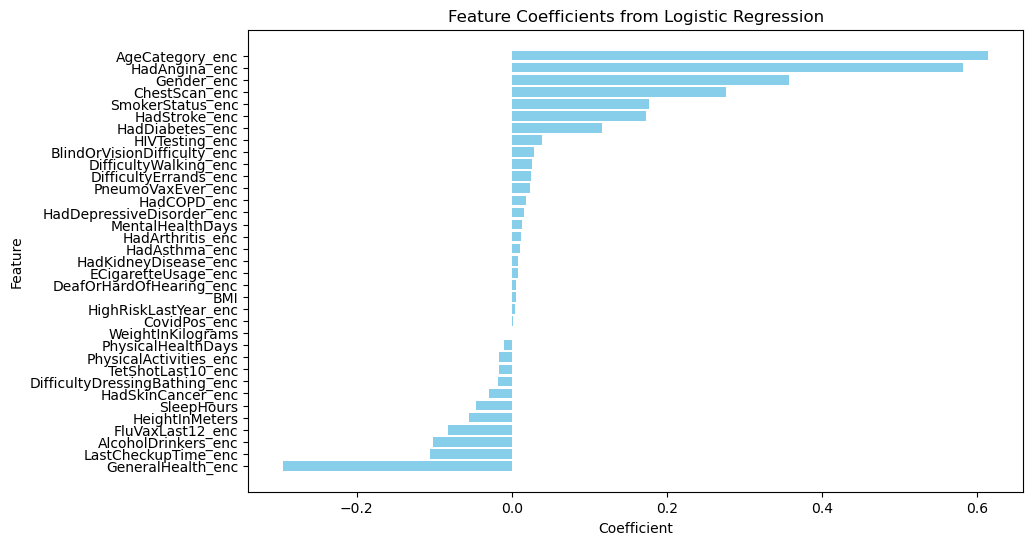

In [153]:
# Extract the logistic regression model from the pipeline
best_lr_logreg_model_V2 = best_lr_pipe_V2.named_steps['lr']

# Get the coefficients
coeff = best_lr_logreg_model_V2.coef_[0]

# Create a DataFrame for the coefficients
logreg_coeff4 = pd.DataFrame(coeff, index=X_train.columns, columns=['Coeff'])


# Sort the DataFrame by coefficient values
logreg_coeff4_sorted = logreg_coeff4.sort_values(by='Coeff', ascending=False)
print(logreg_coeff4_sorted)

# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.barh(logreg_coeff4_sorted.index, logreg_coeff4_sorted['Coeff'], color='skyblue')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Feature Coefficients from Logistic Regression')
plt.gca().invert_yaxis()  # To display the highest coefficients on top
plt.show()

With this model it shows the first time that the most important feature to having a heart attack in age over angina and gender. 

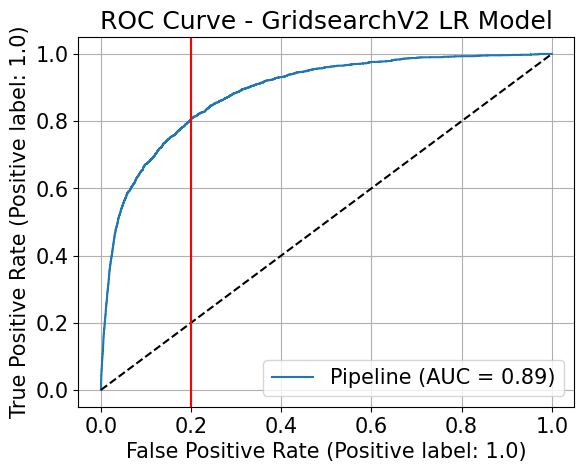

In [412]:
plot_roc_curve(best_lr_pipe_V2, X_test, y_test)
plt.plot([0,1], [0,1], color='black', linestyle='--')
plt.axvline(x=0.2, color='r', linestyle='-')
plt.title("ROC Curve - GridsearchV2 LR Model")
plt.grid()
plt.show()

#### Final Logistic Regression Model

Here the final logistic regression model based on the best hyperparameters seen by the previous models along with the insights from the roc curves to determine a optimal threshold for the final model. This will allow up to see if there is any variation in feature importance.

In [265]:
# Optimise with the best Parameters from the best logreg model

final_lr_model = LogisticRegression(max_iter=1000, C=0.1, penalty='l1', solver='saga', random_state=12)

final_lr_model.fit(X_train_scaled, y_train)

final_lr_model.score(X_test_scaled, y_test)

0.9480701611755858

Classification Report - Train (Threshold = 0.065)
              precision    recall  f1-score   support

         0.0       0.98      0.87      0.93    186055
         1.0       0.25      0.72      0.37     10748

    accuracy                           0.87    196803
   macro avg       0.62      0.80      0.65    196803
weighted avg       0.94      0.87      0.89    196803

Classification Report - Test (Threshold = 0.065)
              precision    recall  f1-score   support

         0.0       0.98      0.87      0.92     46514
         1.0       0.25      0.71      0.37      2687

    accuracy                           0.86     49201
   macro avg       0.61      0.79      0.64     49201
weighted avg       0.94      0.86      0.89     49201



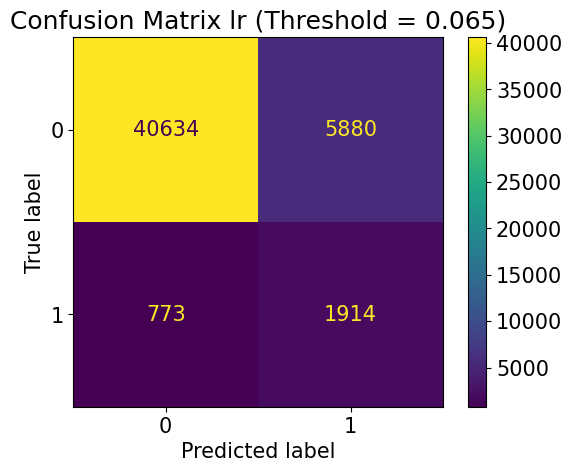

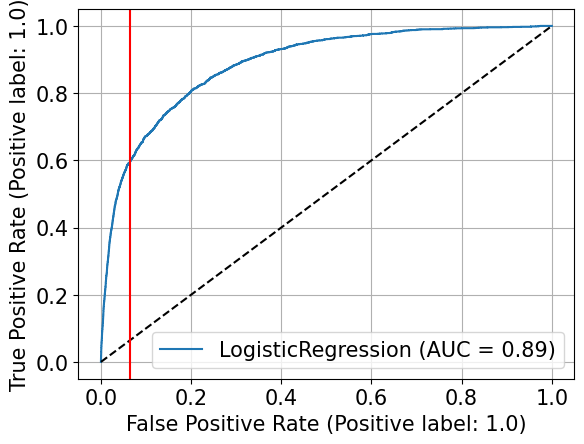

In [293]:
# Predict probabilities for the positive class
y_prob_train_final_lr = final_lr_model.predict_proba(X_train_scaled)[:, 1]
y_prob_test_final_lr = final_lr_model.predict_proba(X_test_scaled)[:, 1]

# Set a new threshold
threshold = 0.065

# Classify based on the new threshold
y_pred_train_new_threshold = (y_prob_train_final_lr >= threshold).astype(int)
y_pred_test_new_threshold = (y_prob_test_final_lr >= threshold).astype(int)

# Classification report - Train
print(f'Classification Report - Train (Threshold = {threshold})')
print(classification_report(y_train, y_pred_train_new_threshold))

# Classification report - Test
print(f'Classification Report - Test (Threshold = {threshold})')
print(classification_report(y_test, y_pred_test_new_threshold))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_test_new_threshold)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title(f'Confusion Matrix lr (Threshold = {threshold})')
plt.show()

# ROC curve
plot_roc_curve(final_lr_model, X_test_scaled, y_test)
plt.plot([0,1], [0,1], color='black', linestyle='--')
plt.axvline(x=0.065, color='r', linestyle='-')
plt.grid()
plt.show()


With a threshold set for the final model observations see that the model has vastly improved in the test set identifying patients as a early warning system at 1914 from  below 600 on the base model. Although the recall was changed based on the roc curve and the recall metric was improved from mid 20% to 71% the precision will also take a hit from 55% to 25%, which is on because the model as it is now will save 1 in 4 people from having a heart attack.

___

#### Model - Decision Tree

Decision trees are a machine learning tool for classification. They split the data into subsets based on the features of the dataset that results in the largest information gain or the smallest impurity, such as Gini impurity or entropy for classification. Each internal node represents a decision based on a feature, each branch represents the outcome of the decision, and each leaf node represents a final prediction or outcome. Decision trees are easy to interpret and visualize.They can easily overfit the training data, resulting in poor generalization to new data, which can be mitigated by techniques such as pruning, setting a maximum depth, or using ensemble methods like random forests.

Here I will be using decision tree machine learning methods to gain an understanding into how the model categorises the final decisions of Yes and No to someone at a higher risk of having a heart attack.

In [154]:
# Pre-processing - scale the data
scaler = StandardScaler()
scaler.fit(X_train)

# Transform the data
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [170]:
#Instantiate
dt_model = DecisionTreeClassifier(random_state= 12, max_depth= 4)

# Fit Model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=12)

In [7]:
# Make predictions
y_train_pred_dt = dt_model.predict(X_train)
y_val_pred_dt = dt_model.predict(X_val)
y_test_pred_dt = dt_model.predict(X_test)

In [8]:
# Decision Tree Train Score
train_accuracy = accuracy_score(y_train, y_train_pred_dt)
print(f"Train Accuracy: {train_accuracy}")

# Decision Tree Validation Score
val_accuracy = accuracy_score(y_val, y_val_pred_dt)
print(f"Validation Accuracy: {val_accuracy}")

# Decision Tree Test Score
test_accuracy = accuracy_score(y_test, y_test_pred_dt)
print(f"Test Accuracy: {test_accuracy}")

Train Accuracy: 0.9479276230545266
Validation Accuracy: 0.9479688016056502
Test Accuracy: 0.9476433405825084


Train DT

In [9]:
# Train Classification Report
print(classification_report(y_train, y_train_pred_dt))

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97    186055
         1.0       0.57      0.18      0.28     10748

    accuracy                           0.95    196803
   macro avg       0.76      0.59      0.63    196803
weighted avg       0.93      0.95      0.94    196803



<Figure size 800x600 with 0 Axes>

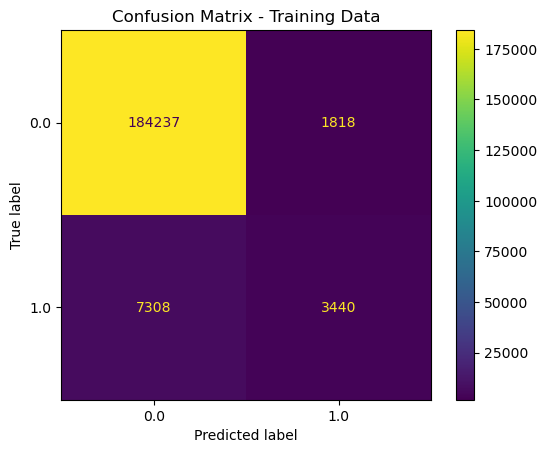

In [183]:
# Train Confusion Matrix
cm_dt_train = confusion_matrix(y_train, y_train_pred_dt)

# Display confusion matrix for training data
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_dt_train, display_labels=dt_model.classes_)
plt.figure(figsize=(8, 6))
disp_train.plot()
plt.title('Confusion Matrix - Training Data')
plt.show()

In [193]:
# Validation Classification Report
print(classification_report(y_val, y_val_pred_dt))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98     37211
         1.0       0.64      0.32      0.42      2150

    accuracy                           0.95     39361
   macro avg       0.80      0.65      0.70     39361
weighted avg       0.94      0.95      0.95     39361



Validation DT

<Figure size 800x600 with 0 Axes>

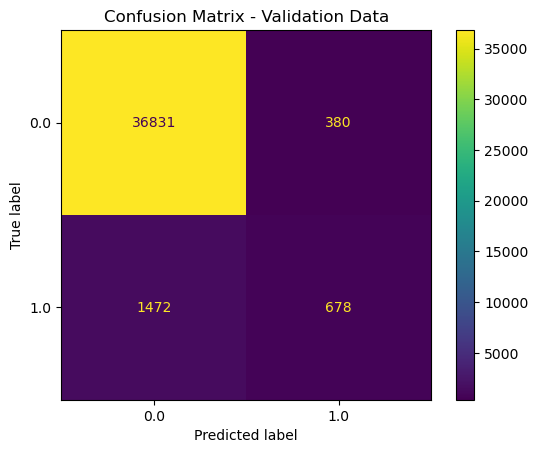

In [175]:
# Validation Confusion Matrix
cm_dt_val = confusion_matrix(y_val, y_val_pred_dt)

# Display confusion matrix for validation data
disp_val = ConfusionMatrixDisplay(confusion_matrix=cm_dt_val, display_labels=dt_model.classes_)
plt.figure(figsize=(8, 6))
disp_val.plot()
plt.title('Confusion Matrix - Validation Data')
plt.show()

Test DT

In [195]:
# Train Classification Report
print(classification_report(y_test, y_test_pred_dt))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97     46514
         1.0       0.52      0.26      0.34      2687

    accuracy                           0.95     49201
   macro avg       0.74      0.62      0.66     49201
weighted avg       0.93      0.95      0.94     49201



<Figure size 800x600 with 0 Axes>

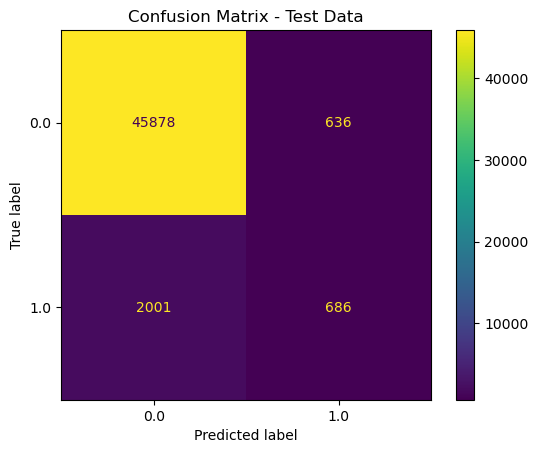

In [176]:
# Test Confusion Matrix
cm_dt_test = confusion_matrix(y_test, y_test_pred_dt)

# Display confusion matrix for test data
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_dt_test, display_labels=dt_model.classes_)
plt.figure(figsize=(8, 6))
disp_test.plot()
plt.title('Confusion Matrix - Test Data')
plt.show()

Plot the decision tree to see how it is categorising features:

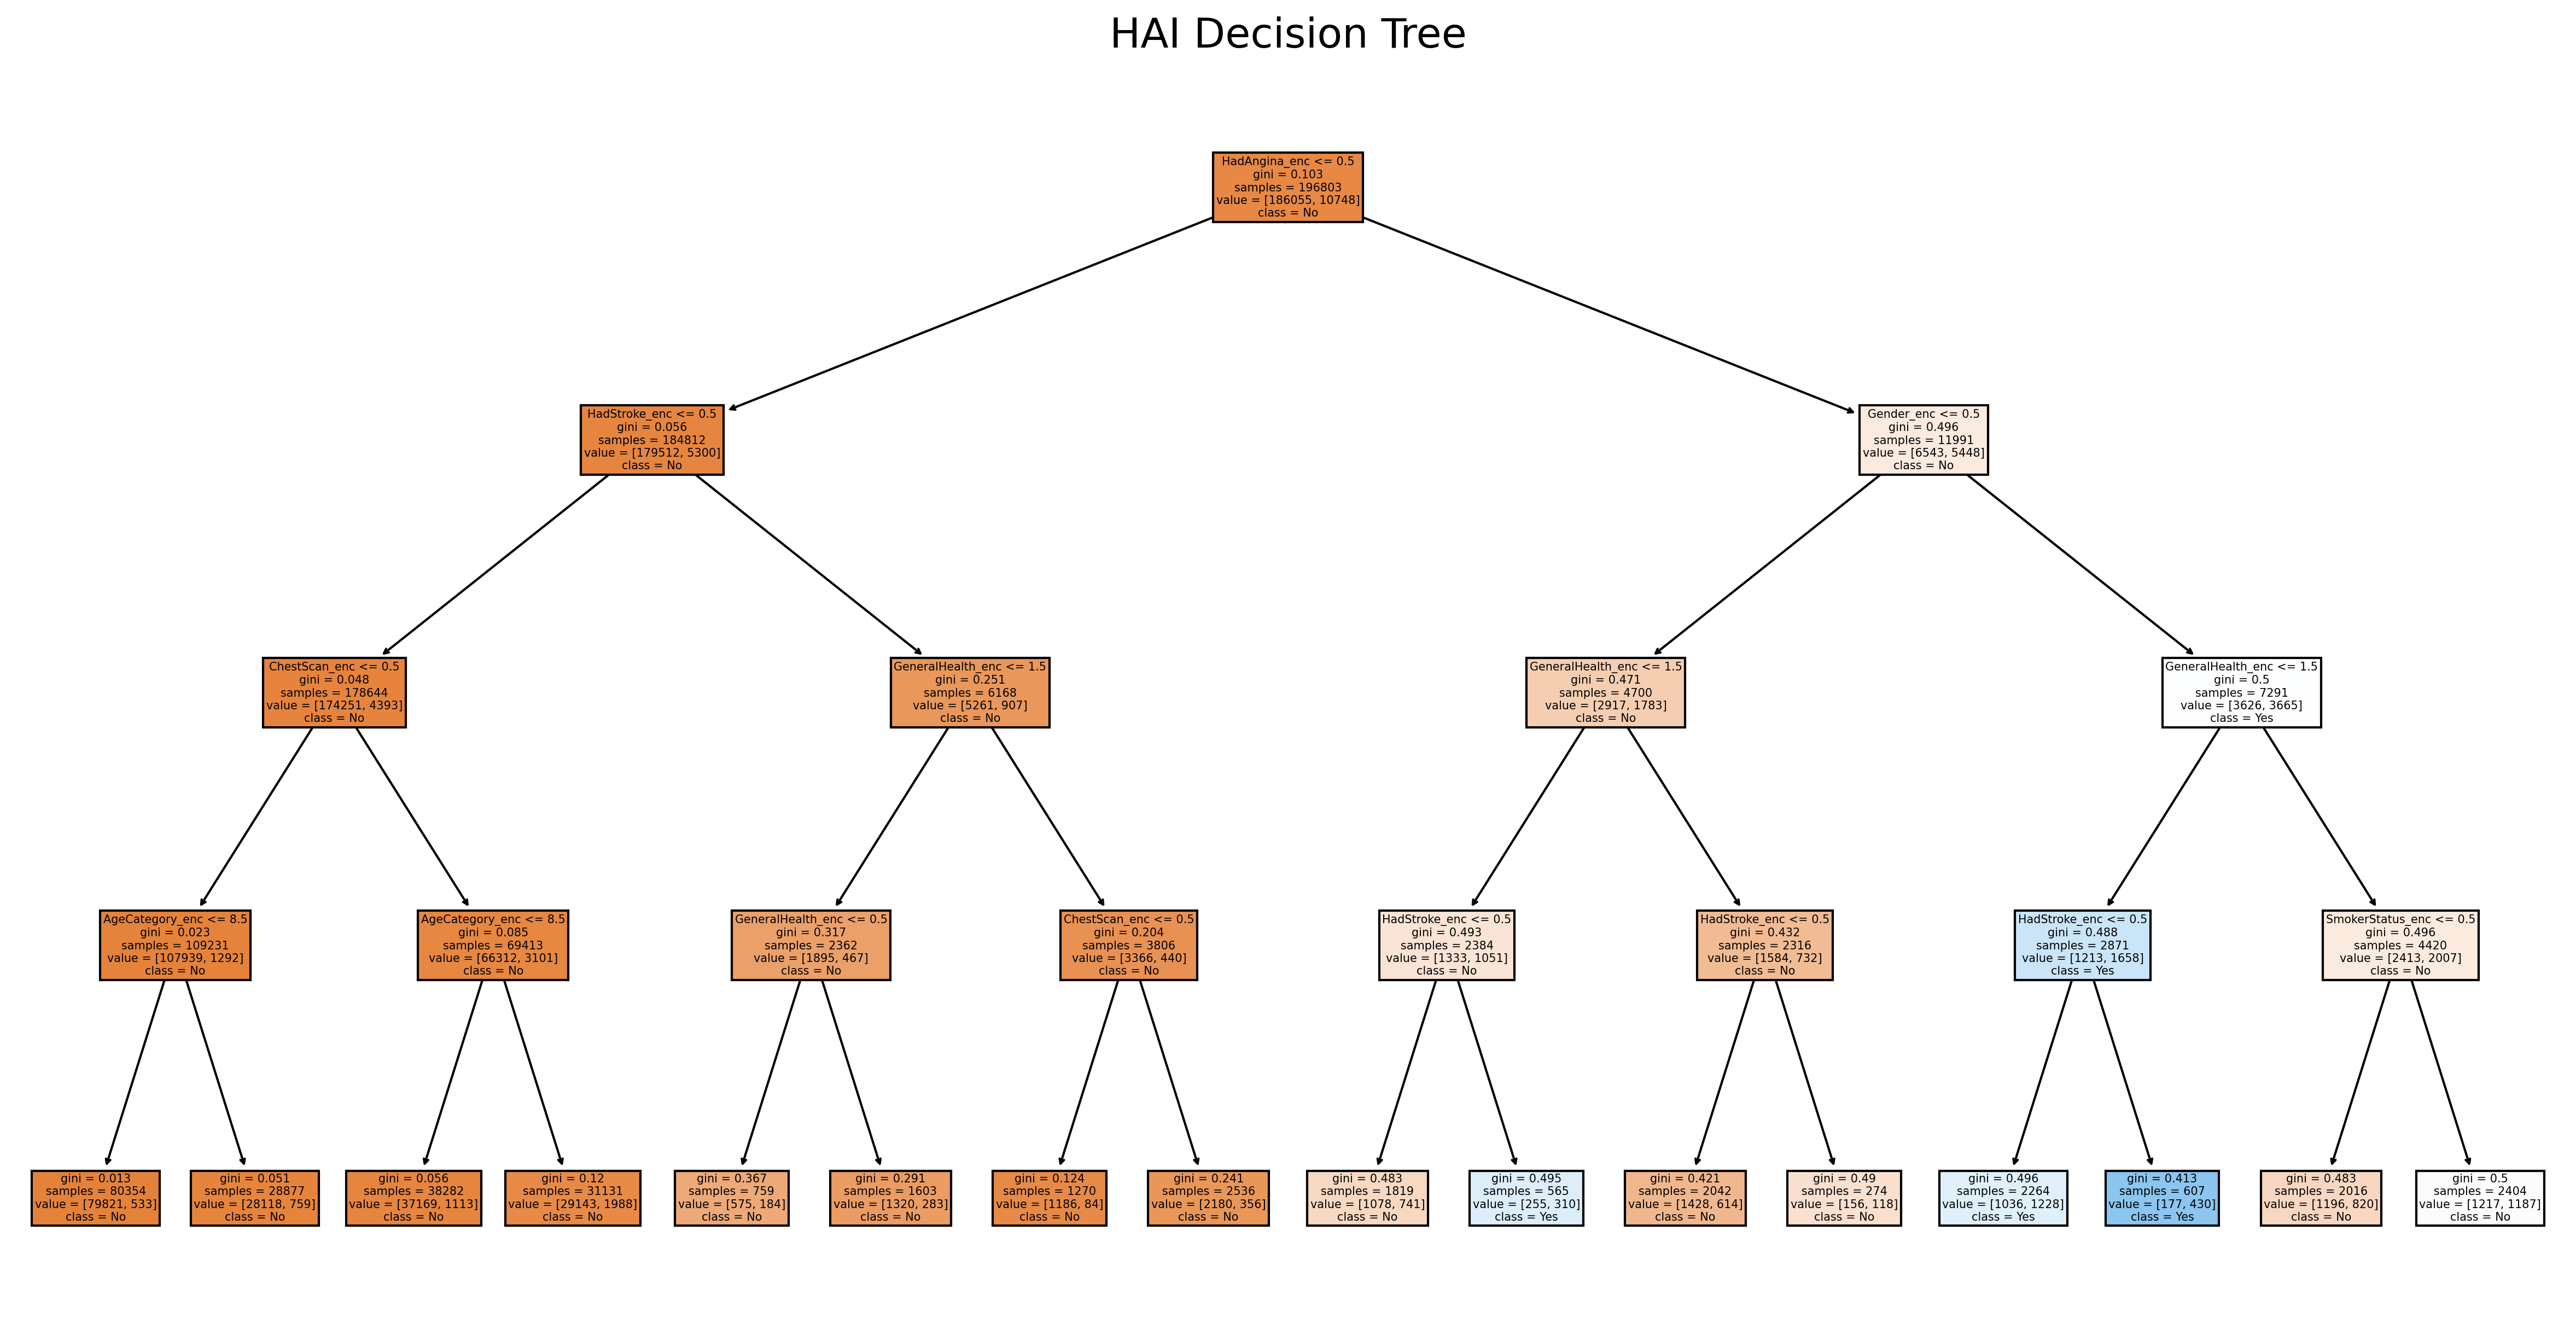

In [413]:
# Plot the decision tree
plt.figure(figsize=(20,10), dpi=300)
plot_tree(dt_model, 
          filled=True, 
          feature_names=X_train.columns, 
          class_names=["No", "Yes"])
plt.title("HAI Decision Tree")
plt.show()

Seems the decision tree is is cassifying Yes on the target (HadHeartAttack) as had angina in the past, if you are male and had a stroke you are much more likely to have a heart attack according to this model.

In [12]:
heart_attack_enc_m.groupby(by='GeneralHealth_enc').mean()[['HadHeartAttack_enc']]

HadHeartAttack_enc
GeneralHealth_enc                    
0.0                          0.214634
1.0                          0.122256
2.0                          0.059415
3.0                          0.028394
4.0                          0.014306

In [208]:
# Get feature importances
feature_importances = dt_model.feature_importances_

# Get feature names
feature_names = X_train.columns

dt_feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

dt_feature_importance_df = dt_feature_importance_df.sort_values(by='Importance', ascending=False)
print(dt_feature_importance_df)

                          Feature  Importance
16                  HadAngina_enc    0.663870
17                  HadStroke_enc    0.038768
5                             BMI    0.036639
8               GeneralHealth_enc    0.033836
12                AgeCategory_enc    0.028405
4               WeightInKilograms    0.024997
7                      Gender_enc    0.019501
29                  ChestScan_enc    0.017640
3                  HeightInMeters    0.016616
10               SmokerStatus_enc    0.014503
2                      SleepHours    0.013456
0              PhysicalHealthDays    0.013128
1                MentalHealthDays    0.009981
14                HadDiabetes_enc    0.006401
30            AlcoholDrinkers_enc    0.006325
9          PhysicalActivities_enc    0.004982
26          DifficultyWalking_enc    0.004592
11            ECigaretteUsage_enc    0.003686
25    BlindOrVisionDifficulty_enc    0.003478
28          DifficultyErrands_enc    0.003405
22           HadKidneyDisease_enc 

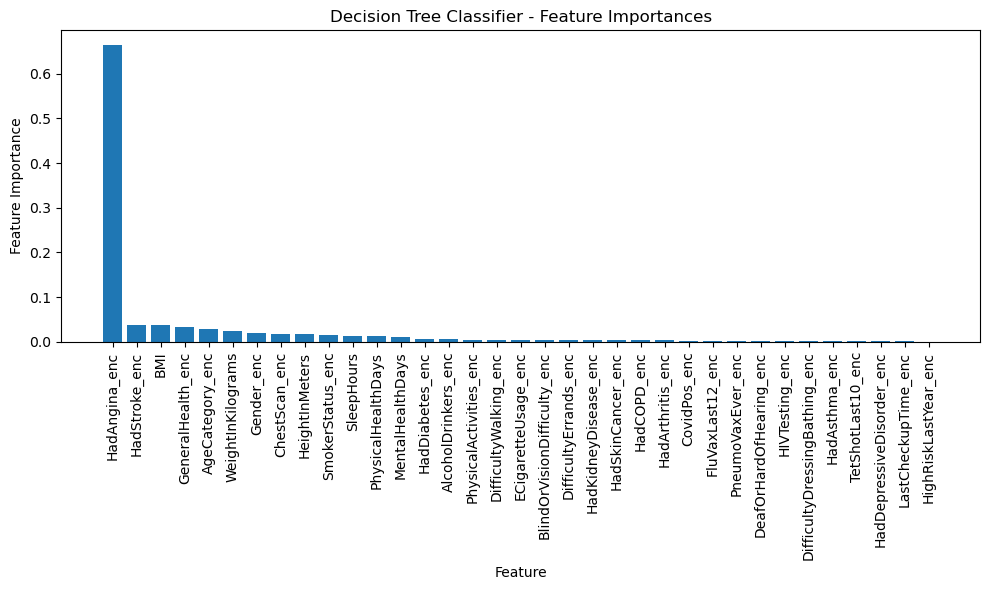

In [209]:
# Get feature importances
feature_importances = dt_model.feature_importances_

# Get feature names
feature_names = X_train.columns

# Sort feature importances in descending order
sorted_idx = feature_importances.argsort()[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.xticks(range(len(sorted_idx)), feature_names[sorted_idx], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Decision Tree Classifier - Feature Importances')
plt.tight_layout()
plt.show()


Now previously seeing the decision tree the reason why those decsions were made are apparent. angina being the most important factor in having a heart attack then strokes in second place and gender in 7th place. It is odd that the model chose to skip BMI, general health, age and weight when determining factors when plotting the decision tree. The decisions the tree has made can be cross referance by fitting more and examining the feature importances.

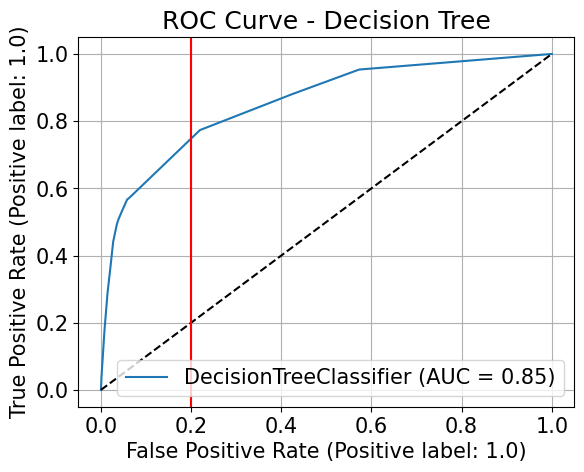

In [414]:
plot_roc_curve(dt_model, X_test, y_test)
plt.plot([0,1], [0,1], color='black', linestyle='--')
plt.axvline(x=0.2, color='r', linestyle='-')
plt.title("ROC Curve - Decision Tree")
plt.grid()
plt.show()

#### Model - Random Forest

Random forest is an ensemble learning method that improves the accuracy and robustness of decision trees by constructing a multitude of them and aggregating their predictions. Each decision tree in the random forest is trained on a different subset of the data and each split in the trees considers only a random subset of features. This randomness helps to ensure that the individual trees are diverse and uncorrelated. During prediction, the random forest aggregates the outputs of its individual trees, typically using a majority vote for classification or averaging for regression, leading to more accurate and stable predictions than any single decision tree. Random forests are less prone to overfitting compared to individual decision trees and are effective for both classification and regression tasks, providing high accuracy, robustness, and feature importance estimation.

I am now fitting a random forest model in a grid search to determine the optimal decision tree and to see what feature importances the model determines to be most important tot he target.

Grid Search - Random Forest

Creating a pipeline for the random forest model:

In [223]:
# Making a pipeline esimator list 
PCA_rf_estimators = [('scaler', StandardScaler()),
                    ('rf', RandomForestClassifier(random_state=12))
]

pipe = Pipeline(PCA_rf_estimators)
print(pipe) # Checking the pipe has been correctly made

Pipeline(steps=[('scaler', StandardScaler()),
                ('rf', RandomForestClassifier(random_state=12))])


Defining the hyperparameters:

In [224]:
# Defining rf V1 grid search

n_estimators = [5, 10, 20]
max_depth = [1, 2, 3, 4]
# min_samples_split = [2, 5]
# min_samples_leaf = [5, 10]
#max_features = ['sqrt', 'log2']

params = dict(
    rf = [RandomForestClassifier()],
    rf__n_estimators = n_estimators,
    rf__max_depth = max_depth,
    # rf__min_samples_split = min_samples_split,
    # rf__min_samples_leaf = min_samples_leaf,
    #rf__max_features = max_features
)
display(params)

{'rf': [RandomForestClassifier()],
 'rf__n_estimators': [5, 10, 20],
 'rf__max_depth': [1, 2, 3, 4]}

In [225]:
grid_search_model_rf_V1 = GridSearchCV(estimator= pipe, param_grid=params, cv=5, n_jobs= 4, verbose= 2)
grid_search_model_rf_V1.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END rf=RandomForestClassifier(), rf__max_depth=1, rf__n_estimators=5; total time=   0.2s
[CV] END rf=RandomForestClassifier(), rf__max_depth=1, rf__n_estimators=5; total time=   0.2s
[CV] END rf=RandomForestClassifier(), rf__max_depth=1, rf__n_estimators=5; total time=   0.2s
[CV] END rf=RandomForestClassifier(), rf__max_depth=1, rf__n_estimators=5; total time=   0.3s
[CV] END rf=RandomForestClassifier(), rf__max_depth=1, rf__n_estimators=5; total time=   0.2s
[CV] END rf=RandomForestClassifier(), rf__max_depth=1, rf__n_estimators=10; total time=   0.3s
[CV] END rf=RandomForestClassifier(), rf__max_depth=1, rf__n_estimators=10; total time=   0.3s
[CV] END rf=RandomForestClassifier(), rf__max_depth=1, rf__n_estimators=10; total time=   0.3s
[CV] END rf=RandomForestClassifier(), rf__max_depth=1, rf__n_estimators=10; total time=   0.3s
[CV] END rf=RandomForestClassifier(), rf__max_depth=1, rf__n_estimators=10; total time=  

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rf',
                                        RandomForestClassifier(random_state=12))]),
             n_jobs=4,
             param_grid={'rf': [RandomForestClassifier(max_depth=4,
                                                       n_estimators=5)],
                         'rf__max_depth': [1, 2, 3, 4],
                         'rf__n_estimators': [5, 10, 20]},
             verbose=2)

In [226]:
# Extracting the essential information 

# Result of the grid search optimisation process - best hyperparameter and best model
print('Best Score:', grid_search_model_rf_V1.best_score_); 
print('Best Max Depth:', grid_search_model_rf_V1.best_estimator_.get_params()['rf__max_depth'])
print('Best Max Features:', grid_search_model_rf_V1.best_estimator_.get_params()['rf__max_features'])
print('Best Min Samples Leaf:', grid_search_model_rf_V1.best_estimator_.get_params()['rf__min_samples_leaf'])
#print('Best Min Samples Split:', grid_search_model_rf_V1.best_estimator_.get_params()['rf__min_samples_split'])
print('Best n estimators:', grid_search_model_rf_V1.best_estimator_.get_params()['rf__n_estimators'])

Best Score: 0.9458494011188492
Best Max Depth: 4
Best Max Features: auto
Best Min Samples Leaf: 1
Best n estimators: 5


In [227]:
best_rf1_model = grid_search_model_rf_V1.best_estimator_
print("Best parameters found: ", grid_search_model_rf_V1.best_params_)

Best parameters found:  {'rf': RandomForestClassifier(max_depth=4, n_estimators=5), 'rf__max_depth': 4, 'rf__n_estimators': 5}


In [74]:
y_train_pred_rf = best_rf1_model.predict(X_train)
y_val_pred_rf = best_rf1_model.predict(X_val)
y_test_pred_rf = best_rf1_model.predict(X_test)

In [75]:
# Best Random Forest component within the pipeline
best_rf_model_1 = best_rf1_model.named_steps['rf']

# Extract the individual trees from the best Random Forest model
individual_trees = best_rf_model_1.estimators_

# Print the number of trees
print(f"Number of trees in the best random forest model: {len(individual_trees)}")


Number of trees in the best random forest model: 5


In [76]:
print(individual_trees)

[DecisionTreeClassifier(max_depth=4, max_features='auto',
                       random_state=1808033550), DecisionTreeClassifier(max_depth=4, max_features='auto', random_state=13053665), DecisionTreeClassifier(max_depth=4, max_features='auto',
                       random_state=1410365026), DecisionTreeClassifier(max_depth=4, max_features='auto',
                       random_state=1134805784), DecisionTreeClassifier(max_depth=4, max_features='auto',
                       random_state=1512914623)]


In [77]:
train_rf_acc = accuracy_score(y_train, y_train_pred_rf)
print(train_rf_acc)

0.9453819301535038


In [78]:
# Print classification report for training data
print("Classification Report - Training Data:")
print(classification_report(y_train, y_train_pred_rf, zero_division=0))

# Print classification report for validation data
print("\nClassification Report - Validation Data:")
print(classification_report(y_val, y_val_pred_rf, zero_division=0))

# Print classification report for test data
print("\nClassification Report - Test Data:")
print(classification_report(y_test, y_test_pred_rf, zero_division=0))


Classification Report - Training Data:
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97    186055
         1.0       0.00      0.00      0.00     10748

    accuracy                           0.95    196803
   macro avg       0.47      0.50      0.49    196803
weighted avg       0.89      0.95      0.92    196803


Classification Report - Validation Data:
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97     37211
         1.0       0.00      0.00      0.00      2150

    accuracy                           0.95     39361
   macro avg       0.47      0.50      0.49     39361
weighted avg       0.89      0.95      0.92     39361


Classification Report - Test Data:
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97     46514
         1.0       0.00      0.00      0.00      2687

    accuracy                           0.95     49201
   macro av

                          Feature  Importance
34           HighRiskLastYear_enc    0.000000
21      HadDepressiveDisorder_enc    0.000000
19              HadSkinCancer_enc    0.000000
15                   CovidPos_enc    0.000000
28          DifficultyErrands_enc    0.000000
13              TetShotLast10_enc    0.000000
31                 HIVTesting_enc    0.000000
11            ECigaretteUsage_enc    0.000000
6             LastCheckupTime_enc    0.000000
5                             BMI    0.000000
4               WeightInKilograms    0.000000
32               FluVaxLast12_enc    0.000000
24        DeafOrHardOfHearing_enc    0.000433
18                  HadAsthma_enc    0.000664
27  DifficultyDressingBathing_enc    0.000890
1                MentalHealthDays    0.000901
2                      SleepHours    0.001005
25    BlindOrVisionDifficulty_enc    0.001301
30            AlcoholDrinkers_enc    0.001448
9          PhysicalActivities_enc    0.003057
33              PneumoVaxEver_enc 

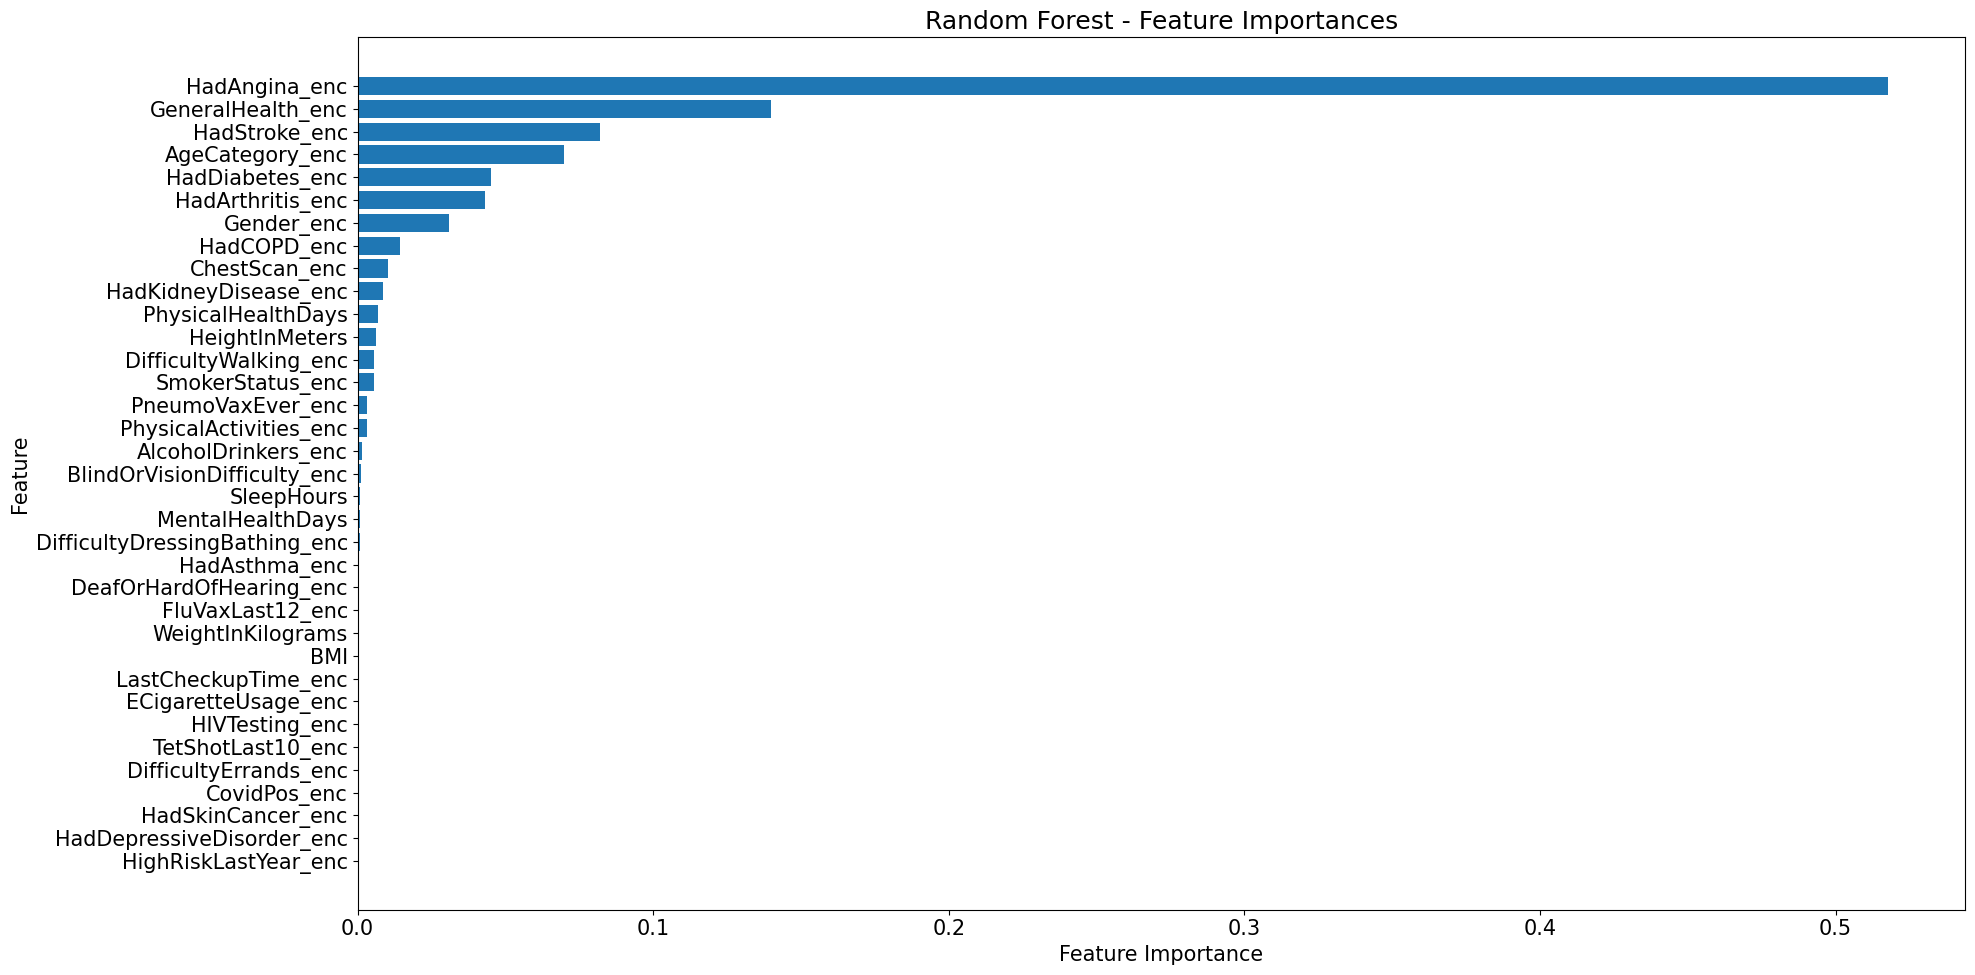

In [134]:
# Access the Random Forest component within the pipeline
best_rf01_model = best_rf1_model.named_steps['rf']

# Get feature importances
feature_importances = best_rf01_model.feature_importances_

# Get feature names
feature_names = X_train.columns  # Replace with your actual feature names

# Create a DataFrame of feature importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the dataframe by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True, )

# Display the sorted dataframe
print(feature_importance_df)

# Plot feature importances
plt.figure(figsize=(20, 10))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest - Feature Importances')
plt.tight_layout()
plt.show()


Angina, general health and had a stroke being the top 3 most important features in the random forest model across all decision trees.

**Best Random Forest - Decision Tree Visualizations**

Decision Tree Viz One

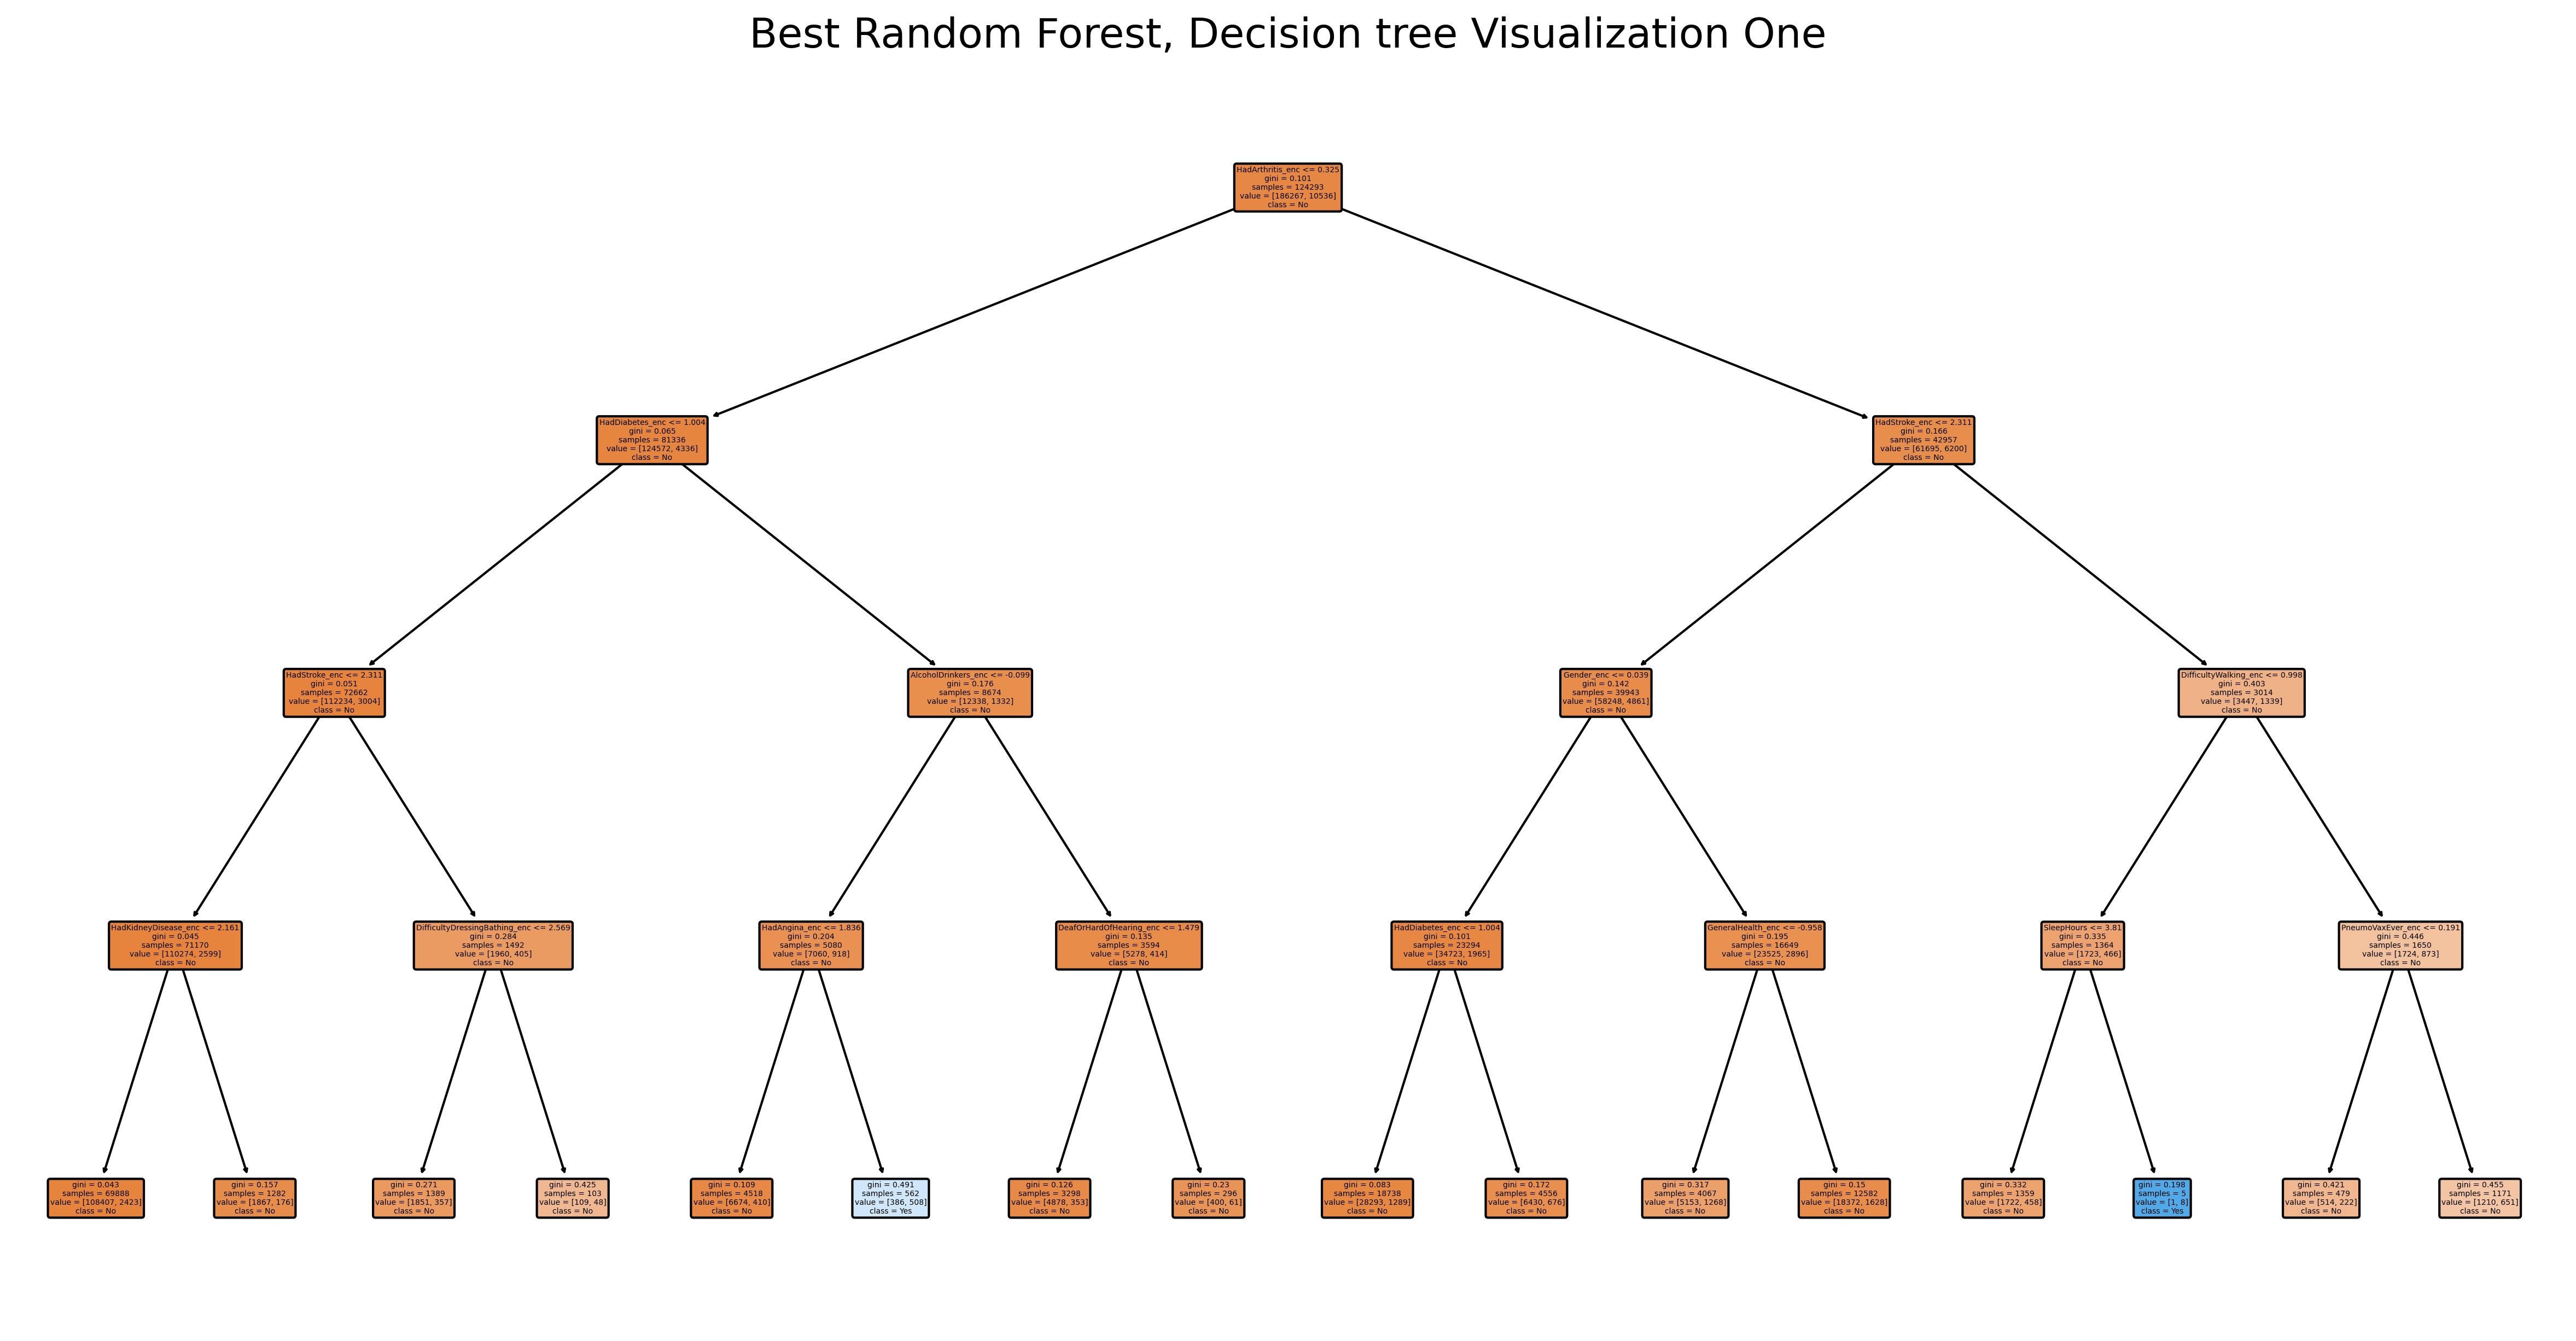

In [169]:
# Visualize dt One
plt.rcParams.update({'font.size': 15})

tree_idx = 0  # Index of the tree
plt.figure(figsize=(20, 10), dpi=300) # Size and dots per index, improves resolution
plot_tree(individual_trees[tree_idx],
          feature_names=X.columns,
          class_names= ["No", "Yes"],
          filled=True,
          rounded=True)
plt.title('Best Random Forest, Decision tree Visualization One')
plt.show()


Decision Tree Viz Two

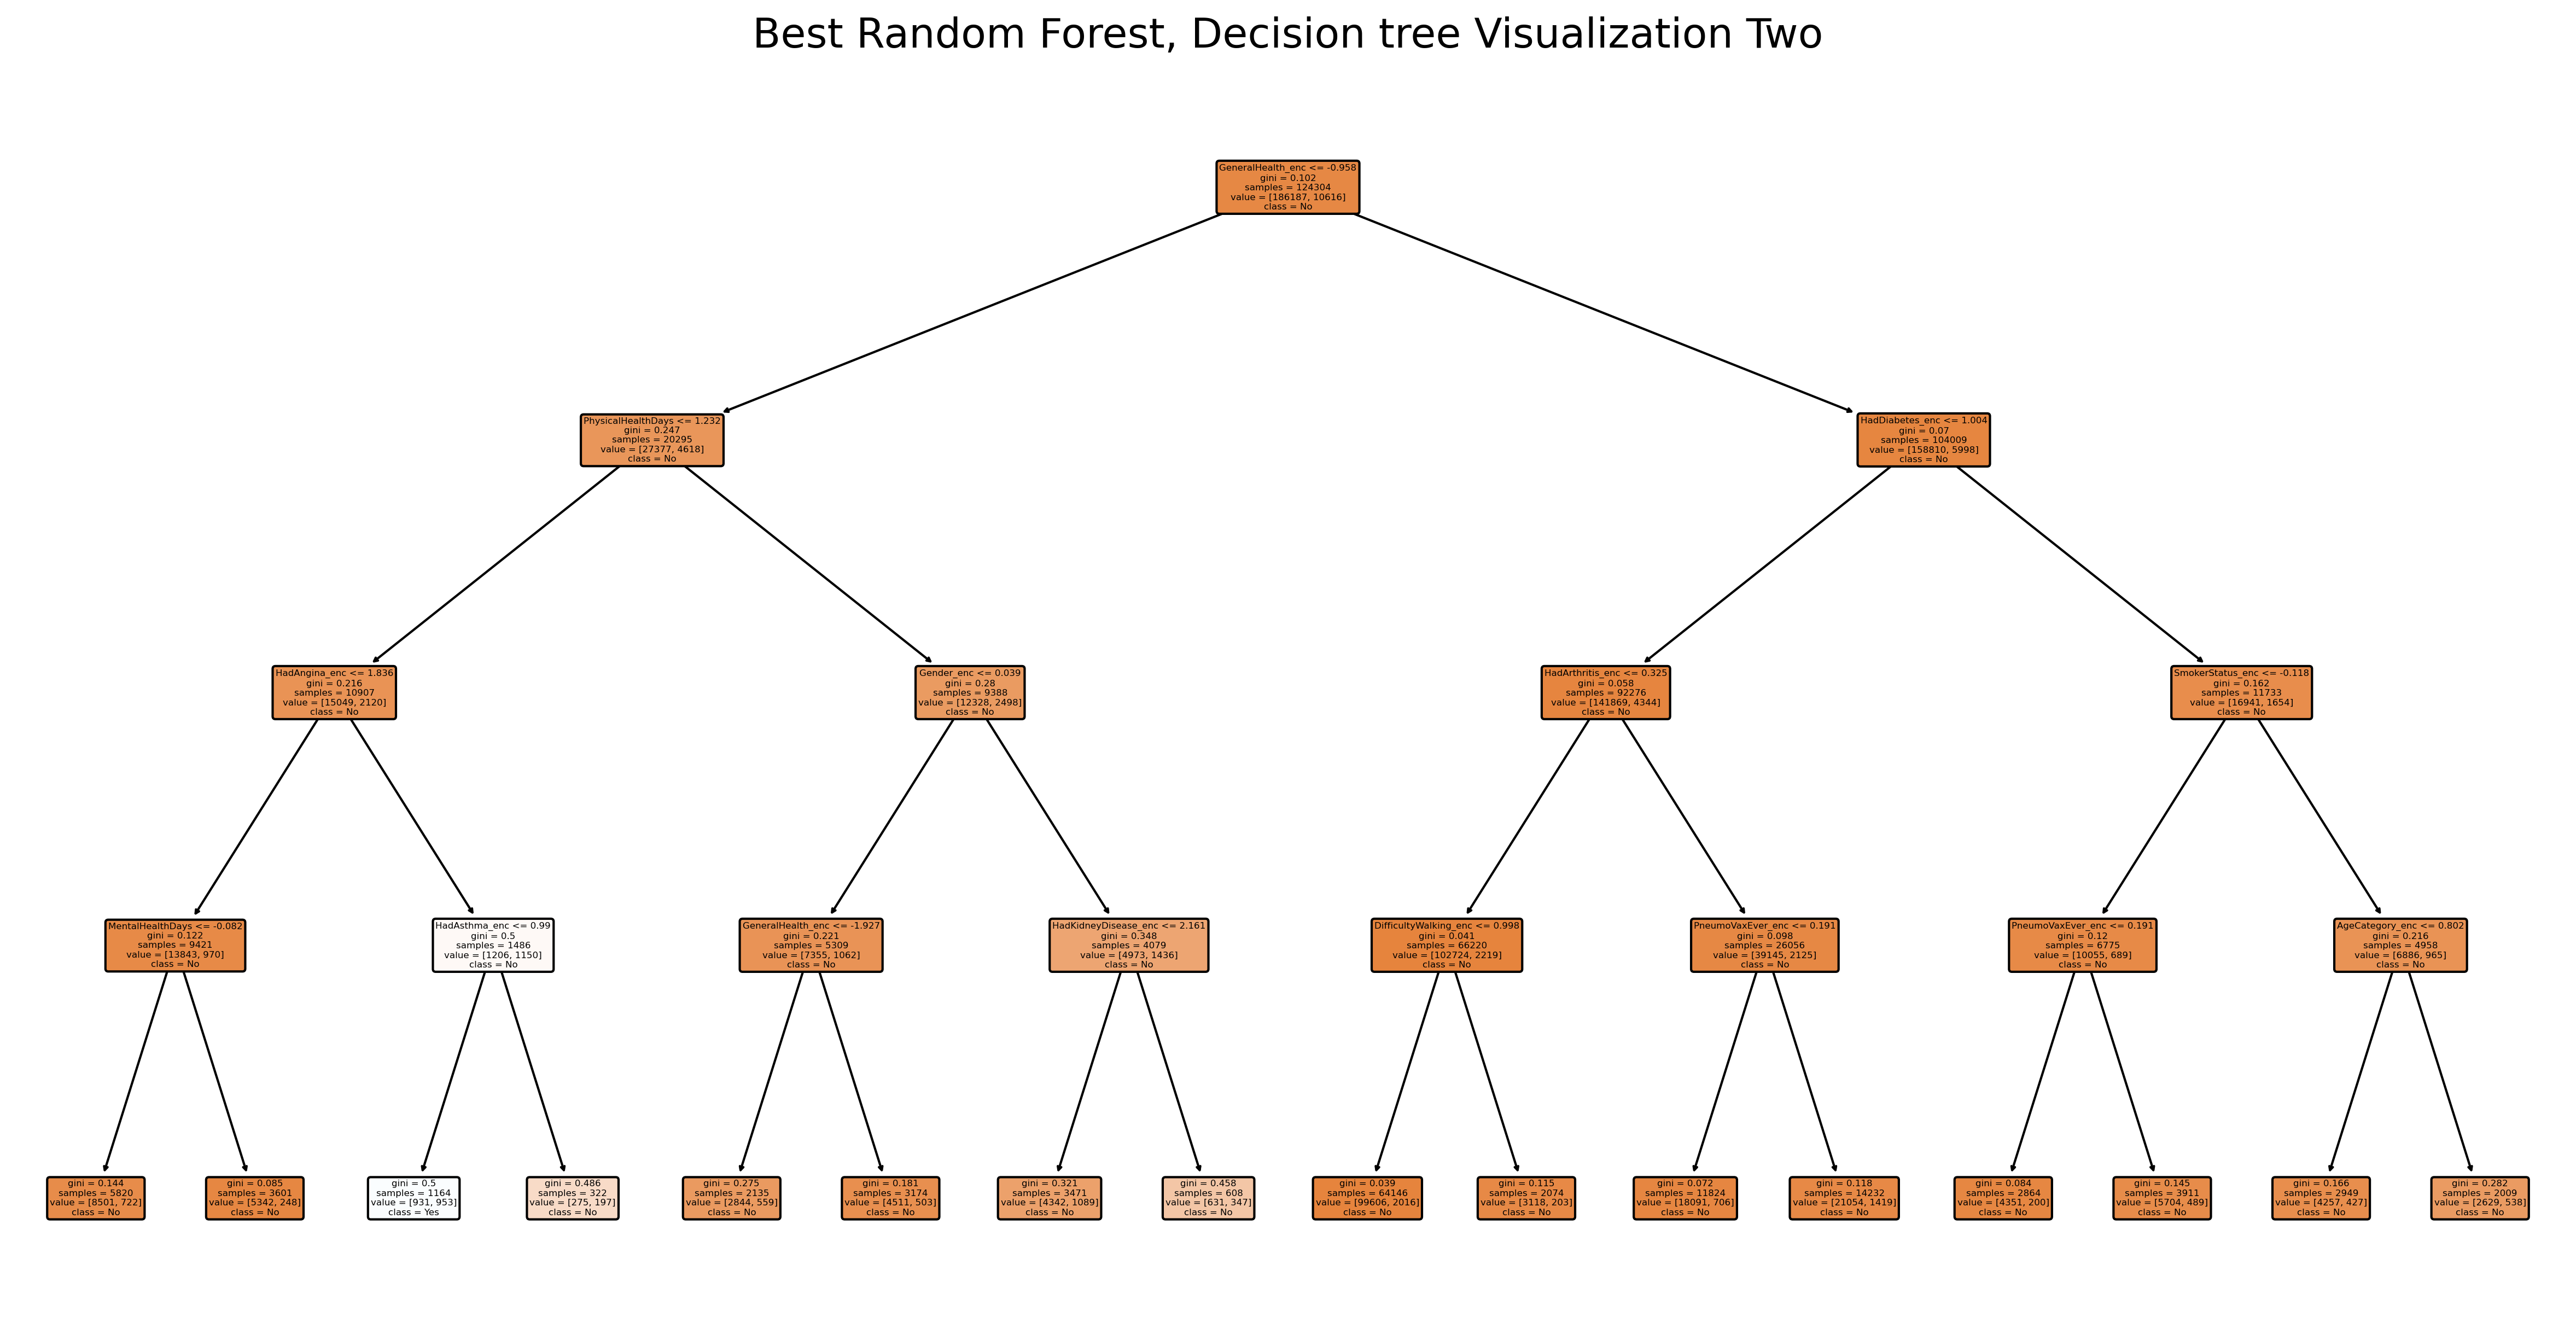

In [162]:
# Visualize dt Two
plt.rcParams.update({'font.size': 15})

tree_idx = 1  # Index of the tree
plt.figure(figsize=(20, 10), dpi=300) # Size and dots per index, improves resolution
plot_tree(individual_trees[tree_idx],
          feature_names=X.columns,
          class_names=["No", "Yes"],
          filled=True,
          rounded=True)
plt.title('Best Random Forest, Decision tree Visualization Two')
plt.show()

Decision Tree Viz Three

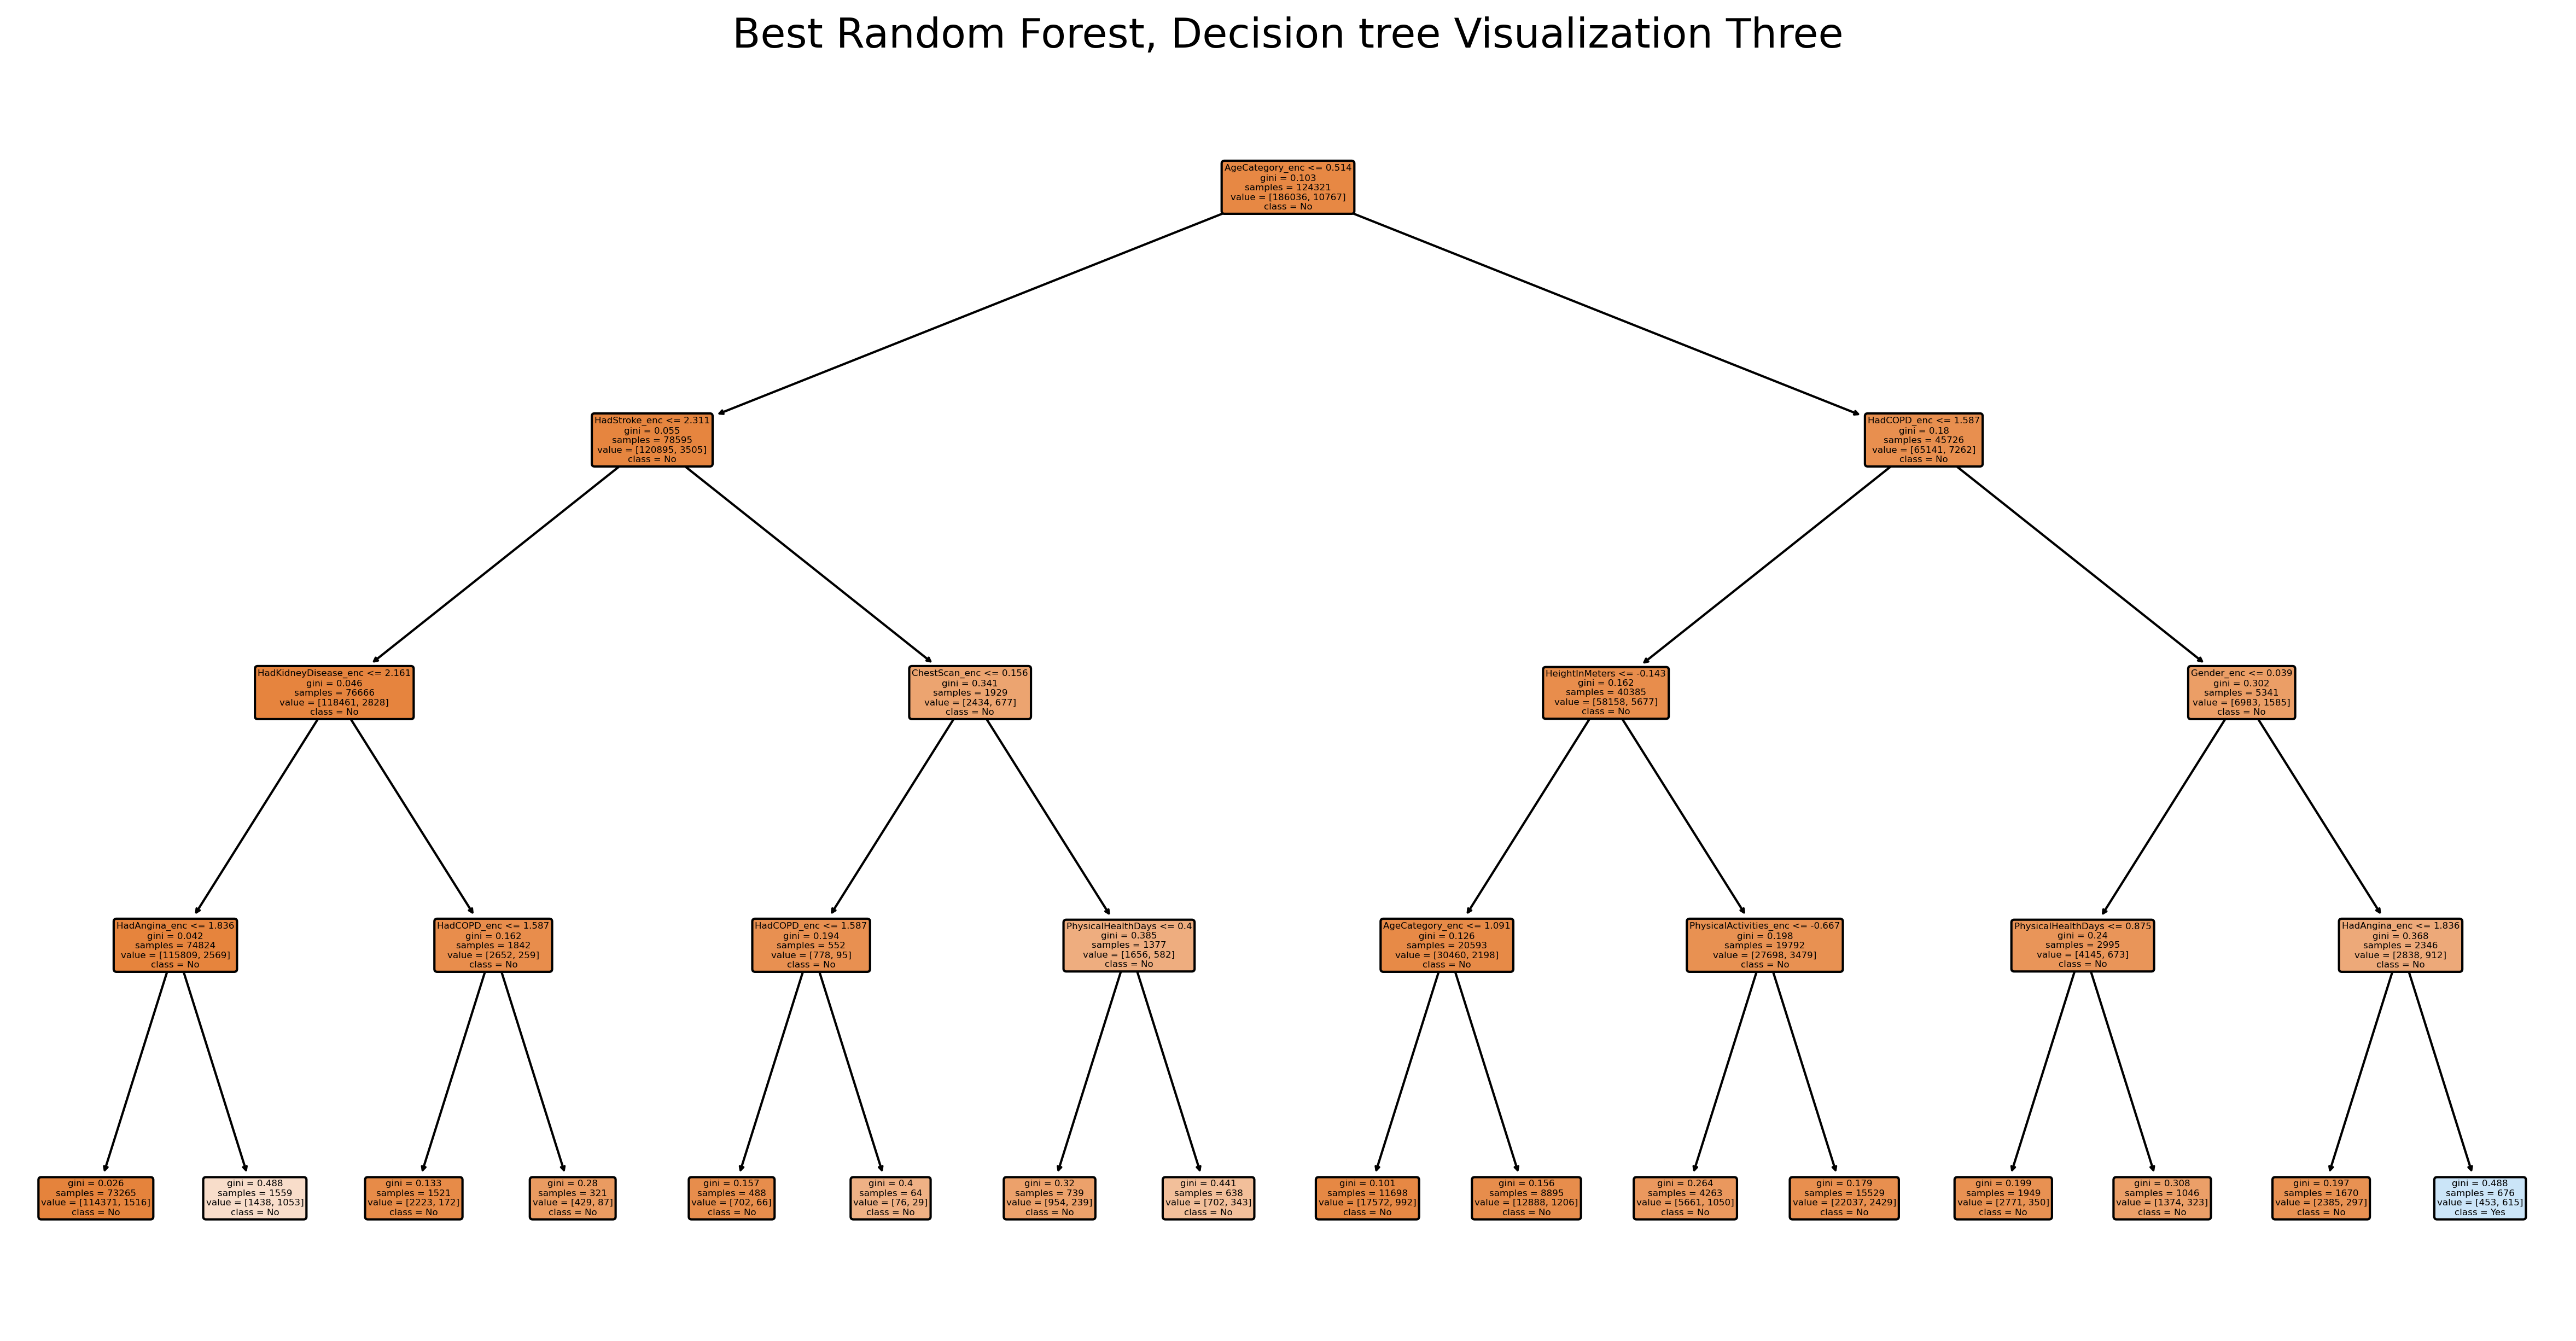

In [163]:
# Visualize dt Three
plt.rcParams.update({'font.size': 15})

tree_idx = 2  # Index of the tree
plt.figure(figsize=(20, 10), dpi=300) # Size and dots per index, improves resolution
plot_tree(individual_trees[tree_idx],
          feature_names=X.columns,
          class_names=["No", "Yes"],
          filled=True,
          rounded=True)
plt.title('Best Random Forest, Decision tree Visualization Three')
plt.show()

Decision Tree Viz Four

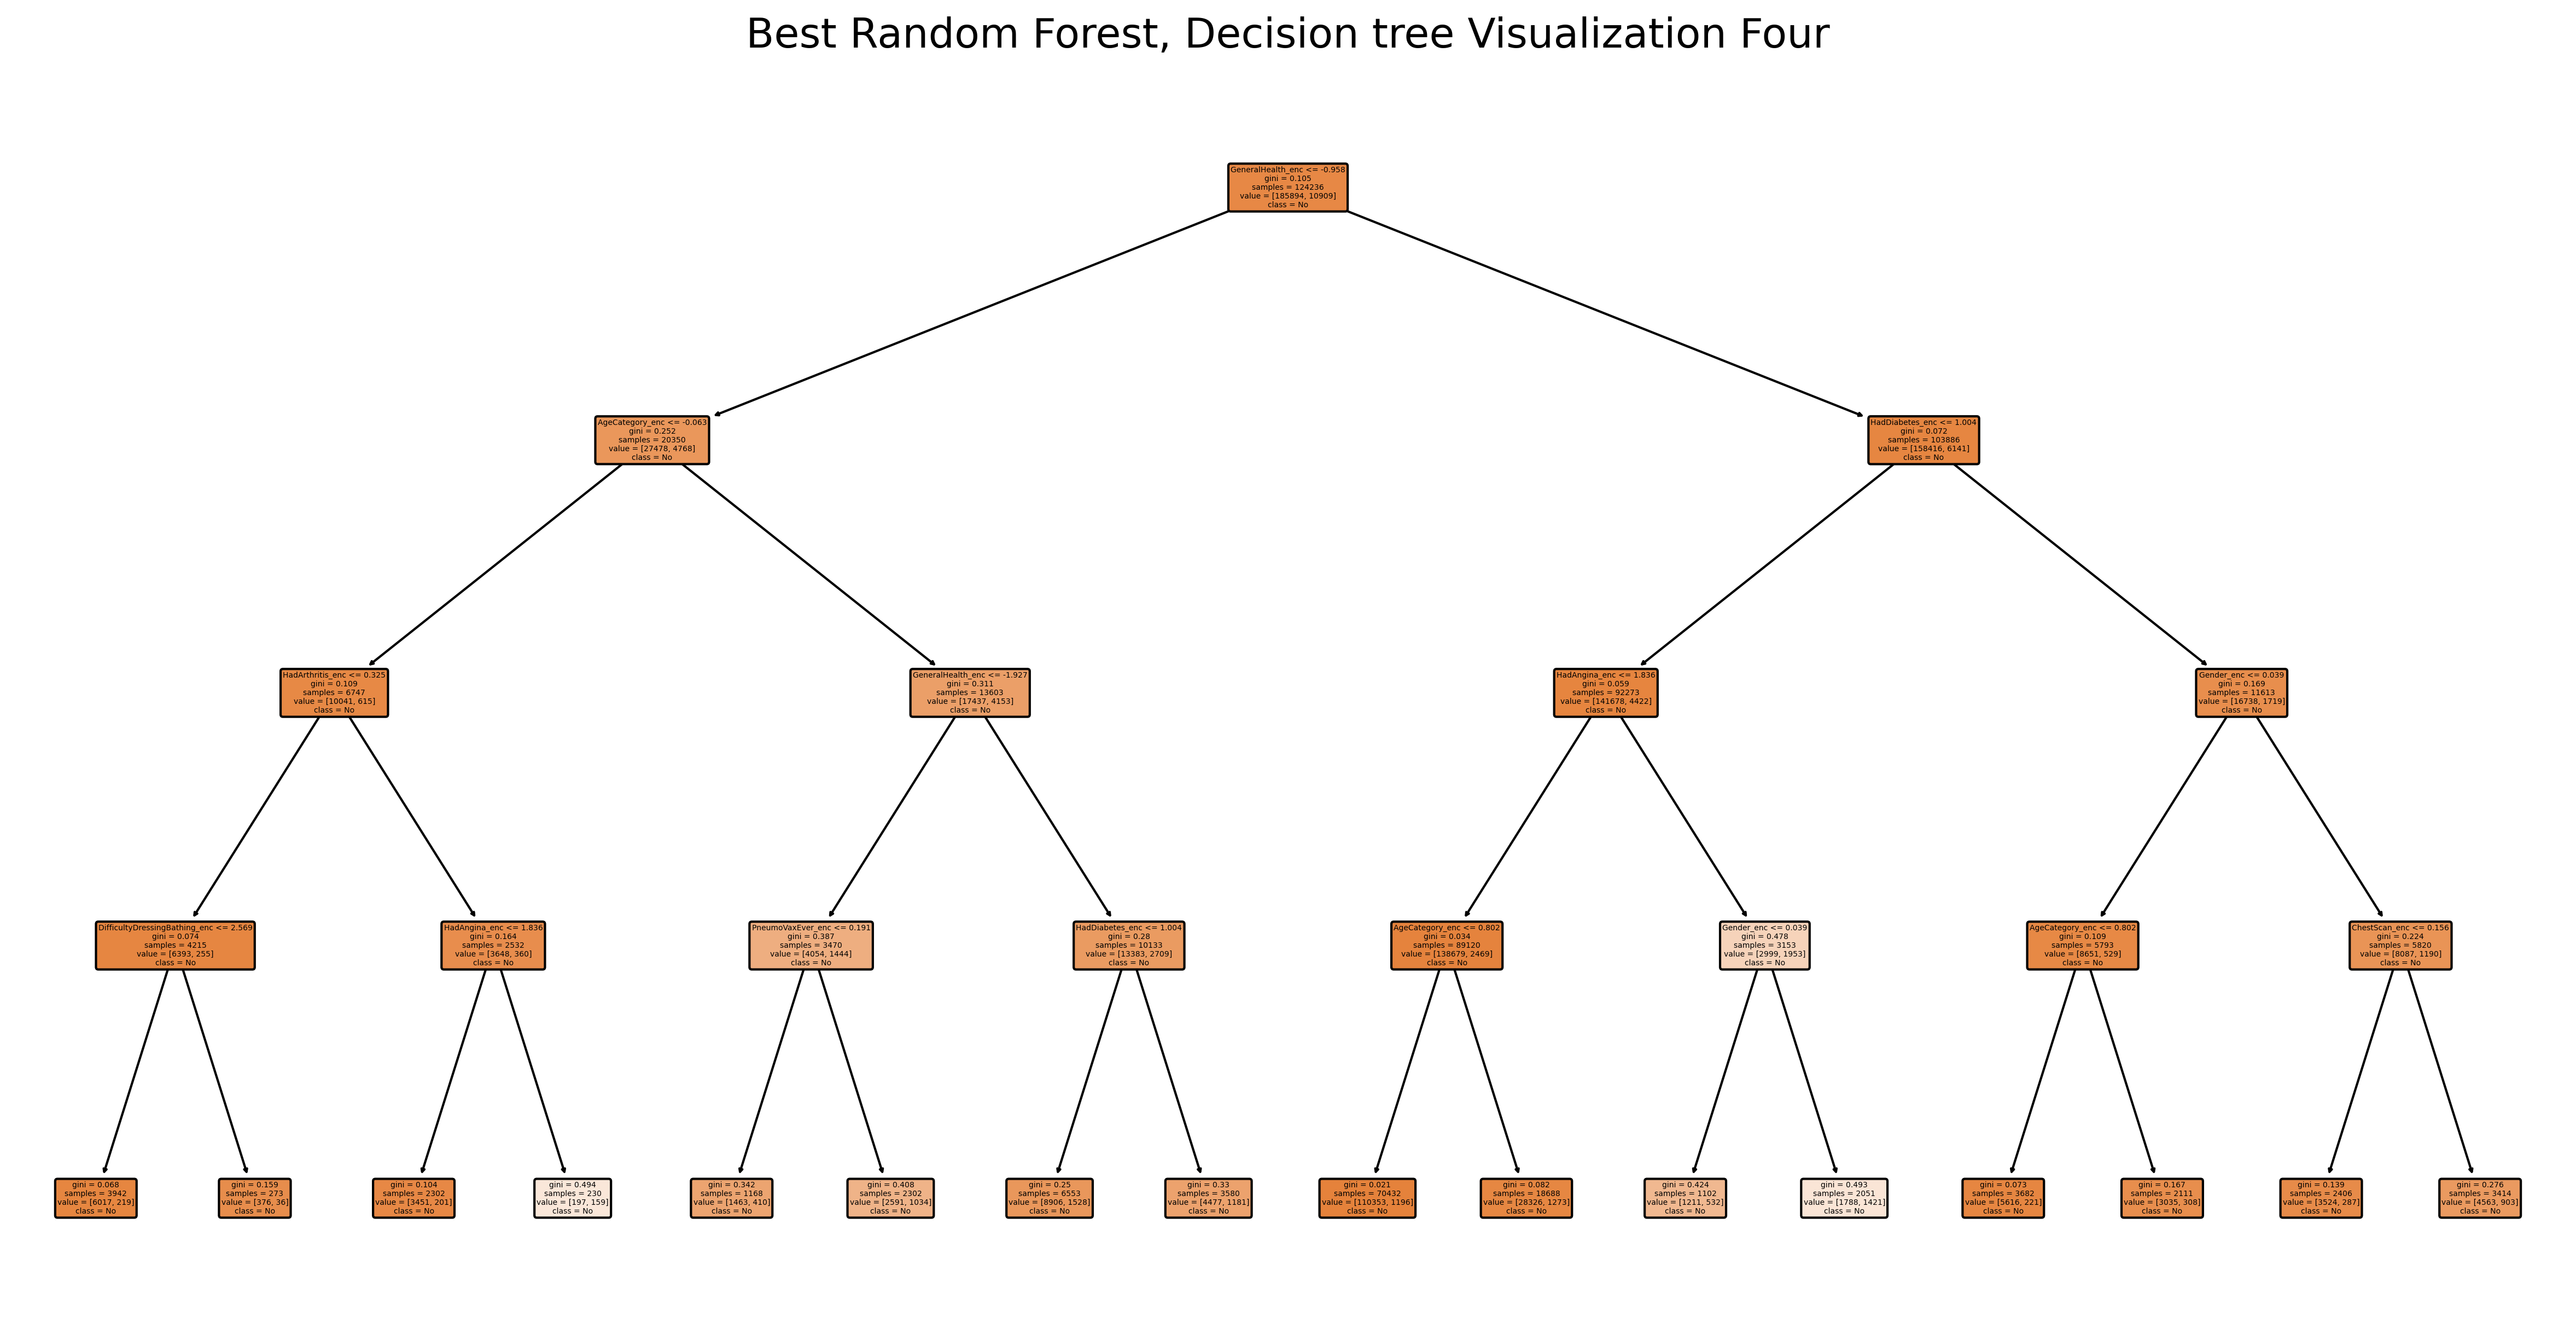

In [164]:
# Visualize dt Four
plt.rcParams.update({'font.size': 15})

tree_idx = 3  # Index of the tree
plt.figure(figsize=(20, 10), dpi=300) # Size and dots per index, improves resolution
plot_tree(individual_trees[tree_idx],
          feature_names=X.columns,
          class_names=["No", "Yes"],
          filled=True,
          rounded=True)
plt.title('Best Random Forest, Decision tree Visualization Four')
plt.show()

Decision Tree Viz Five

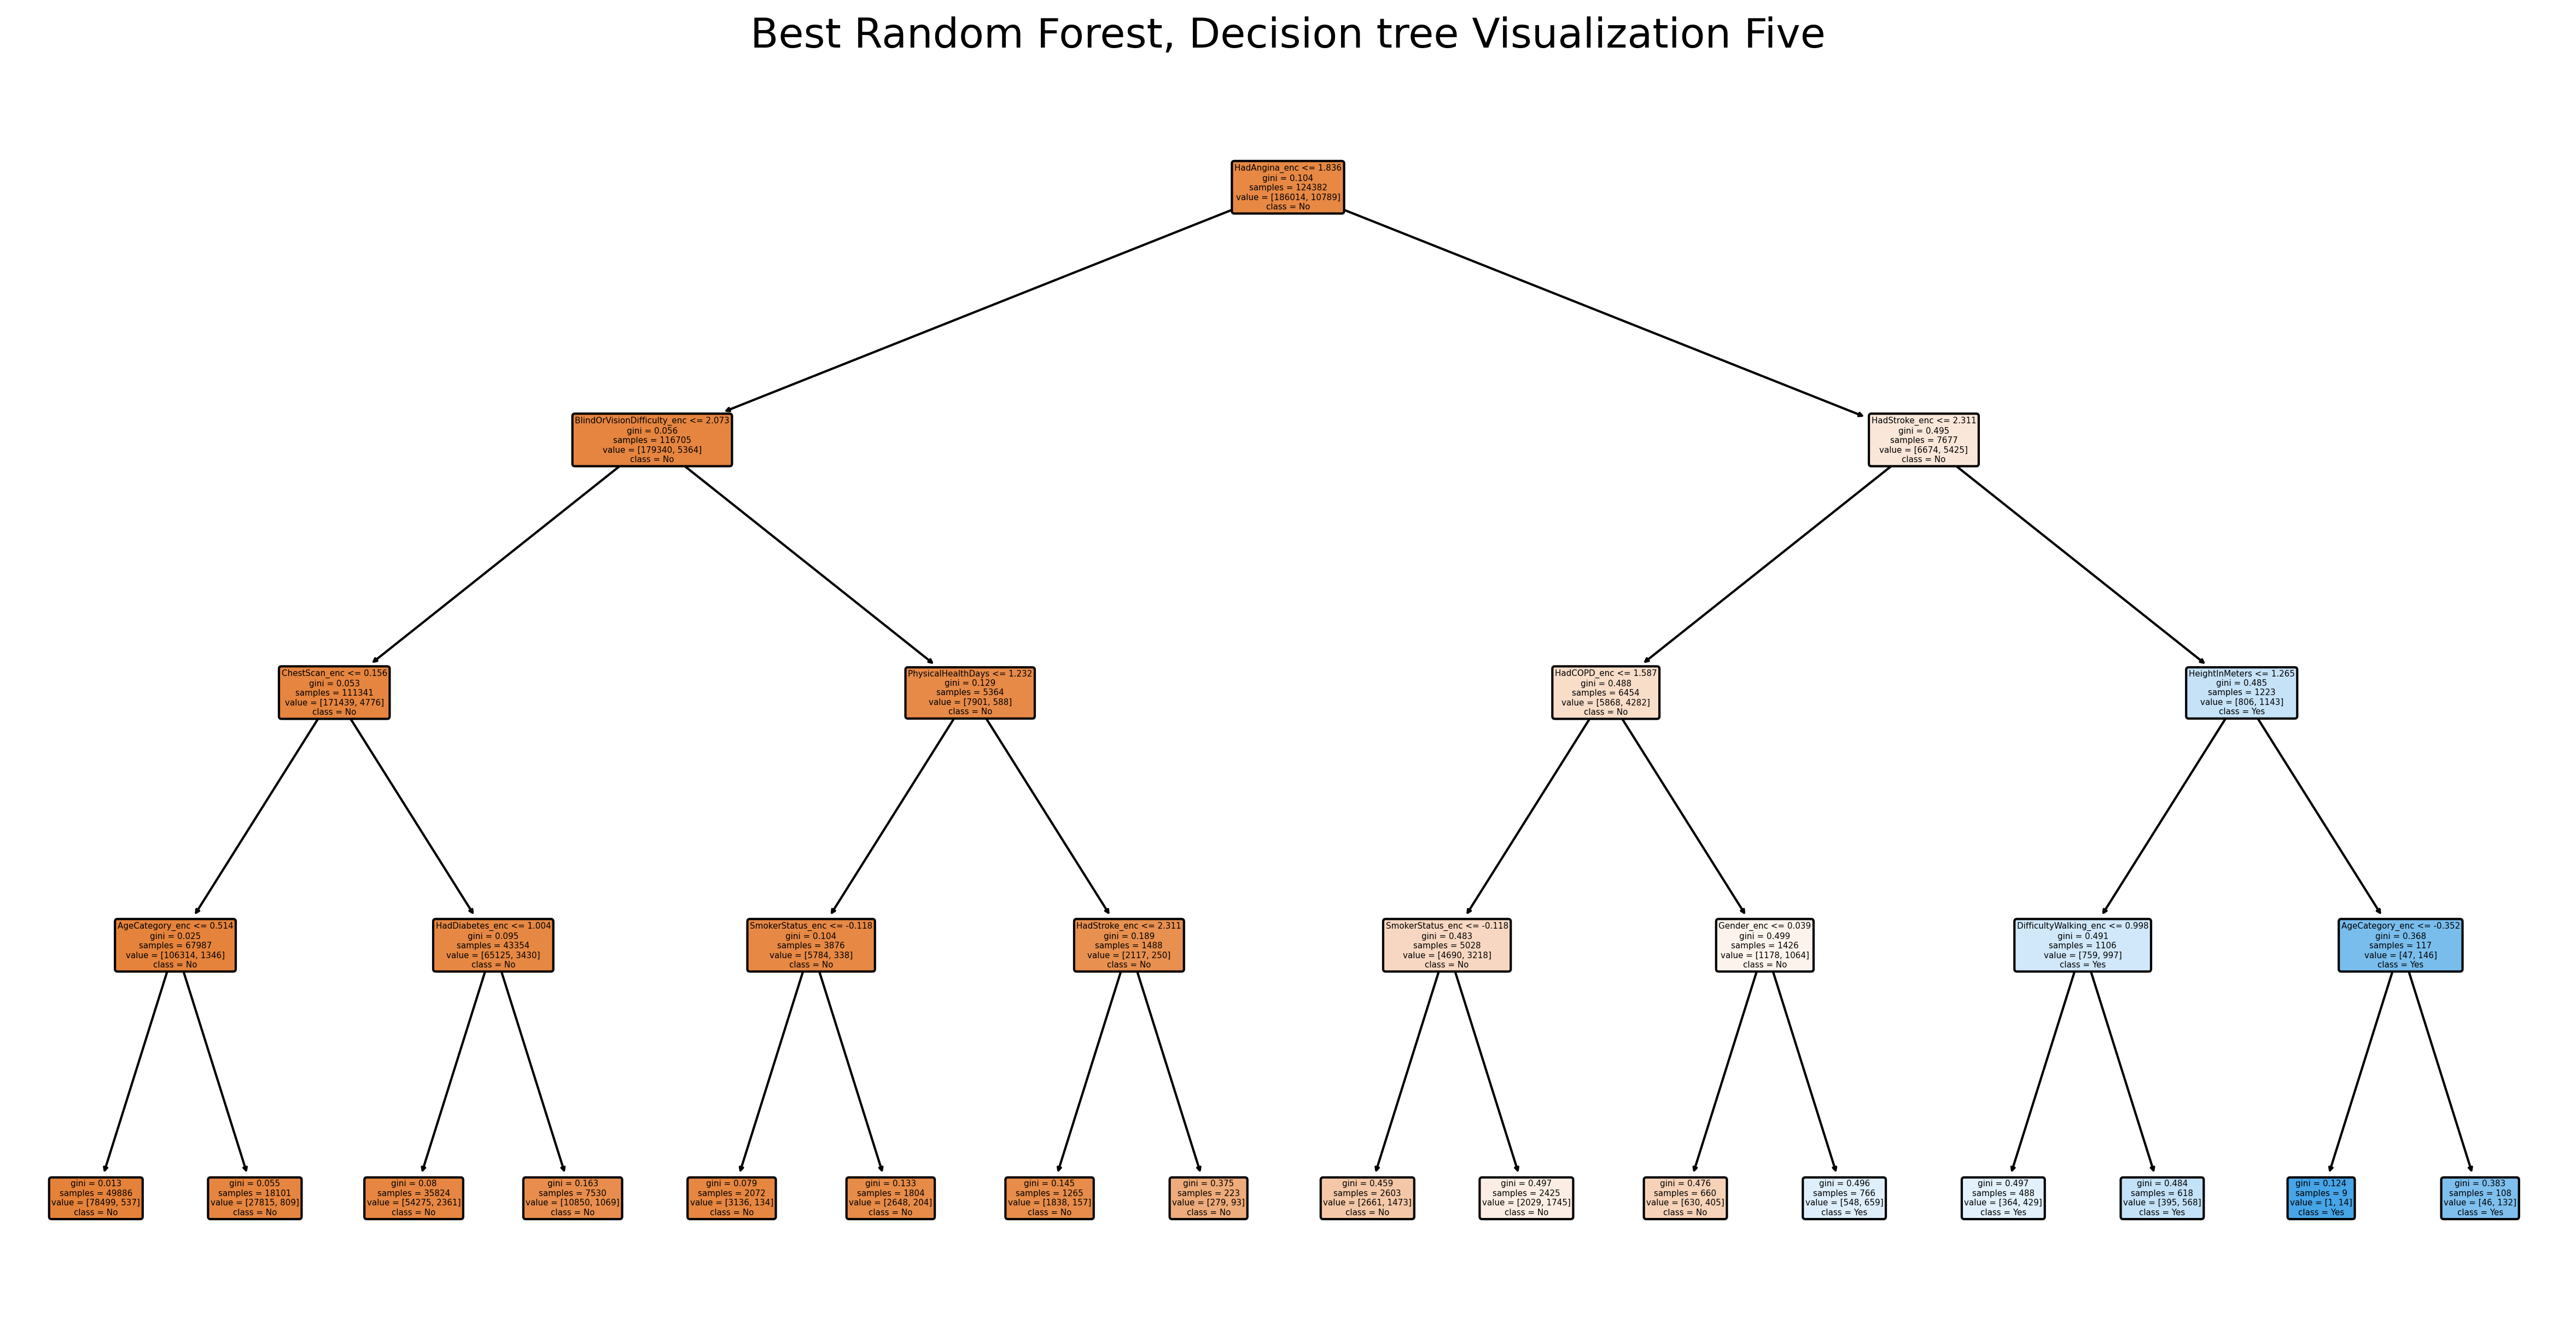

In [172]:
# Visualize dt Five

tree_idx = 4  # Index of the tree
plt.figure(figsize=(20, 10), dpi=300) # Size and dots per index, improves resolution
plot_tree(individual_trees[tree_idx],
          feature_names=X.columns,
          class_names=["No", "Yes"],
          filled=True,
          rounded=True)
plt.title('Best Random Forest, Decision tree Visualization Five')
plt.show()

As stated above random forests plot different features to see which is best to determine the target at the bottom the depth. I want to highlight visualization five. where a quarter of the tree is determined as being in the yes category. The path is angina, stroke and height in meters, difficulty walking or age. Everything in that quadrant of the fith decision tree is classed as Yes. Lets look at the feature importances to investigate what the data says for each decision tree in the best random forest esimator.

Feature Importances for the Best Tree 1
                          Feature  Importance
17                  HadStroke_enc    0.284320
16                  HadAngina_enc    0.251479
23               HadArthritis_enc    0.179964
14                HadDiabetes_enc    0.094237
8               GeneralHealth_enc    0.079654
7                      Gender_enc    0.058690
26          DifficultyWalking_enc    0.021955
22           HadKidneyDisease_enc    0.010083
30            AlcoholDrinkers_enc    0.007241
2                      SleepHours    0.005023
27  DifficultyDressingBathing_enc    0.003699
24        DeafOrHardOfHearing_enc    0.002166
33              PneumoVaxEver_enc    0.001489
28          DifficultyErrands_enc    0.000000
25    BlindOrVisionDifficulty_enc    0.000000
20                    HadCOPD_enc    0.000000
29                  ChestScan_enc    0.000000
31                 HIVTesting_enc    0.000000
32               FluVaxLast12_enc    0.000000
21      HadDepressiveDisorder_enc    0.0

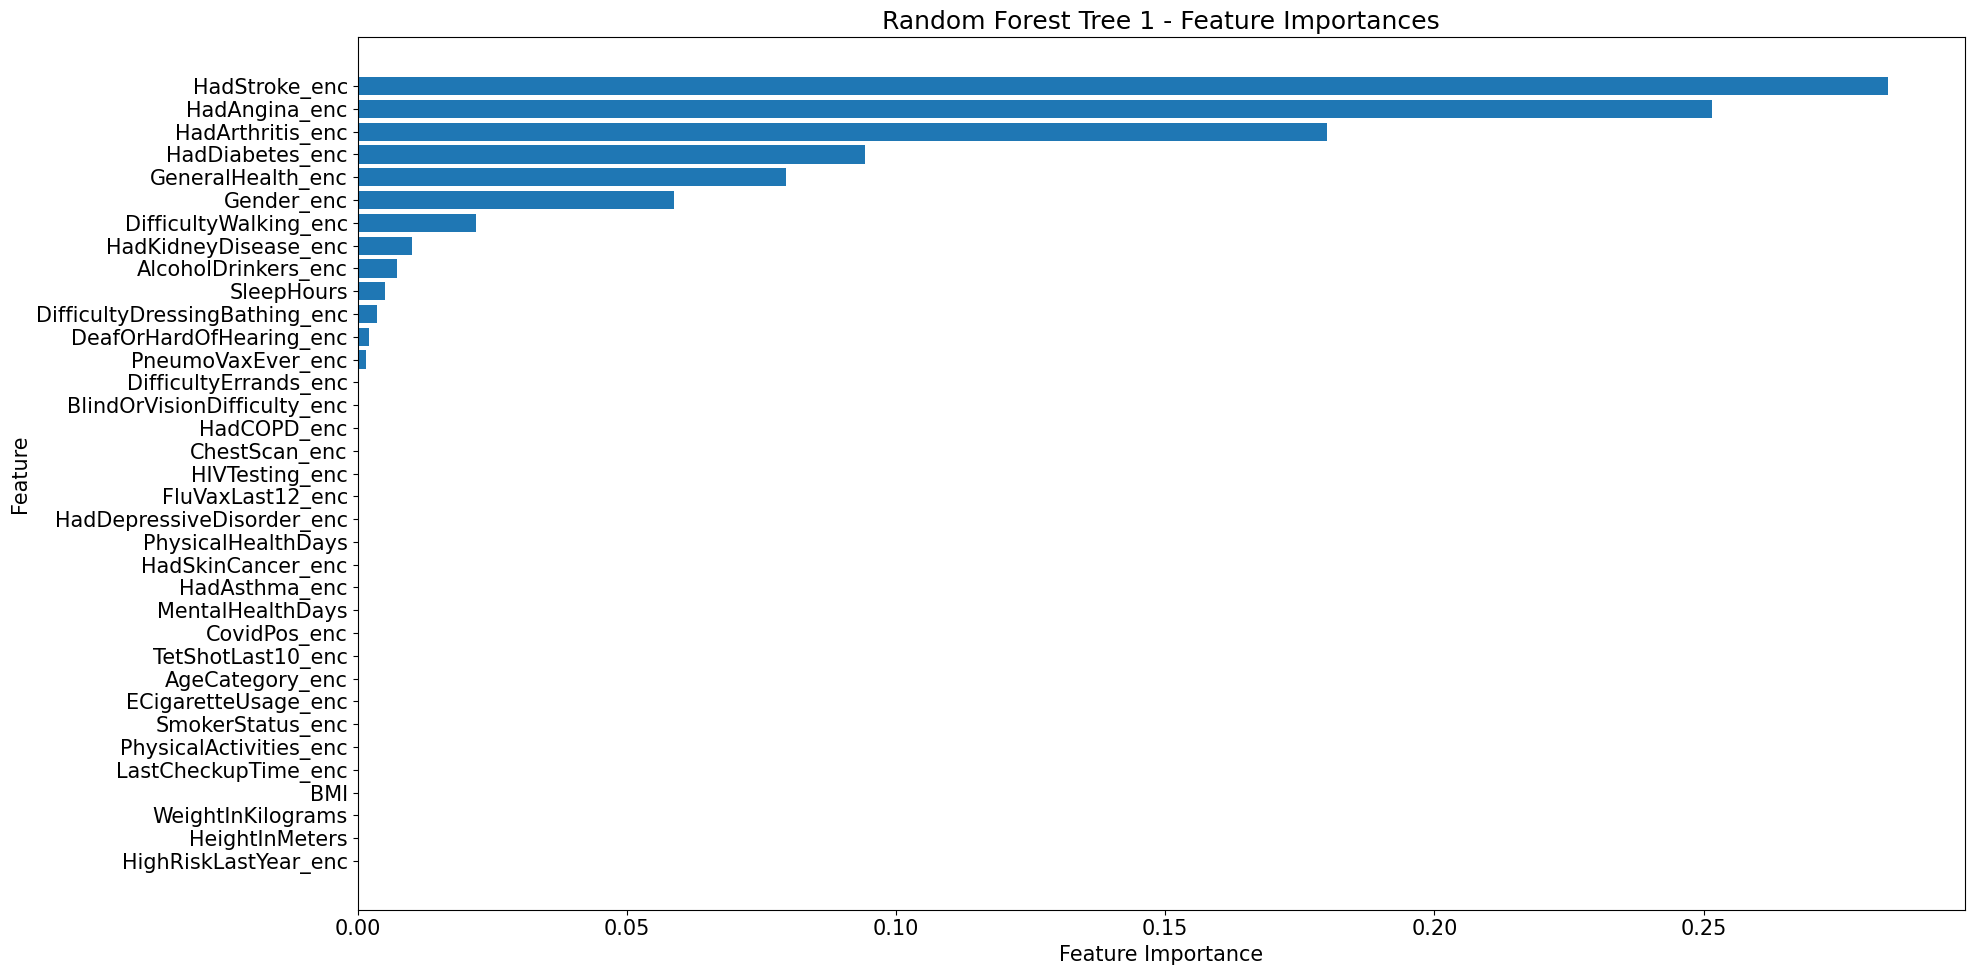

Feature Importances for the Best Tree 2
                          Feature  Importance
16                  HadAngina_enc    0.408337
8               GeneralHealth_enc    0.360416
14                HadDiabetes_enc    0.065108
7                      Gender_enc    0.039209
23               HadArthritis_enc    0.030677
22           HadKidneyDisease_enc    0.022188
0              PhysicalHealthDays    0.018126
10               SmokerStatus_enc    0.017630
12                AgeCategory_enc    0.013167
33              PneumoVaxEver_enc    0.011151
26          DifficultyWalking_enc    0.006166
1                MentalHealthDays    0.004503
18                  HadAsthma_enc    0.003322
29                  ChestScan_enc    0.000000
30            AlcoholDrinkers_enc    0.000000
28          DifficultyErrands_enc    0.000000
31                 HIVTesting_enc    0.000000
27  DifficultyDressingBathing_enc    0.000000
32               FluVaxLast12_enc    0.000000
25    BlindOrVisionDifficulty_enc    0.0

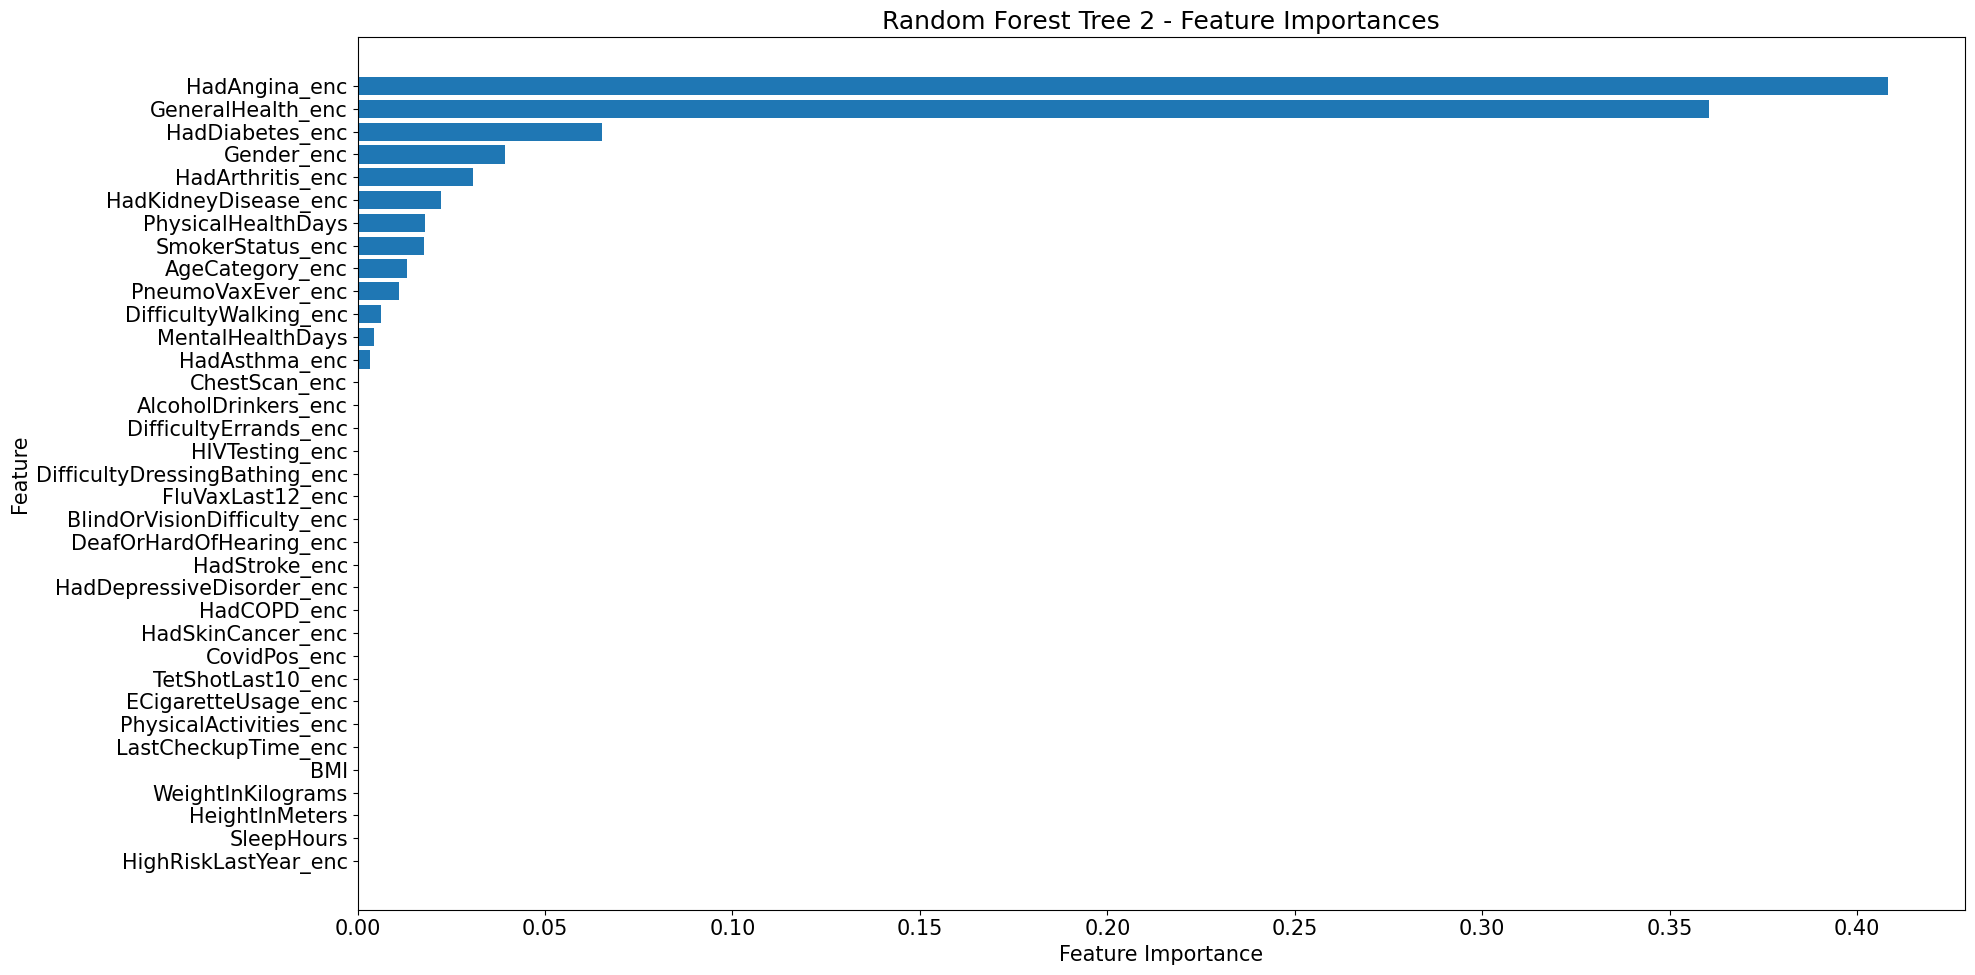

Feature Importances for the Best Tree 3
                          Feature  Importance
16                  HadAngina_enc    0.509949
12                AgeCategory_enc    0.218688
17                  HadStroke_enc    0.101654
20                    HadCOPD_enc    0.068376
3                  HeightInMeters    0.027769
7                      Gender_enc    0.020059
9          PhysicalActivities_enc    0.015285
0              PhysicalHealthDays    0.014055
29                  ChestScan_enc    0.012751
22           HadKidneyDisease_enc    0.011414
8               GeneralHealth_enc    0.000000
33              PneumoVaxEver_enc    0.000000
32               FluVaxLast12_enc    0.000000
31                 HIVTesting_enc    0.000000
30            AlcoholDrinkers_enc    0.000000
28          DifficultyErrands_enc    0.000000
27  DifficultyDressingBathing_enc    0.000000
26          DifficultyWalking_enc    0.000000
25    BlindOrVisionDifficulty_enc    0.000000
24        DeafOrHardOfHearing_enc    0.0

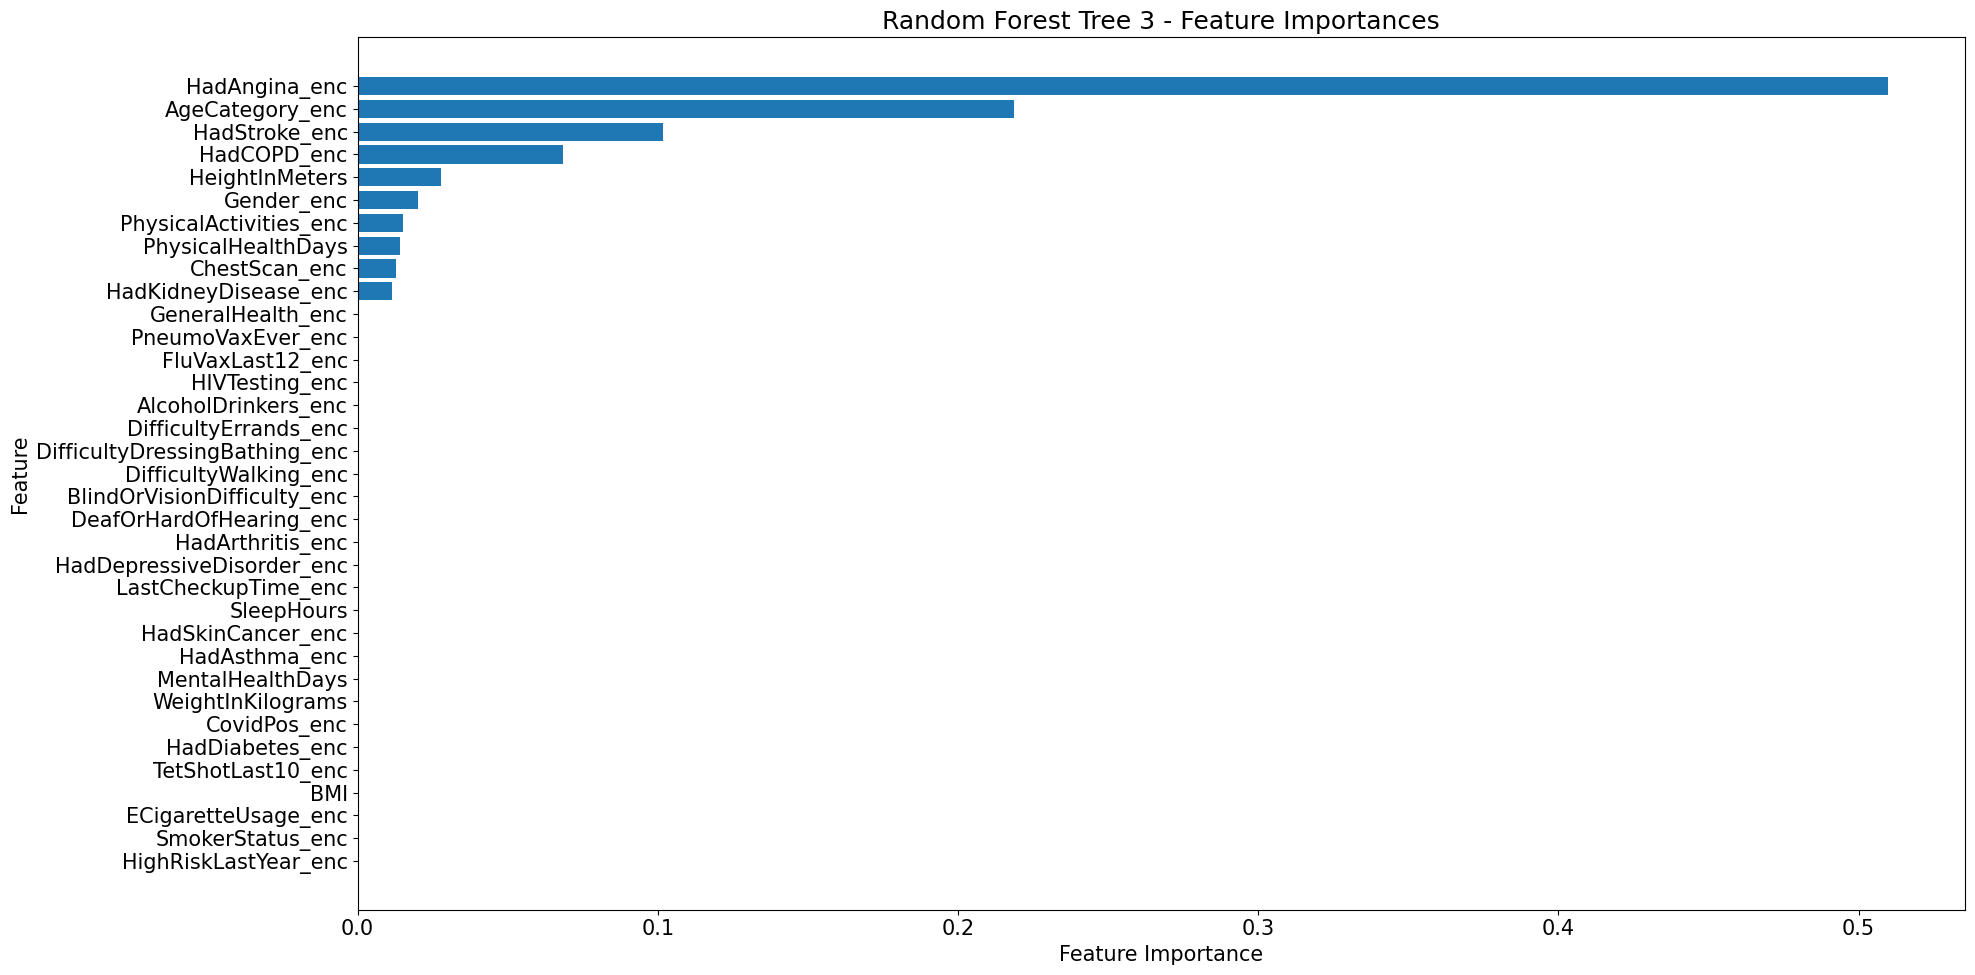

Feature Importances for the Best Tree 4
                          Feature  Importance
16                  HadAngina_enc    0.517284
8               GeneralHealth_enc    0.259537
12                AgeCategory_enc    0.113474
14                HadDiabetes_enc    0.056033
7                      Gender_enc    0.031502
29                  ChestScan_enc    0.012870
23               HadArthritis_enc    0.004697
33              PneumoVaxEver_enc    0.003855
27  DifficultyDressingBathing_enc    0.000749
22           HadKidneyDisease_enc    0.000000
24        DeafOrHardOfHearing_enc    0.000000
25    BlindOrVisionDifficulty_enc    0.000000
0              PhysicalHealthDays    0.000000
26          DifficultyWalking_enc    0.000000
20                    HadCOPD_enc    0.000000
28          DifficultyErrands_enc    0.000000
30            AlcoholDrinkers_enc    0.000000
31                 HIVTesting_enc    0.000000
32               FluVaxLast12_enc    0.000000
21      HadDepressiveDisorder_enc    0.0

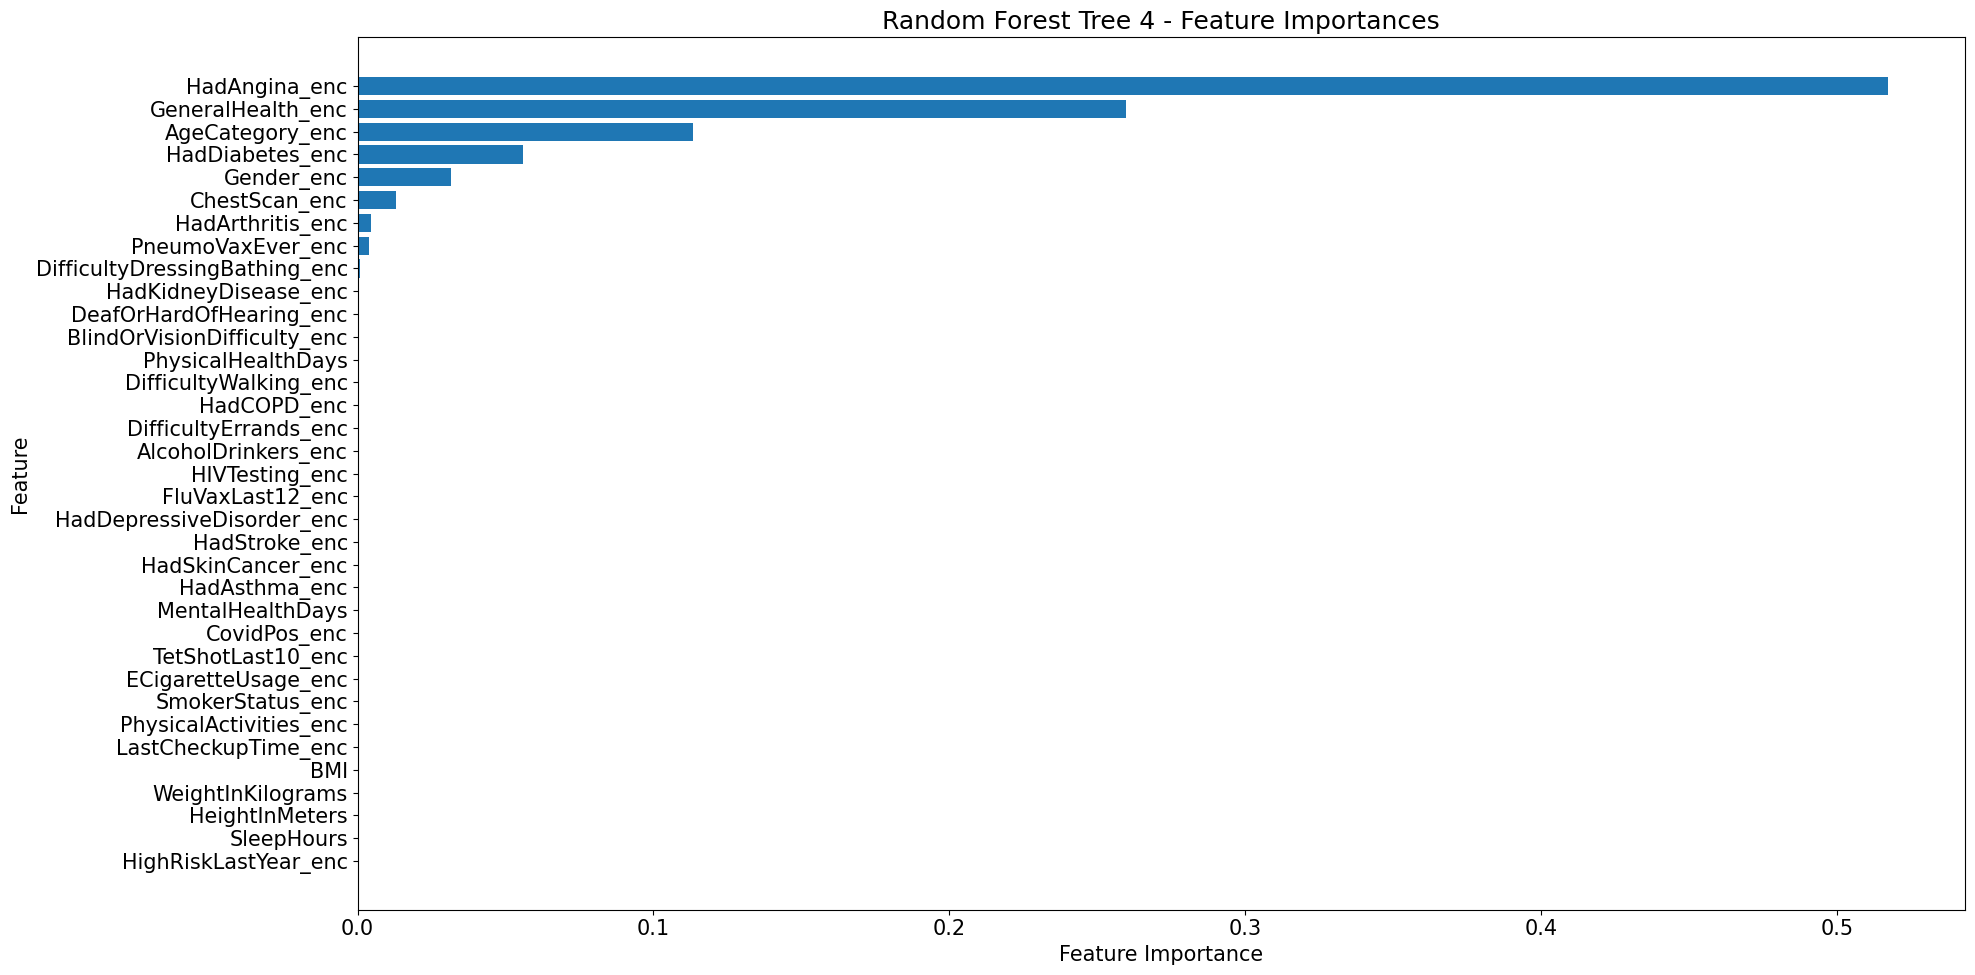

Feature Importances for the Best Tree 5
                          Feature  Importance
16                  HadAngina_enc    0.902275
29                  ChestScan_enc    0.026658
17                  HadStroke_enc    0.024170
10               SmokerStatus_enc    0.010671
14                HadDiabetes_enc    0.010252
25    BlindOrVisionDifficulty_enc    0.006506
7                      Gender_enc    0.006024
12                AgeCategory_enc    0.004606
20                    HadCOPD_enc    0.003612
3                  HeightInMeters    0.002798
0              PhysicalHealthDays    0.001960
26          DifficultyWalking_enc    0.000469
11            ECigaretteUsage_enc    0.000000
9          PhysicalActivities_enc    0.000000
33              PneumoVaxEver_enc    0.000000
32               FluVaxLast12_enc    0.000000
31                 HIVTesting_enc    0.000000
30            AlcoholDrinkers_enc    0.000000
2                      SleepHours    0.000000
28          DifficultyErrands_enc    0.0

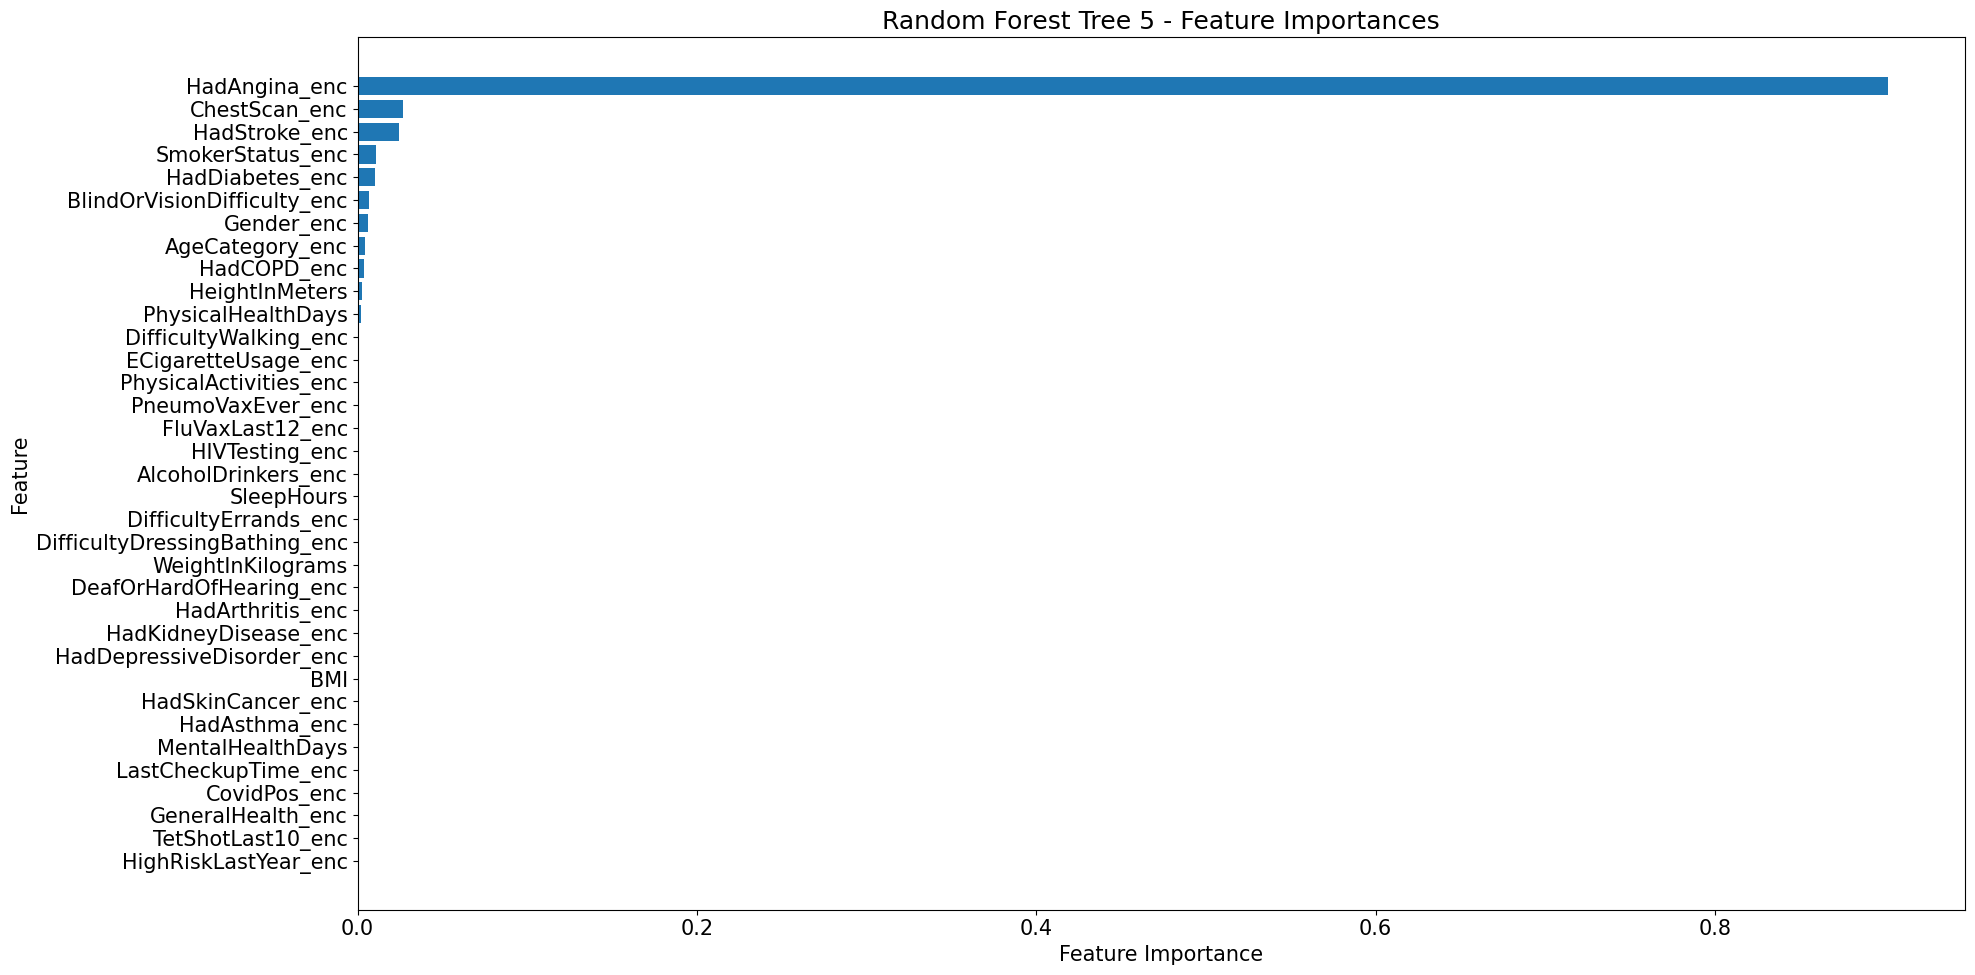

In [183]:
individual_trees_1 = best_rf_model_1.estimators_

for i, tree in enumerate(individual_trees_1[:5]):
    feature_importance_rf_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': tree.feature_importances_
    })

    feature_importance_rf_df = feature_importance_rf_df.sort_values(by='Importance', ascending=False)

    print(f'Feature Importances for the Best Tree {i+1}')
    print(feature_importance_rf_df)

    # Plot feature importances
    plt.figure(figsize=(20, 10))
    plt.barh(feature_importance_rf_df['Feature'], feature_importance_rf_df['Importance'], )
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.title(f'Random Forest Tree {i+1} - Feature Importances')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()


The difference in the feature importances for each tree in the ranom forest is explainable. but what is the most important is that in 4 out of 5 decision trees angina was the highest feature importance in a model based on randomness. That means the HadAngina feature is highly important to the target variable as we have both the logistic regression, decision tree and random forest models all categorising the HadAngina feature as the most important most of the time.

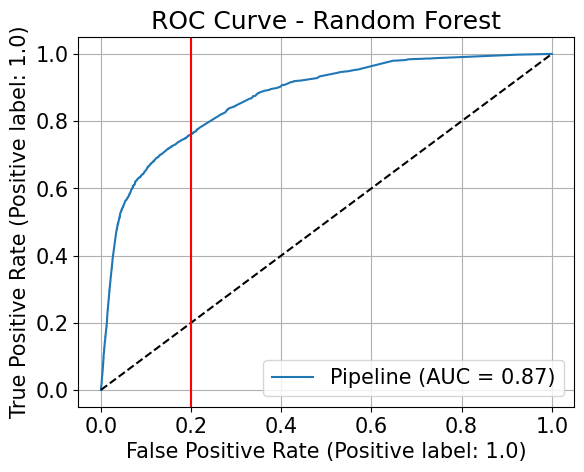

In [416]:
plot_roc_curve(best_rf1_model, X_test, y_test)
plt.plot([0,1], [0,1], color='black', linestyle='--')
plt.axvline(x=0.2, color='r', linestyle='-')
plt.title("ROC Curve - Random Forest")
plt.grid()
plt.show()

___

#### KNN

For classification, KNN assigns the most common class among these neighbors to the input. For regression, it averages the values of the 'k' nearest neighbors to predict the output. KNN is intuitive and easy to implement, requiring no explicit training phase, but can be computationally intensive and memory-hungry as it requires storing the entire training dataset and performing computations during prediction. Its performance heavily depends on the choice of 'k' and the distance metric, making it sensitive to the scale and distribution of the data.

In [140]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [142]:
# Instantiate the model & fit it to our data
KNN_model1 = KNeighborsClassifier(n_neighbors= 2)

KNN_model1.fit(X_train_scaled, y_train)

# Score the model on the test set
test_predictions1 = KNN_model1.predict(X_test)
test_accuracy1 = accuracy_score(test_predictions1, y_test)
print(f"Test set accuracy: {test_accuracy1}")

#PlotBoundaries(KNN_model1, X, y, plotsize=(10,7))

/opt/anaconda3/envs/capstone/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Test set accuracy: 0.9453872888762423


In [143]:
y_train_pred_knn = KNN_model1.predict(X_train_scaled)
y_test_pred_knn = KNN_model1.predict(X_test_scaled)

/opt/anaconda3/envs/capstone/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/anaconda3/envs/capstone/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no long

In [144]:
# Generate and print the classification report for training data
print("Classification Report - Training Data")
print(classification_report(y_train, y_train_pred_knn))

# Generate and print the classification report for test data
print("Classification Report - Test Data")
print(classification_report(y_test, y_test_pred_knn))

Classification Report - Training Data
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98    186055
         1.0       1.00      0.27      0.43     10748

    accuracy                           0.96    196803
   macro avg       0.98      0.64      0.70    196803
weighted avg       0.96      0.96      0.95    196803

Classification Report - Test Data
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97     46514
         1.0       0.45      0.12      0.18      2687

    accuracy                           0.94     49201
   macro avg       0.70      0.55      0.58     49201
weighted avg       0.92      0.94      0.93     49201



KNN metrics on the test data is 12% on the recall metric which is the lowest of all models so far.

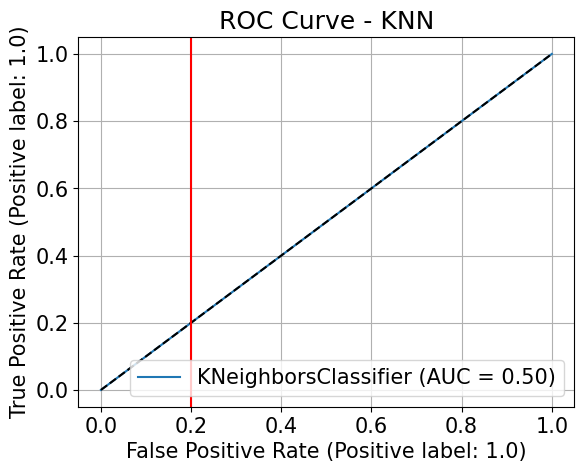

In [417]:
plot_roc_curve(KNN_model1, X_test, y_test)
plt.plot([0,1], [0,1], color='black', linestyle='--')
plt.axvline(x=0.2, color='r', linestyle='-')
plt.title("ROC Curve - KNN")
plt.grid()
plt.show()

___

#### XGBoost

XGBoost (Extreme Gradient Boosting) is a powerful and efficient machine learning algorithm that builds an ensemble of decision trees through an iterative process of boosting. Unlike traditional boosting methods, XGBoost uses advanced techniques such as gradient boosting with a second-order Taylor approximation to optimize the loss function and regularization to prevent overfitting. It focuses on improving the accuracy of predictions by sequentially adding trees that correct the errors of the previous trees, weighted by their gradients. XGBoost is highly efficient due to its parallelizable tree construction, handling of sparse data, and features for tree pruning and regularization.

In [6]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# Instantiate
xgb_model1 = XGBClassifier()

# Fit
xgb_model1.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [8]:
y_train_pred_xgb = xgb_model1.predict(X_train_scaled)
y_test_pred_xgb = xgb_model1.predict(X_test_scaled)

In [9]:
# Generate and print the classification report for training data
print("Classification Report - Training Data")
print(classification_report(y_train, y_train_pred_xgb))

# Generate and print the classification report for test data
print("Classification Report - Test Data")
print(classification_report(y_test, y_test_pred_xgb))

Classification Report - Training Data
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    186055
         1.0       0.77      0.35      0.48     10748

    accuracy                           0.96    196803
   macro avg       0.87      0.67      0.73    196803
weighted avg       0.95      0.96      0.95    196803

Classification Report - Test Data
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97     46514
         1.0       0.55      0.24      0.33      2687

    accuracy                           0.95     49201
   macro avg       0.75      0.61      0.65     49201
weighted avg       0.94      0.95      0.94     49201



With a recall of 35% without any additions like optimizations or threshold tuning this is the best base model I have so far. Which should be true as the model compounds decision trees to make the best model through pruning.

Confusion Matrix - Training Data
[[184940   1115]
 [  7012   3736]]


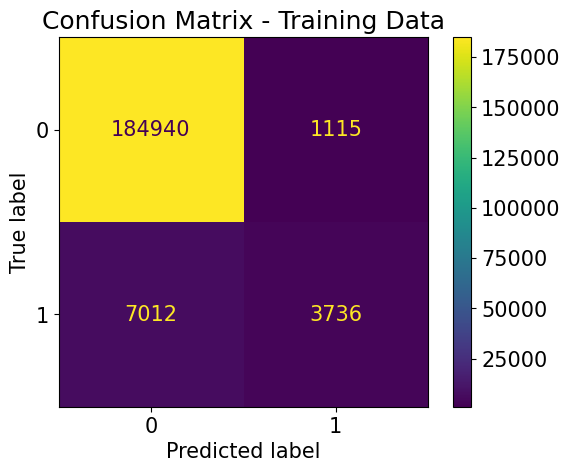

In [298]:
# Train Data Confusion Matrix
cm_train_xgb = confusion_matrix(y_train, y_train_pred_xgb)
print("Confusion Matrix - Training Data")
print(cm_train_xgb)
ConfusionMatrixDisplay(confusion_matrix=cm_train_xgb).plot()
plt.title("Confusion Matrix - Training Data")
plt.show()

Confusion Matrix - Test Data
[[45987   527]
 [ 2043   644]]


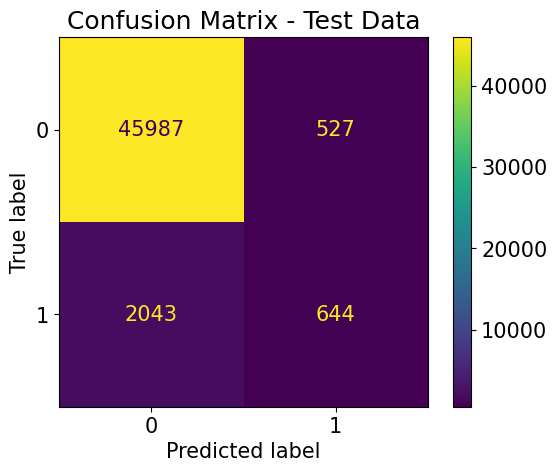

In [299]:
# Test Data Confusion Matrix
cm_test_xgb = confusion_matrix(y_test, y_test_pred_xgb)
print("Confusion Matrix - Test Data")
print(cm_test_xgb)
ConfusionMatrixDisplay(confusion_matrix=cm_test_xgb).plot()
plt.title("Confusion Matrix - Test Data")
plt.show()

Unfortunatly the test confusion matrixes show not much of a difference in classification.

                          Feature  Importance
16                  HadAngina_enc    0.539721
29                  ChestScan_enc    0.072506
17                  HadStroke_enc    0.054277
7                      Gender_enc    0.029847
12                AgeCategory_enc    0.028162
8               GeneralHealth_enc    0.026866
26          DifficultyWalking_enc    0.018835
14                HadDiabetes_enc    0.018649
10               SmokerStatus_enc    0.012852
30            AlcoholDrinkers_enc    0.011226
20                    HadCOPD_enc    0.010375
25    BlindOrVisionDifficulty_enc    0.009098
19              HadSkinCancer_enc    0.008226
28          DifficultyErrands_enc    0.008134
24        DeafOrHardOfHearing_enc    0.008007
22           HadKidneyDisease_enc    0.007850
18                  HadAsthma_enc    0.007832
23               HadArthritis_enc    0.007645
2                      SleepHours    0.007625
34           HighRiskLastYear_enc    0.007464
31                 HIVTesting_enc 

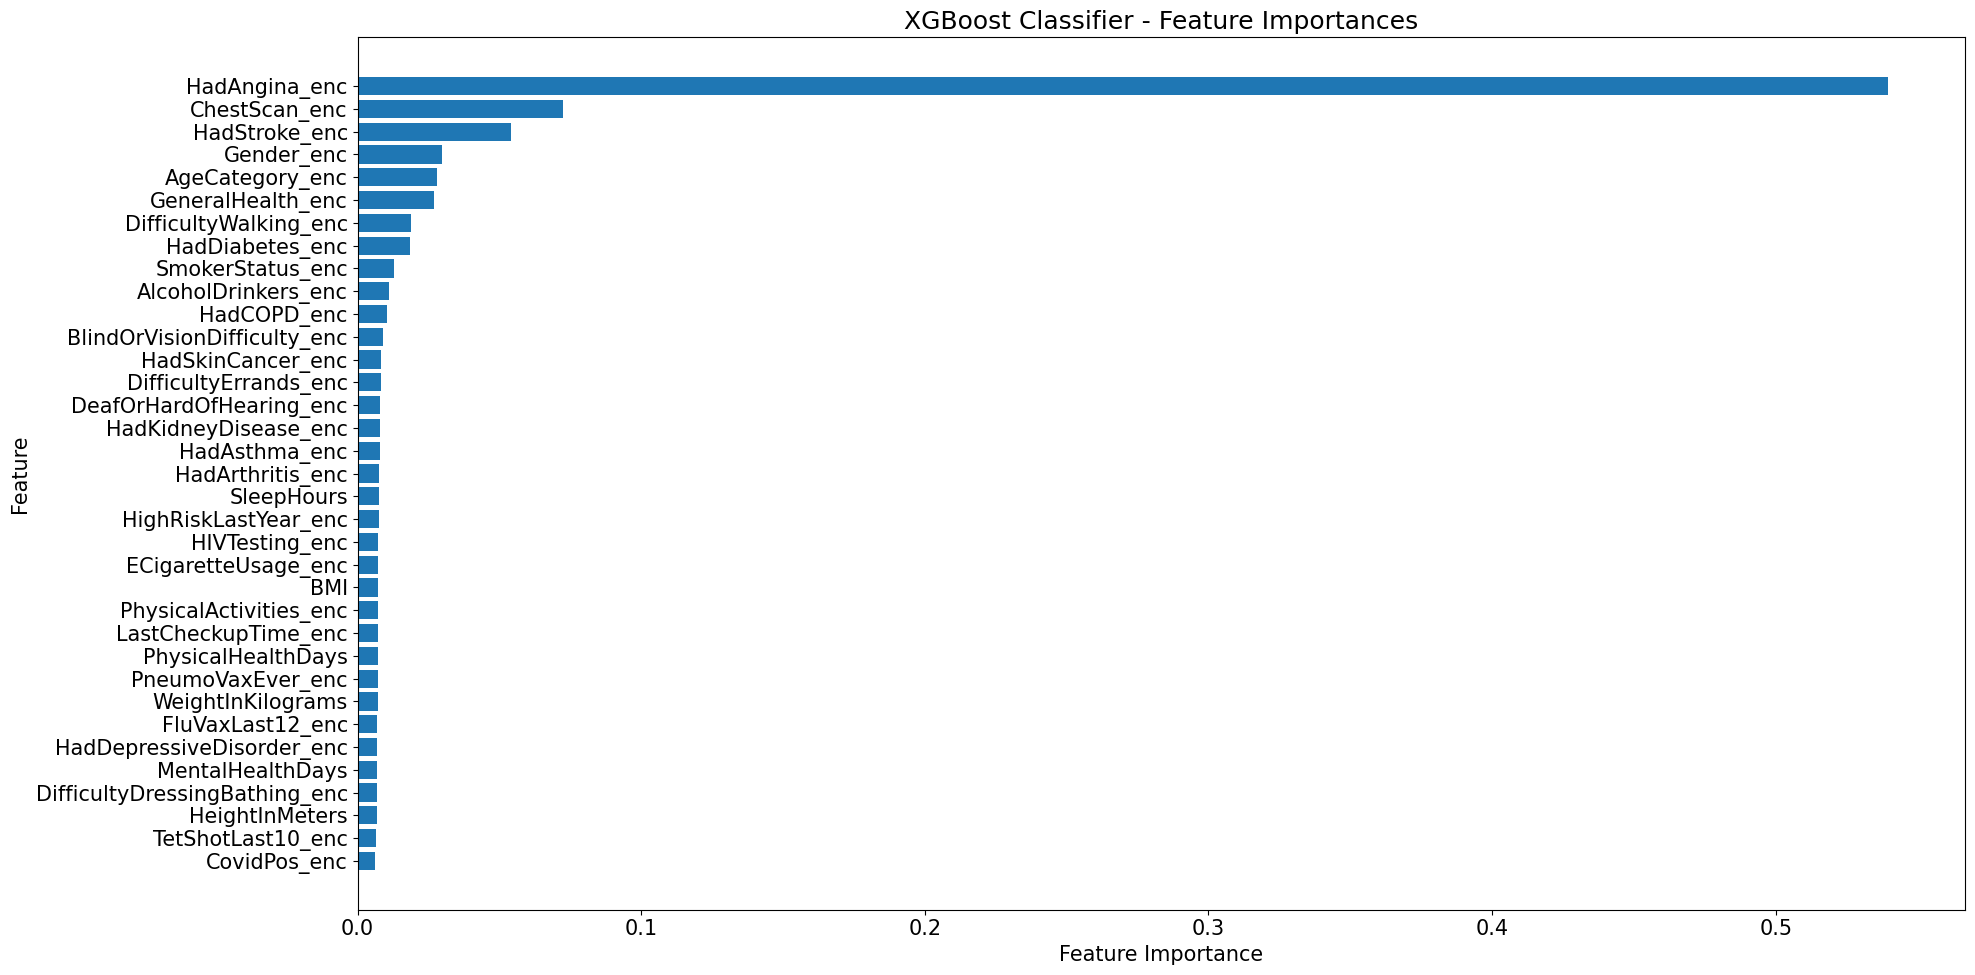

In [300]:
# Extract feature importances
feature_importances = xgb_model1.feature_importances_

# Get feature names
feature_names = X_train.columns  # Replace with your actual feature names

# Create a DataFrame of feature importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the sorted DataFrame
print(feature_importance_df)

# Plot feature importances
plt.figure(figsize=(20, 10))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('XGBoost Classifier - Feature Importances')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Just like most of the previous models made withing this project this XGBoost model agrees with the rest and defines the HadAngina feature as the most important feature.

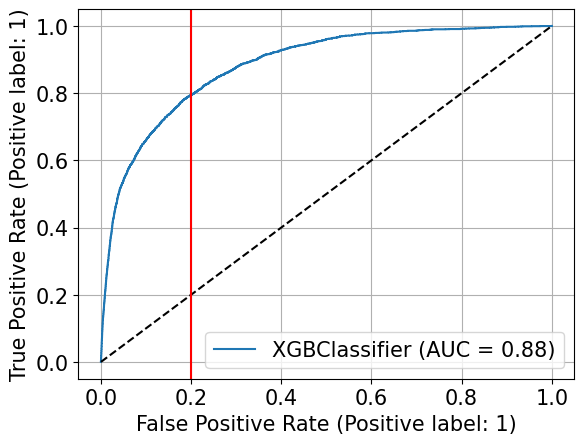

In [303]:
plot_roc_curve(xgb_model1, X_test_scaled, y_test)
plt.plot([0,1], [0,1], color='black', linestyle='--')
plt.axvline(x=0.2, color='r', linestyle='-')
plt.grid()
plt.show()

XGBoost Change in Threshold

I will now adjust the threshold on the XGBoost model to obtain a higher recall score without sacraficing too much precision.

Classification Report - Train (Threshold = 0.065)
              precision    recall  f1-score   support

         0.0       0.99      0.86      0.92    186055
         1.0       0.26      0.84      0.39     10748

    accuracy                           0.86    196803
   macro avg       0.62      0.85      0.66    196803
weighted avg       0.95      0.86      0.89    196803

Classification Report - Test (Threshold = 0.065)
              precision    recall  f1-score   support

         0.0       0.98      0.85      0.91     46514
         1.0       0.22      0.73      0.34      2687

    accuracy                           0.85     49201
   macro avg       0.60      0.79      0.63     49201
weighted avg       0.94      0.85      0.88     49201



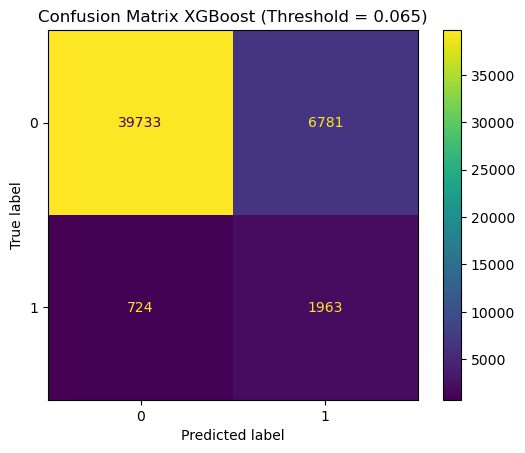

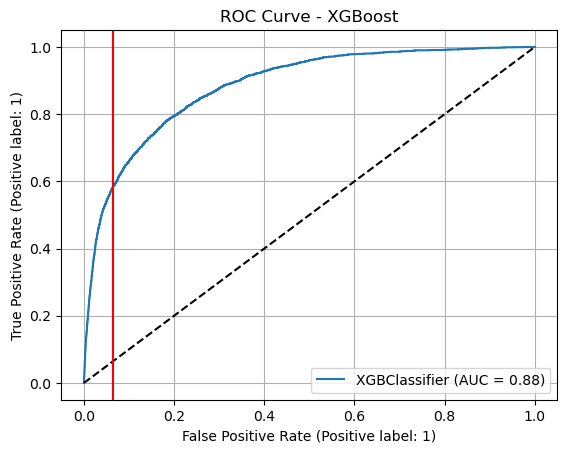

In [14]:
# Predict probabilities for the positive class
y_prob_train_final_xgb = xgb_model1.predict_proba(X_train_scaled)[:, 1]
y_prob_test_final_xgb = xgb_model1.predict_proba(X_test_scaled)[:, 1]

# Set a new threshold
threshold = 0.065

# Classify based on the new threshold
y_pred_train_new_threshold = (y_prob_train_final_xgb >= threshold).astype(int)
y_pred_test_new_threshold = (y_prob_test_final_xgb >= threshold).astype(int)

# Classification report - Train
print(f'Classification Report - Train (Threshold = {threshold})')
print(classification_report(y_train, y_pred_train_new_threshold))

# Classification report - Test
print(f'Classification Report - Test (Threshold = {threshold})')
print(classification_report(y_test, y_pred_test_new_threshold))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_test_new_threshold)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(values_format='')
plt.title(f'Confusion Matrix XGBoost (Threshold = {threshold})')
plt.show()

# ROC curve
plot_roc_curve(xgb_model1, X_test_scaled, y_test)
plt.plot([0,1], [0,1], color='black', linestyle='--')
plt.axvline(x=0.065, color='r', linestyle='-')
plt.title("ROC Curve - XGBoost")
plt.grid()
plt.show()

The threshold adjusted XGBoost model is now the highest recall model within the project. Show with the confusion matrix if this was a real world situation around 9000 people would be flagged with the HAI early detection system and around 2000 would optimally gone through the medical system and have been rightfully saved from a traumatic experience.

___

#### SMOTE

SMOTENC (Synthetic Minority Over-sampling Technique for Nominal and Continuous) is an extension of the SMOTE algorithm designed to handle imbalanced datasets with both categorical (nominal) and continuous features. Traditional SMOTE generates synthetic samples by interpolating between existing minority class instances, but it works primarily with continuous data. SMOTENC, on the other hand, can process datasets containing a mix of categorical and continuous variables. It achieves this by applying SMOTE to the continuous features while using a k-nearest neighbors approach to determine the categories for the synthetic samples. This ensures that the generated synthetic instances respect the nature of both types of data, enhancing the balance of the dataset without distorting the categorical variables. By effectively increasing the representation of the minority class, SMOTENC helps improve the performance of machine learning models on imbalanced datasets, leading to more robust and fair predictions.

Original Target Distribution

Firstly smote needs to happen on the HadHeartAttack feature to address the columns class imbalence stated below:

In [315]:
# Original Class Distribution
print('The absolute class distribution is:', f'\n{y.value_counts()}')
print(f'\nThe relative (%) class distribution is: \n{y.value_counts(normalize=True).round(2)*100}')

The absolute class distribution is: 
HadHeartAttack_enc
0.0    232569
1.0     13435
Name: count, dtype: int64

The relative (%) class distribution is: 
HadHeartAttack_enc
0.0    95.0
1.0     5.0
Name: proportion, dtype: float64


SMOTE & New Class Distribution

In [318]:
heart_attack_enc_m.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246004 entries, 0 to 246012
Data columns (total 36 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   PhysicalHealthDays             246004 non-null  float64
 1   MentalHealthDays               246004 non-null  float64
 2   SleepHours                     246004 non-null  float64
 3   HeightInMeters                 246004 non-null  float64
 4   WeightInKilograms              246004 non-null  float64
 5   BMI                            246004 non-null  float64
 6   LastCheckupTime_enc            246004 non-null  float64
 7   Gender_enc                     246004 non-null  float64
 8   GeneralHealth_enc              246004 non-null  float64
 9   PhysicalActivities_enc         246004 non-null  float64
 10  SmokerStatus_enc               246004 non-null  float64
 11  ECigaretteUsage_enc            246004 non-null  float64
 12  AgeCategory_enc                2460

In [16]:
#SMOTE on the 
smote = SMOTE(random_state=12)

X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [325]:
# check what SMOTE has done

print('Original class distribution')
display(pd.Series(y_train).value_counts().sort_index())

print('\nResampled class distribution')
display(pd.Series(y_train_sm).value_counts().sort_index())

Original class distribution


HadHeartAttack_enc
0.0    186055
1.0     10748
Name: count, dtype: int64


Resampled class distribution


HadHeartAttack_enc
0.0    186055
1.0    186055
Name: count, dtype: int64

In [326]:
heart_attack_enc_m.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246004 entries, 0 to 246012
Data columns (total 36 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   PhysicalHealthDays             246004 non-null  float64
 1   MentalHealthDays               246004 non-null  float64
 2   SleepHours                     246004 non-null  float64
 3   HeightInMeters                 246004 non-null  float64
 4   WeightInKilograms              246004 non-null  float64
 5   BMI                            246004 non-null  float64
 6   LastCheckupTime_enc            246004 non-null  float64
 7   Gender_enc                     246004 non-null  float64
 8   GeneralHealth_enc              246004 non-null  float64
 9   PhysicalActivities_enc         246004 non-null  float64
 10  SmokerStatus_enc               246004 non-null  float64
 11  ECigaretteUsage_enc            246004 non-null  float64
 12  AgeCategory_enc                2460

In [17]:
# scale the sampled train data and the unsampled test data
ss_sm = StandardScaler().fit(X_train_sm)
X_train_ss_sm = ss_sm.transform(X_train_sm)
X_test_ss_sm = ss_sm.transform(X_test)

In [18]:
# instantiate and fit to scaled & sampled training data
logreg_model_sm = LogisticRegression(max_iter=1000, C=0.1, penalty='l1', solver='saga', random_state=12).fit(X_train_ss_sm, y_train_sm)

In [19]:
# Creating the train and test predictions

y_train_ss_sm_pred = logreg_model_sm.predict(X_train_ss_sm)
y_test_ss_sm_pred = logreg_model_sm.predict(X_test_ss_sm)

In [20]:
print(f'Accuracy score: {logreg_model_sm.score(X_test_ss_sm,y_test)*100:0.1f}%')
print(f'Recall score: {recall_score(y_test,y_test_ss_sm_pred)*100:0.1f}%')
print(f'Precision score: {precision_score(y_test,y_test_ss_sm_pred)*100:0.1f}%')
print(f'F1 score: {f1_score(y_test,y_test_ss_sm_pred)*100:0.1f}%')

Accuracy score: 85.4%
Recall score: 73.0%
Precision score: 23.3%
F1 score: 35.4%


In [21]:
# Classification Report (accuracy, precision, recall, f1)
report_test = classification_report(y_test, y_test_ss_sm_pred)
print(report_test)

              precision    recall  f1-score   support

         0.0       0.98      0.86      0.92     46514
         1.0       0.23      0.73      0.35      2687

    accuracy                           0.85     49201
   macro avg       0.61      0.80      0.64     49201
weighted avg       0.94      0.85      0.89     49201



Confusion Matrix - Train:
[[40071  6443]
 [  726  1961]]


<Figure size 800x600 with 0 Axes>

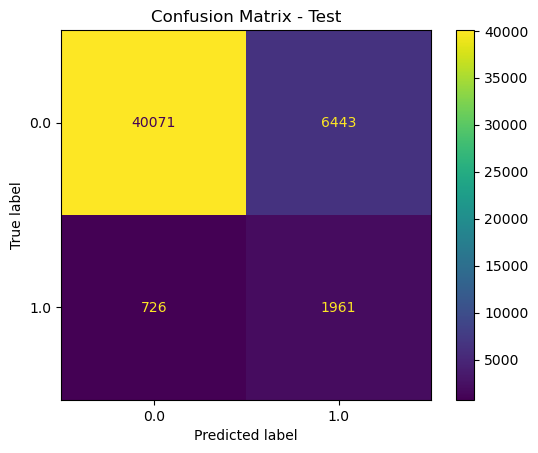

In [23]:
# Generate confusion matrix
cm_lr_sm_test = confusion_matrix(y_test, y_test_ss_sm_pred)
print("Confusion Matrix - Train:")
print(cm_lr_sm_test)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr_sm_test, display_labels=logreg_model_sm.classes_)
plt.figure(figsize=(8, 6))
disp.plot(values_format='')
plt.title('Confusion Matrix - Test')
plt.show()


The confusion matrix shows that the model is slightly by 1% in precision, better than the threshold adjusted XGBoost.

In [377]:
logreg_coeff_sm = pd.DataFrame(logreg_model_sm.coef_, columns= X_train.columns, index= ["Coeff"]).T
logreg_coeff_sm.sort_values(by= "Coeff", ascending= False)
print(logreg_coeff_sm.sort_values(by="Coeff", ascending=False))

                                  Coeff
HadAngina_enc                  1.420750
AgeCategory_enc                0.681469
Gender_enc                     0.402025
ChestScan_enc                  0.343690
HadStroke_enc                  0.320382
SmokerStatus_enc               0.167105
HadDiabetes_enc                0.151152
WeightInKilograms              0.146805
MentalHealthDays               0.048938
DifficultyErrands_enc          0.038979
BlindOrVisionDifficulty_enc    0.036385
HadCOPD_enc                    0.030445
HadArthritis_enc               0.029112
PneumoVaxEver_enc              0.027838
PhysicalActivities_enc         0.020078
HadKidneyDisease_enc           0.016692
DifficultyWalking_enc          0.016347
HadAsthma_enc                  0.013844
HighRiskLastYear_enc           0.004128
HadDepressiveDisorder_enc      0.000155
HIVTesting_enc                -0.008796
DeafOrHardOfHearing_enc       -0.011449
TetShotLast10_enc             -0.012856
ECigaretteUsage_enc           -0.014912


The coefficients seem very high especially the HadAngina feature but this may be due to smotes oversampling technique exastrabating the feature coefficients. If the order is observed, the most important features do not change compared with the previous models feature coefficients. angina is still the most important determining factor with age the followed by gender. The features that help with not getting a heart attack remains relativly unchanged with height in meteres being the newcommer to the lower 3 but this could be due to many factors.

___

**Logistic Regression - HadAngina Dropped**

Angina is a condition where not enough blood flows to the heart muscle causing an increase in heart related diseases, It is highly correlated with heart attack because if there is not enough nutrients to the heart muscle, whats next is usually a heart attack. In a early detection / early diagnosis tool like the one the project is building, a potential patient will not need to be on this system if they had angina as they would already be monitored. With that said I decided to try a last model which has the HadAngina feature removed from the data set to see what the top coefficients were.

Copying the encoded dataframe:

In [378]:
heart_attack_enc_m_HAR = heart_attack_enc_m.copy()

Dropping the HadAngina column:

In [382]:
heart_attack_enc_m_HAR = heart_attack_enc_m_HAR.drop(columns=['HadAngina_enc'])

Checking the data to see if the column had been dropped:

In [383]:
heart_attack_enc_m_HAR.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246004 entries, 0 to 246012
Data columns (total 35 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   PhysicalHealthDays             246004 non-null  float64
 1   MentalHealthDays               246004 non-null  float64
 2   SleepHours                     246004 non-null  float64
 3   HeightInMeters                 246004 non-null  float64
 4   WeightInKilograms              246004 non-null  float64
 5   BMI                            246004 non-null  float64
 6   LastCheckupTime_enc            246004 non-null  float64
 7   Gender_enc                     246004 non-null  float64
 8   GeneralHealth_enc              246004 non-null  float64
 9   PhysicalActivities_enc         246004 non-null  float64
 10  SmokerStatus_enc               246004 non-null  float64
 11  ECigaretteUsage_enc            246004 non-null  float64
 12  AgeCategory_enc                2460

**Saving the new dataframe:**

In [445]:
print("\033[1mSaving the HadAngina Removed Dataframe:\033[0m\n")

try:
    heart_attack_enc_m_HAR.to_csv('heart_attack_enc_m_HAR.csv')
    print("Data saved successfully.")
except:
    print("ERROR: The data has NOT been saved.")

Saving the HadAngina Removed Dataframe:

Data saved successfully.


In [25]:
heart_attack_enc_m_HAR = pd.read_csv('../data/heart_attack_enc_m_HAR.csv')

**Re splitting the data:**

In [26]:
#Split into X and y

#Data
X_har = heart_attack_enc_m_HAR.drop(columns='HadHeartAttack_enc', axis=1)

# Target
y_har = heart_attack_enc_m_HAR['HadHeartAttack_enc']

#Splitting into the train and test sets to be used in the machine learning models:
# Spliting into train and Test (80% : 20%)
X_train_har, X_test_har, y_train_har, y_test_har = train_test_split(X_har, y_har, test_size = 0.2, random_state=12, stratify= y_har)

#Splitting the data further to a train and validation set to also be used in models:
# Splitting the remainder in two, train and validation sets (Of the 80% = 80% : 20%)
X_train_subset_har, X_val_har, y_train_subset_har, y_val_har = train_test_split(X_train_har, y_train_har, test_size = 0.2,random_state=12, stratify= y_train_har) # Always use the same random states.

In [27]:
# Pre-processing - scale the data
scaler = StandardScaler()
scaler.fit(X_train_har)
X_train_har_scaled = scaler.transform(X_train_har)
X_val_har_scaled = scaler.transform(X_val_har)
X_test_har_scaled = scaler.transform(X_test_har)

**Had Angina Removed Logistic Regression**

In [28]:
# Optimise with the best Parameters from the best logreg model

lr_model_HAR = LogisticRegression(max_iter=1000, C=0.1, penalty='l1', solver='saga', random_state=12)

lr_model_HAR.fit(X_train_har_scaled, y_train_har)

lr_model_HAR.score(X_test_har_scaled, y_test_har)

0.9460173573707852

Classification Report - Train (Threshold = 0.065)
              precision    recall  f1-score   support

         0.0       0.98      0.78      0.87    186055
         1.0       0.17      0.74      0.27     10748

    accuracy                           0.78    196803
   macro avg       0.57      0.76      0.57    196803
weighted avg       0.94      0.78      0.84    196803

Classification Report - Test (Threshold = 0.065)
              precision    recall  f1-score   support

         0.0       0.98      0.78      0.87     46514
         1.0       0.16      0.74      0.27      2687

    accuracy                           0.78     49201
   macro avg       0.57      0.76      0.57     49201
weighted avg       0.94      0.78      0.84     49201



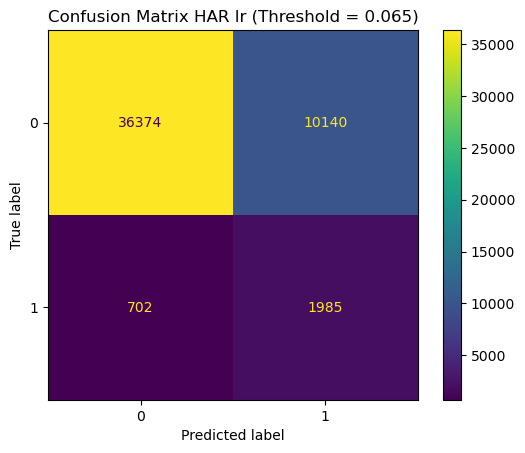

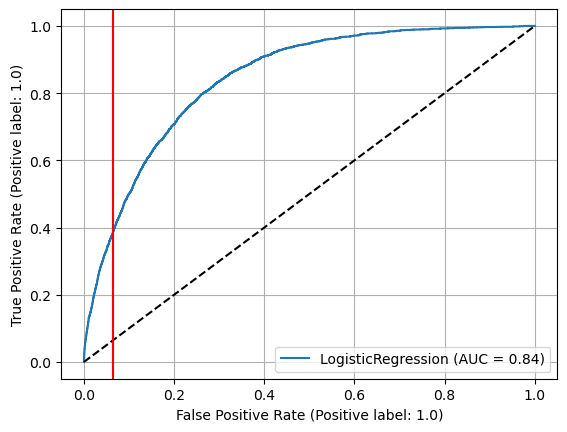

In [34]:
# Predict probabilities for the positive class
y_prob_train_lr_HAR = lr_model_HAR.predict_proba(X_train_har_scaled)[:, 1]
y_prob_test_lr_HAR = lr_model_HAR.predict_proba(X_test_har_scaled)[:, 1]

# Set a new threshold
threshold = 0.065

# Classify based on the new threshold
y_pred_train_HAR_new_threshold = (y_prob_train_lr_HAR >= threshold).astype(int)
y_pred_test_HAR_new_threshold = (y_prob_test_lr_HAR >= threshold).astype(int)

# Classification report - Train
print(f'Classification Report - Train (Threshold = {threshold})')
print(classification_report(y_train_har, y_pred_train_HAR_new_threshold))

# Classification report - Test
print(f'Classification Report - Test (Threshold = {threshold})')
print(classification_report(y_test_har, y_pred_test_HAR_new_threshold))

# Confusion matrix
cm = confusion_matrix(y_test_har, y_pred_test_HAR_new_threshold)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(values_format='')
plt.title(f'Confusion Matrix HAR lr (Threshold = {threshold})')
plt.show()

# ROC curve
plot_roc_curve(lr_model_HAR, X_test_har_scaled, y_test_har)
plt.plot([0,1], [0,1], color='black', linestyle='--')
plt.axvline(x=0.065, color='r', linestyle='-')
plt.grid()
plt.show()

In [443]:
HAR_logreg_coeff = pd.DataFrame(lr_model_HAR.coef_, columns= X_har.columns, index= ["Coeff"]).T
HAR_logreg_coeff.sort_values(by= "Coeff", ascending= False)

Coeff
AgeCategory_enc                0.767443
Gender_enc                     0.434411
ChestScan_enc                  0.359107
HadStroke_enc                  0.196432
SmokerStatus_enc               0.158477
HadDiabetes_enc                0.147555
PneumoVaxEver_enc              0.077167
HadCOPD_enc                    0.065348
HadKidneyDisease_enc           0.057755
HadArthritis_enc               0.041470
DifficultyWalking_enc          0.039407
HIVTesting_enc                 0.029912
BlindOrVisionDifficulty_enc    0.028877
HadDepressiveDisorder_enc      0.025421
CovidPos_enc                   0.023688
DifficultyErrands_enc          0.022579
BMI                            0.018130
DeafOrHardOfHearing_enc        0.016786
MentalHealthDays               0.014580
HadAsthma_enc                  0.014194
ECigaretteUsage_enc            0.007773
HighRiskLastYear_enc           0.004717
PhysicalActivities_enc         0.000000
WeightInKilograms              0.000000
PhysicalHealthDays             0.000000
HadSkinCancer_enc             -0.005753
TetShotLast10_enc             -0.006725
DifficultyDressingBathing_enc -0.023817
SleepHours                    -0.046255
HeightInMeters                -0.049930
FluVaxLast12_enc              -0.068424
AlcoholDrinkers_enc           -0.093645
LastCheckupTime_enc           -0.127060
GeneralHealth_enc             -0.405910

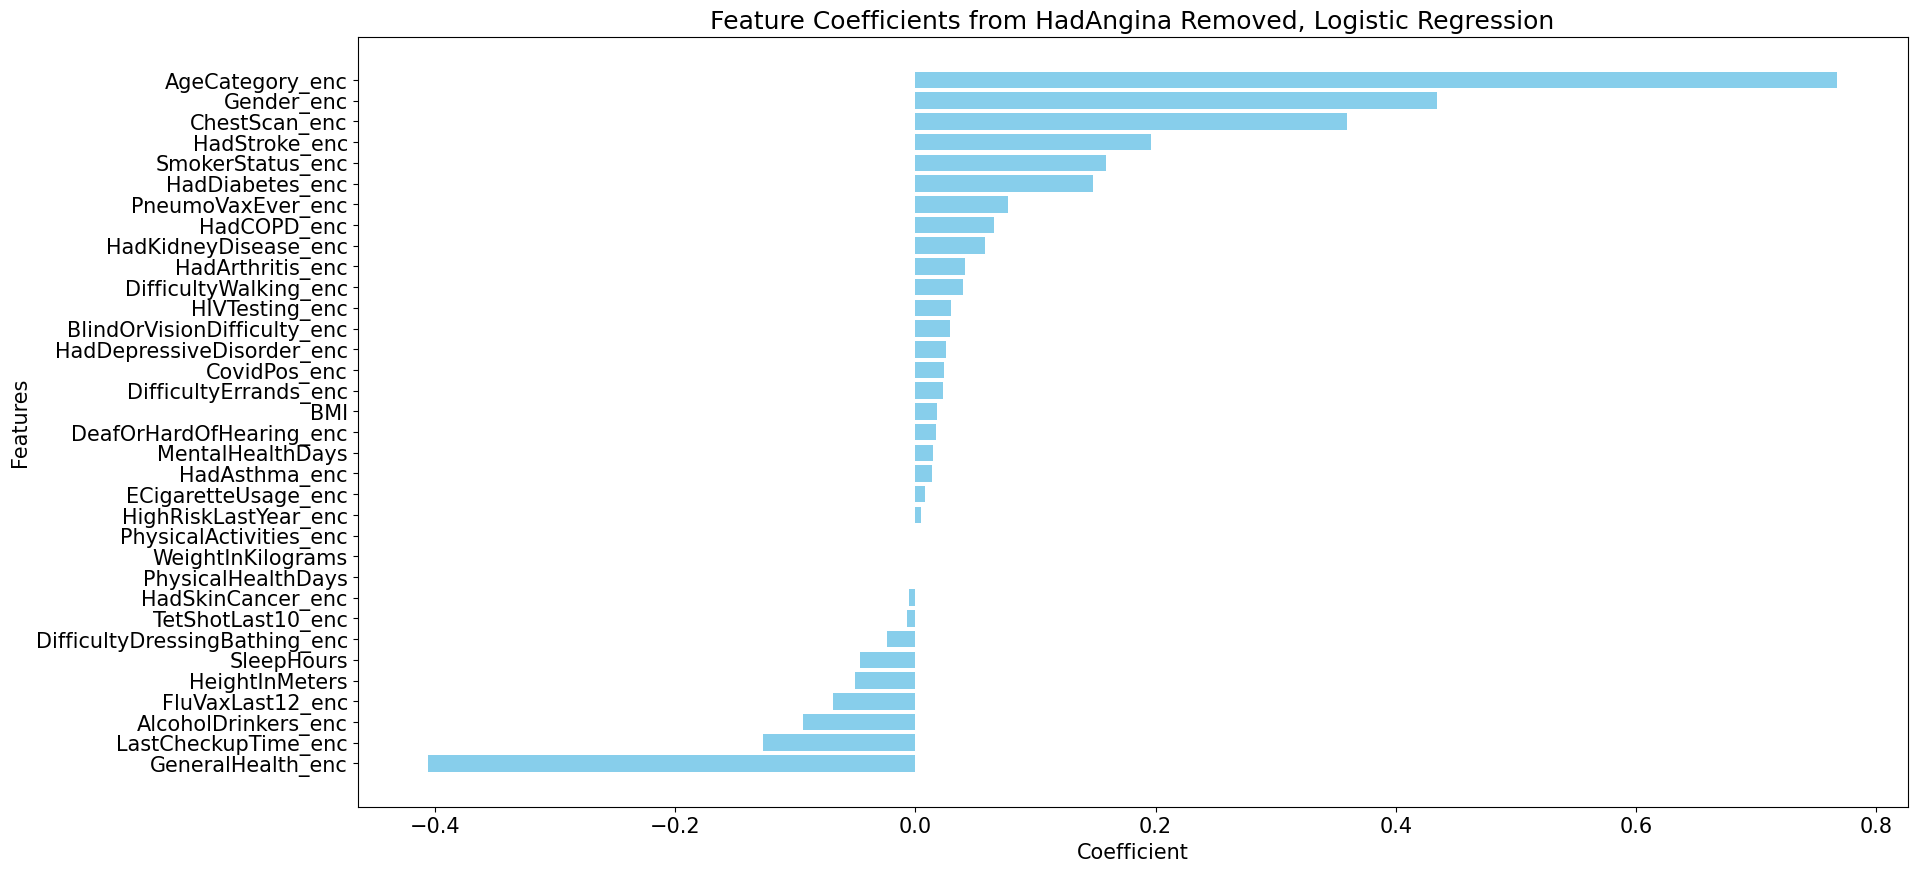

In [444]:
# Sort the DataFrame by coefficient values
HAR_logreg_coeff_sorted = HAR_logreg_coeff.sort_values(by="Coeff", ascending=False)

# Plot coefficients
plt.figure(figsize=(20, 10))
plt.barh(HAR_logreg_coeff_sorted.index, HAR_logreg_coeff_sorted['Coeff'], color='skyblue')
plt.xlabel('Coefficient')
plt.ylabel('Features')
plt.title('Feature Coefficients from HadAngina Removed, Logistic Regression')
plt.gca().invert_yaxis()  # To display the highest coefficients on top
plt.show()

With most prevelent feature HadAngina removed from the dataframe and fit into a logistic regression model I see that the next most important feature to having a heart attack is age. The rest of the features do not move that much compared to the other feature importances on the previous models.

___

### **Saving my Best Model:**

In [452]:
import pickle

In [455]:
with open ('final_lr_model.pkl', 'wb') as file:
    pickle.dump(final_lr_model, file)

___

## Conclusion

In this notebook, we developed and evaluated various machine learning models to identify key indicators of heart attacks using the pre-processed heart_attack_enc_m.csv dataset. Our analysis included a comprehensive assessment of several algorithms, each offering unique strengths in predictive modeling.

**= Model Performance Summary =**

**Logistic Regression:**

- This baseline model provided a clear understanding of the linear relationships between the features and the target variable. It performed badly, but with straightforward interpretability of the coefficients.

**Decision Tree:**

- The decision tree model offered an intuitive representation of decision rules and interactions between features. It was effective in capturing non-linear relationships.

**Random Forests:**

- The random forest model improved predictive performance and robustness against overfitting. It provided better accuracy and feature importance insights compared to a single decision tree.

**K-Nearest Neighbors (KNN):**

- The k-NN algorithm was straightforward and performed reasonably well, especially with balanced classes. However, its performance decreased with imbalanced data and higher-dimensional feature spaces.

**XGBoost:**

- This gradient boosting model delivered superior performance by efficiently handling non-linear relationships and interactions between features. It achieved high accuracy and robustness, making it one of the top-performing models in our analysis.

**SMOTE Logistic Regression:**

- By applying Synthetic Minority Over-sampling Technique (SMOTE) before logistic regression, we addressed class imbalance and improved the model’s ability to predict minority class instances. This approach enhanced recall but decreased precision metrics.

**HadAngina Removed Logistic Regression:**

- We evaluated the impact of removing the most important feature of predicting a heart attack within the dataset may not be needed for this project. This analysis helped in understanding the feature's significance and refining the model for better performance and interpretability.

**Best Models**

- Threshold Moved XGBoost at 73% recall, 25% precision.

- Threshold Moved Logistic Regression at 71% recall, 23% precision.

Through this comprehensive modeling process, we identified that ensemble methods like XGBoost outperformed other models in terms of accuracy and robustness. Threshold movement also helped with recall but decreased precision yet overall a good models. SMOTE Logistic Regression also showed significant improvements in handling class imbalance. These findings underscore the importance of using diverse modeling approaches to capture different aspects of the data.

The insights gained from these models will inform our next steps, where we will refine the best-performing models and potentially deploy them for practical applications in predicting heart attack risk. The ability to accurately identify key indicators of heart attacks can contribute to better prevention strategies like early diagnosis and improved cardiovascular health outcomes.